In [1]:
# Install the latest version of the colorama package to enable colorful terminal text, enhancing readability
!pip install -U colorama

# Install the empyrical package to compute various financial risk and performance metrics, useful for quantitative finance
!pip install empyrical

# Install a specific version (1.4.3) of the bayesian-optimization package, which is used for optimizing hyperparameters in machine learning models
!pip install bayesian-optimization==1.4.3

# Install the pmdarima package, a convenient tool for auto-fitting ARIMA models, which are widely used in time series forecasting
!pip install pmdarima

# Install a specific version (2.14.0) of tensorflow, a powerful library for machine learning and neural networks, to ensure compatibility with certain features or other libraries
!pip install tensorflow==2.16.1

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# The following line of code is used to install the 'ipython-extensions' package using pip, Python's package installer. 
# The 'ipython-extensions' package contains a collection of extensions for IPython, which enhance its functionality and usability. 
# These extensions can include new magic commands, additional configuration options, and improved integration with other tools and libraries. 
# Installing this package can significantly enhance the interactive Python programming experience, especially within Jupyter notebooks where IPython is commonly used.

!pip install ipython-extensions

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Import the bayes_opt library
# This library is used for Bayesian Optimization which is a method of finding the maximum or minimum of an objective function
# that is expensive to evaluate. It's often used for hyperparameter tuning in machine learning models.
import bayes_opt

In [4]:
# Suppress all warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")

# Importing essential libraries for data manipulation and analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Importing TensorFlow, a powerful library for machine learning and neural networks
import tensorflow

# Importing joblib for saving and loading machine learning models
import joblib

# Importing SHAP for model interpretability
import shap

# Importing os for interacting with the operating system
import os

# Importing matplotlib for data visualization
import matplotlib.colors as mcolors  # For handling colors
import matplotlib as mpl  # For customizing plots

# Importing pyplot from matplotlib for creating static, animated, and interactive visualizations
from tensorflow.keras.models import load_model as keras_load_model
from matplotlib import pyplot as plt
from IPython.display import display

# Importing statistical functions from scipy
from scipy.stats import norm  # For working with normal distributions
from scipy.stats import chi2  # For working with chi-squared distributions

2024-05-26 10:46:07.716978: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-26 10:46:07.720202: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-26 10:46:07.759752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 10:46:08.775649: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
# Import the MarketDataEngineer class from the MarketDataEngineer module located in the champion.source.data package.
# This class is likely responsible for engineering or processing market data for further analysis or modeling.
# It could be used to clean, normalize, or aggregate market data before it's used in financial models or analyses.
from champion.source.data.MarketDataEngineer import MarketDataEngineer

# Import all functions and classes from the _util module located in the champion.source.util package.
# This could include various utility functions or classes that are used across the project for different purposes such as data manipulation, logging, etc.
# Utility modules often contain helper functions that simplify common tasks, making the main code cleaner and more readable.
from champion.source.util._util import *

# Import all functions and classes from the _trainModels module located in the champion.pipeline package.
# This module is likely responsible for training machine learning models. It could contain functions or classes to train, evaluate, and save models.
# Training models involves feeding data into algorithms to allow them to learn and make predictions. This module likely encapsulates that process.
from champion.pipeline._trainModels import *

# Import all functions and classes from the _evaluateModels module located in the champion.pipeline package.
# This module is probably dedicated to evaluating the performance of trained models. It might include functions for calculating accuracy, precision, recall, etc.
# Evaluating models is crucial to understand their effectiveness and to decide which model performs best for a given dataset or problem.
from champion.pipeline._evaluateModels import *

# Import all functions and classes from the _causalInference module located in the champion.pipeline package.
# This module is likely focused on causal inference methods, which are used to determine causality rather than just correlations between variables.
# Causal inference is important in many fields, including economics, epidemiology, and social sciences, to understand the impact of interventions.
from champion.pipeline._causalInference import *

# Import all functions and classes from the _stressBacktest module located in the champion.pipeline package.
# This module is probably used for stress testing and backtesting models. Stress testing involves testing models under extreme conditions,
# while backtesting is the process of testing a predictive model on historical data.
# These techniques are essential for assessing the robustness and reliability of financial models before they are deployed.
from champion.pipeline._stressBacktest import *

In [6]:
def display_evaluation_report(report_filename: str, highlight_max: bool = True):
    # Construct the full path to the report file
    report_path = os.path.join(p.model_evaluation_report_compiled_path, report_filename)
    
    # Read the CSV file into a DataFrame
    report_df = pd.read_csv(report_path)
    
    # Rename the columns to have "metrics" as the first column name
    report_df.columns = ["metrics"] + report_df.columns.tolist()[1:]
    
    # Get the list of model columns (excluding the first "metrics" column)
    model_columns = report_df.columns[1:].tolist()
    
    # Round the values in the model columns to 4 decimal places
    report_df[model_columns] = report_df[model_columns].apply(lambda x: round(x, 6))
    
    # Transpose the DataFrame to switch rows and columns
    transposed_report_df = report_df.T
    
    # Rename the columns of the transposed DataFrame using the first row
    transposed_report_df = transposed_report_df.rename(columns=transposed_report_df.iloc[0])
    
    # Drop the first row as it is now used as the header
    transposed_report_df = transposed_report_df.drop(transposed_report_df.index[0])
    
    # Highlight the maximum values in each column if highlight_max is True
    if highlight_max:
        transposed_report_df = transposed_report_df.style.highlight_max(color='lightgreen', axis=0)
    
    # Display the transposed DataFrame
    display(transposed_report_df)

In [7]:
def load_model(model_file_path):
    """Load a model from a file path based on its extension."""
    # Check if the file is a pickle file
    if model_file_path.endswith('.pkl'):
        return joblib.load(model_file_path)
    # Check if the file is an H5 file (commonly used for Keras models)
    elif model_file_path.endswith('.h5'):
        return keras_load_model(model_file_path)
    # Raise an error if the file format is unsupported
    else:
        raise ValueError(f"Unsupported file format: {model_file_path}")

In [8]:
# List all files in the directory specified by p.shap_path
shap_filenames = os.listdir(p.shap_path)

# Initialize an empty list to store SHAP values
shap_values_list = []

# Iterate over each filename in the list of SHAP filenames
for filename in shap_filenames:
    # Check if the filename ends with '.pkl' (indicating a pickle file)
    if filename.endswith('.pkl'):
        # Load the SHAP values from the pickle file and append to the list
        shap_values_list.append(joblib.load(os.path.join(p.shap_path, filename)))

# List all model filenames in the directory that have either a .pkl or .h5 extension
model_filenames = [filename for filename in os.listdir(p.model_path) if filename.endswith('.pkl') or filename.endswith('.h5')]

# Load all models by iterating over the list of model filenames and applying the load_model function
loaded_models = [load_model(os.path.join(p.model_path, filename)) for filename in model_filenames]

# Now `loaded_models` contains all the loaded models

In [9]:
display_evaluation_report("train_compiled_report.csv")

In [10]:
display_evaluation_report("test_compiled_report.csv")

In [11]:
display_evaluation_report("stress_compiled_report.csv")

In [12]:
display_evaluation_report("backtest_recent_compiled.csv")

In [13]:
display_evaluation_report("backtest_stress_compiled.csv")

In [14]:
def calculate_logit_pvalues(logistic_model, feature_matrix):
    """ 
    Calculate p-values for scikit-learn LogisticRegression coefficients.
    
    Parameters:
        logistic_model: Fitted sklearn.linear_model.LogisticRegression with intercept and large C
        feature_matrix: Matrix on which the model was fit
    
    This function uses asymptotics for maximum likelihood estimates.
    """
    # Predict probabilities for each sample
    predicted_probabilities   = logistic_model.predict_proba(feature_matrix)
    
    # Number of samples in the feature matrix
    num_samples  = len(predicted_probabilities)
    
    # Number of features plus one for the intercept
    num_features = len(logistic_model.coef_[0]) + 1
    
    # Combine intercept and coefficients into a single array
    coefficients = np.concatenate([logistic_model.intercept_, logistic_model.coef_[0]])
    
    # Add a column of ones to the feature matrix to account for the intercept
    augmented_feature_matrix  = np.matrix(np.insert(np.array(feature_matrix), 0, 1, axis=1))
    
    # Initialize the Fisher Information Matrix with zeros
    fisher_information_matrix = np.zeros((num_features, num_features))
    
    # Calculate the Fisher Information Matrix
    for i in range(num_samples):
        probability_product        = predicted_probabilities[i, 1] * predicted_probabilities[i, 0]
        fisher_information_matrix += np.dot(augmented_feature_matrix[i, :].T, augmented_feature_matrix[i, :]) * probability_product
    
    # Calculate the covariance matrix by inverting the Fisher Information Matrix
    covariance_matrix = np.linalg.inv(np.matrix(fisher_information_matrix))
    
    # Calculate standard errors from the diagonal of the covariance matrix
    standard_errors   = np.sqrt(np.diag(covariance_matrix))
    
    # Calculate z-scores for each coefficient
    z_scores          = coefficients / standard_errors
    
    # Calculate p-values from the z-scores
    p_values          = (1 - norm.cdf(abs(z_scores))) * 2
    
    return p_values

In [15]:
# Load the pre-trained logistic regression model from a file
logistic_model  = load_model(os.path.join(p.model_path, "Logistic.pkl"))

# Define the feature columns to be used for training
feature_columns = ["RSI", "lag_1", "lag_2", "lag_3", "lag_4", "lag_5", "lag_6", "lag_7", "lag_8", "lag_9", "lag_10", "lag_11", "lag_12"]

# Define the target column
target_column   = ["target"]

# Read the training dataset and extract the feature columns
train_features  = pd.read_csv(p.train_set_path)[feature_columns]

# Read the training dataset and extract the target column
train_target    = pd.read_csv(p.train_set_path)[target_column]

# Calculate and display the p-values for the logistic regression model's coefficients
calculate_logit_pvalues(logistic_model, train_features)[0]

0.6013509270248267

In [16]:
def plot_feature_importance(model_index: int):
    # Extract feature importance from the specified model
    feature_importance = zip(feature_columns, loaded_models[model_index].best_estimator_.feature_importances_)
    
    # Sort the features by their importance values in descending order
    sorted_importance  = sorted(feature_importance, key=lambda x: x[1], reverse=True)
    
    # Separate the sorted features and their importance values into two lists
    features, importance_values = [item[0] for item in sorted_importance], [item[1] for item in sorted_importance]

    # Create a horizontal bar plot to visualize feature importance
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.barh(features, importance_values, color='dodgerblue')
    
    # Invert the y-axis to have the most important feature at the top
    ax.invert_yaxis()
    
    # Remove the top and right spines for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set the labels and title of the plot
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title(f"{model_filenames[model_index]} Feature Importance")

    # Save the figure
    plt.savefig(f"graphs/{model_filenames[model_index]} Feature Importance.png")
    
    # Display the plot
    plt.show()

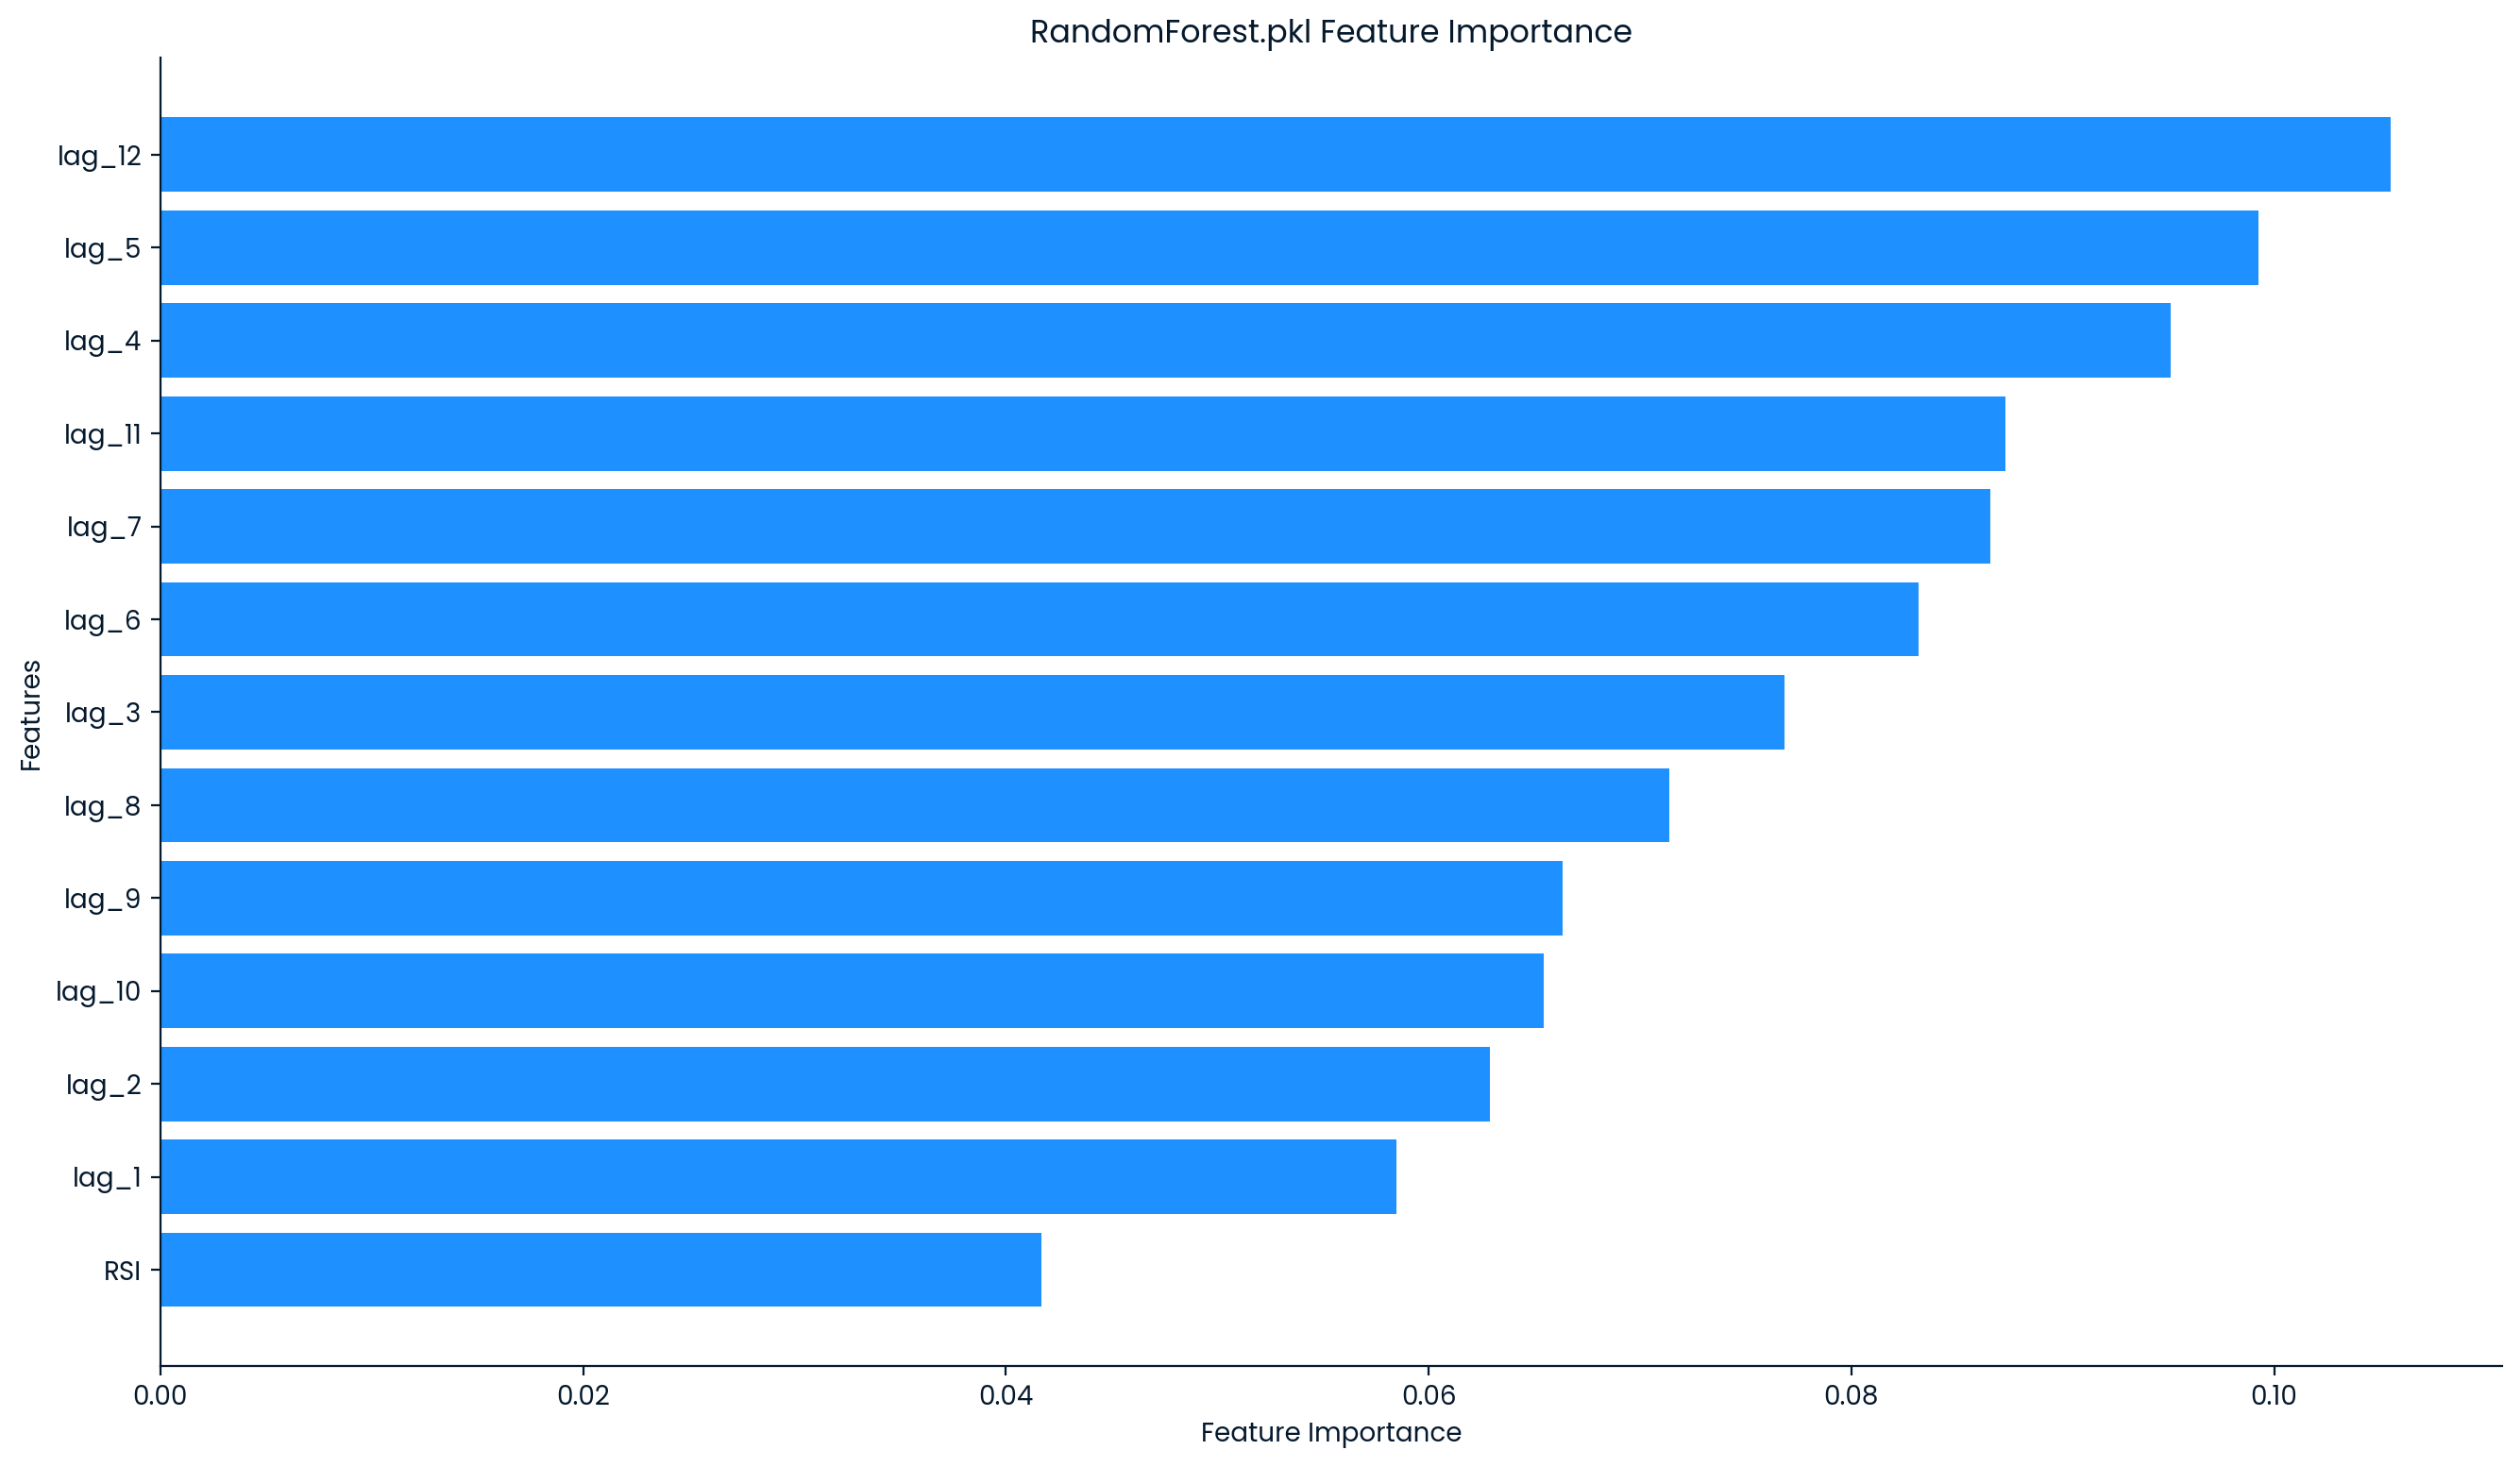

In [17]:
# RANDOM FOREST FEATURE IMPORTANCE

plot_feature_importance(2)

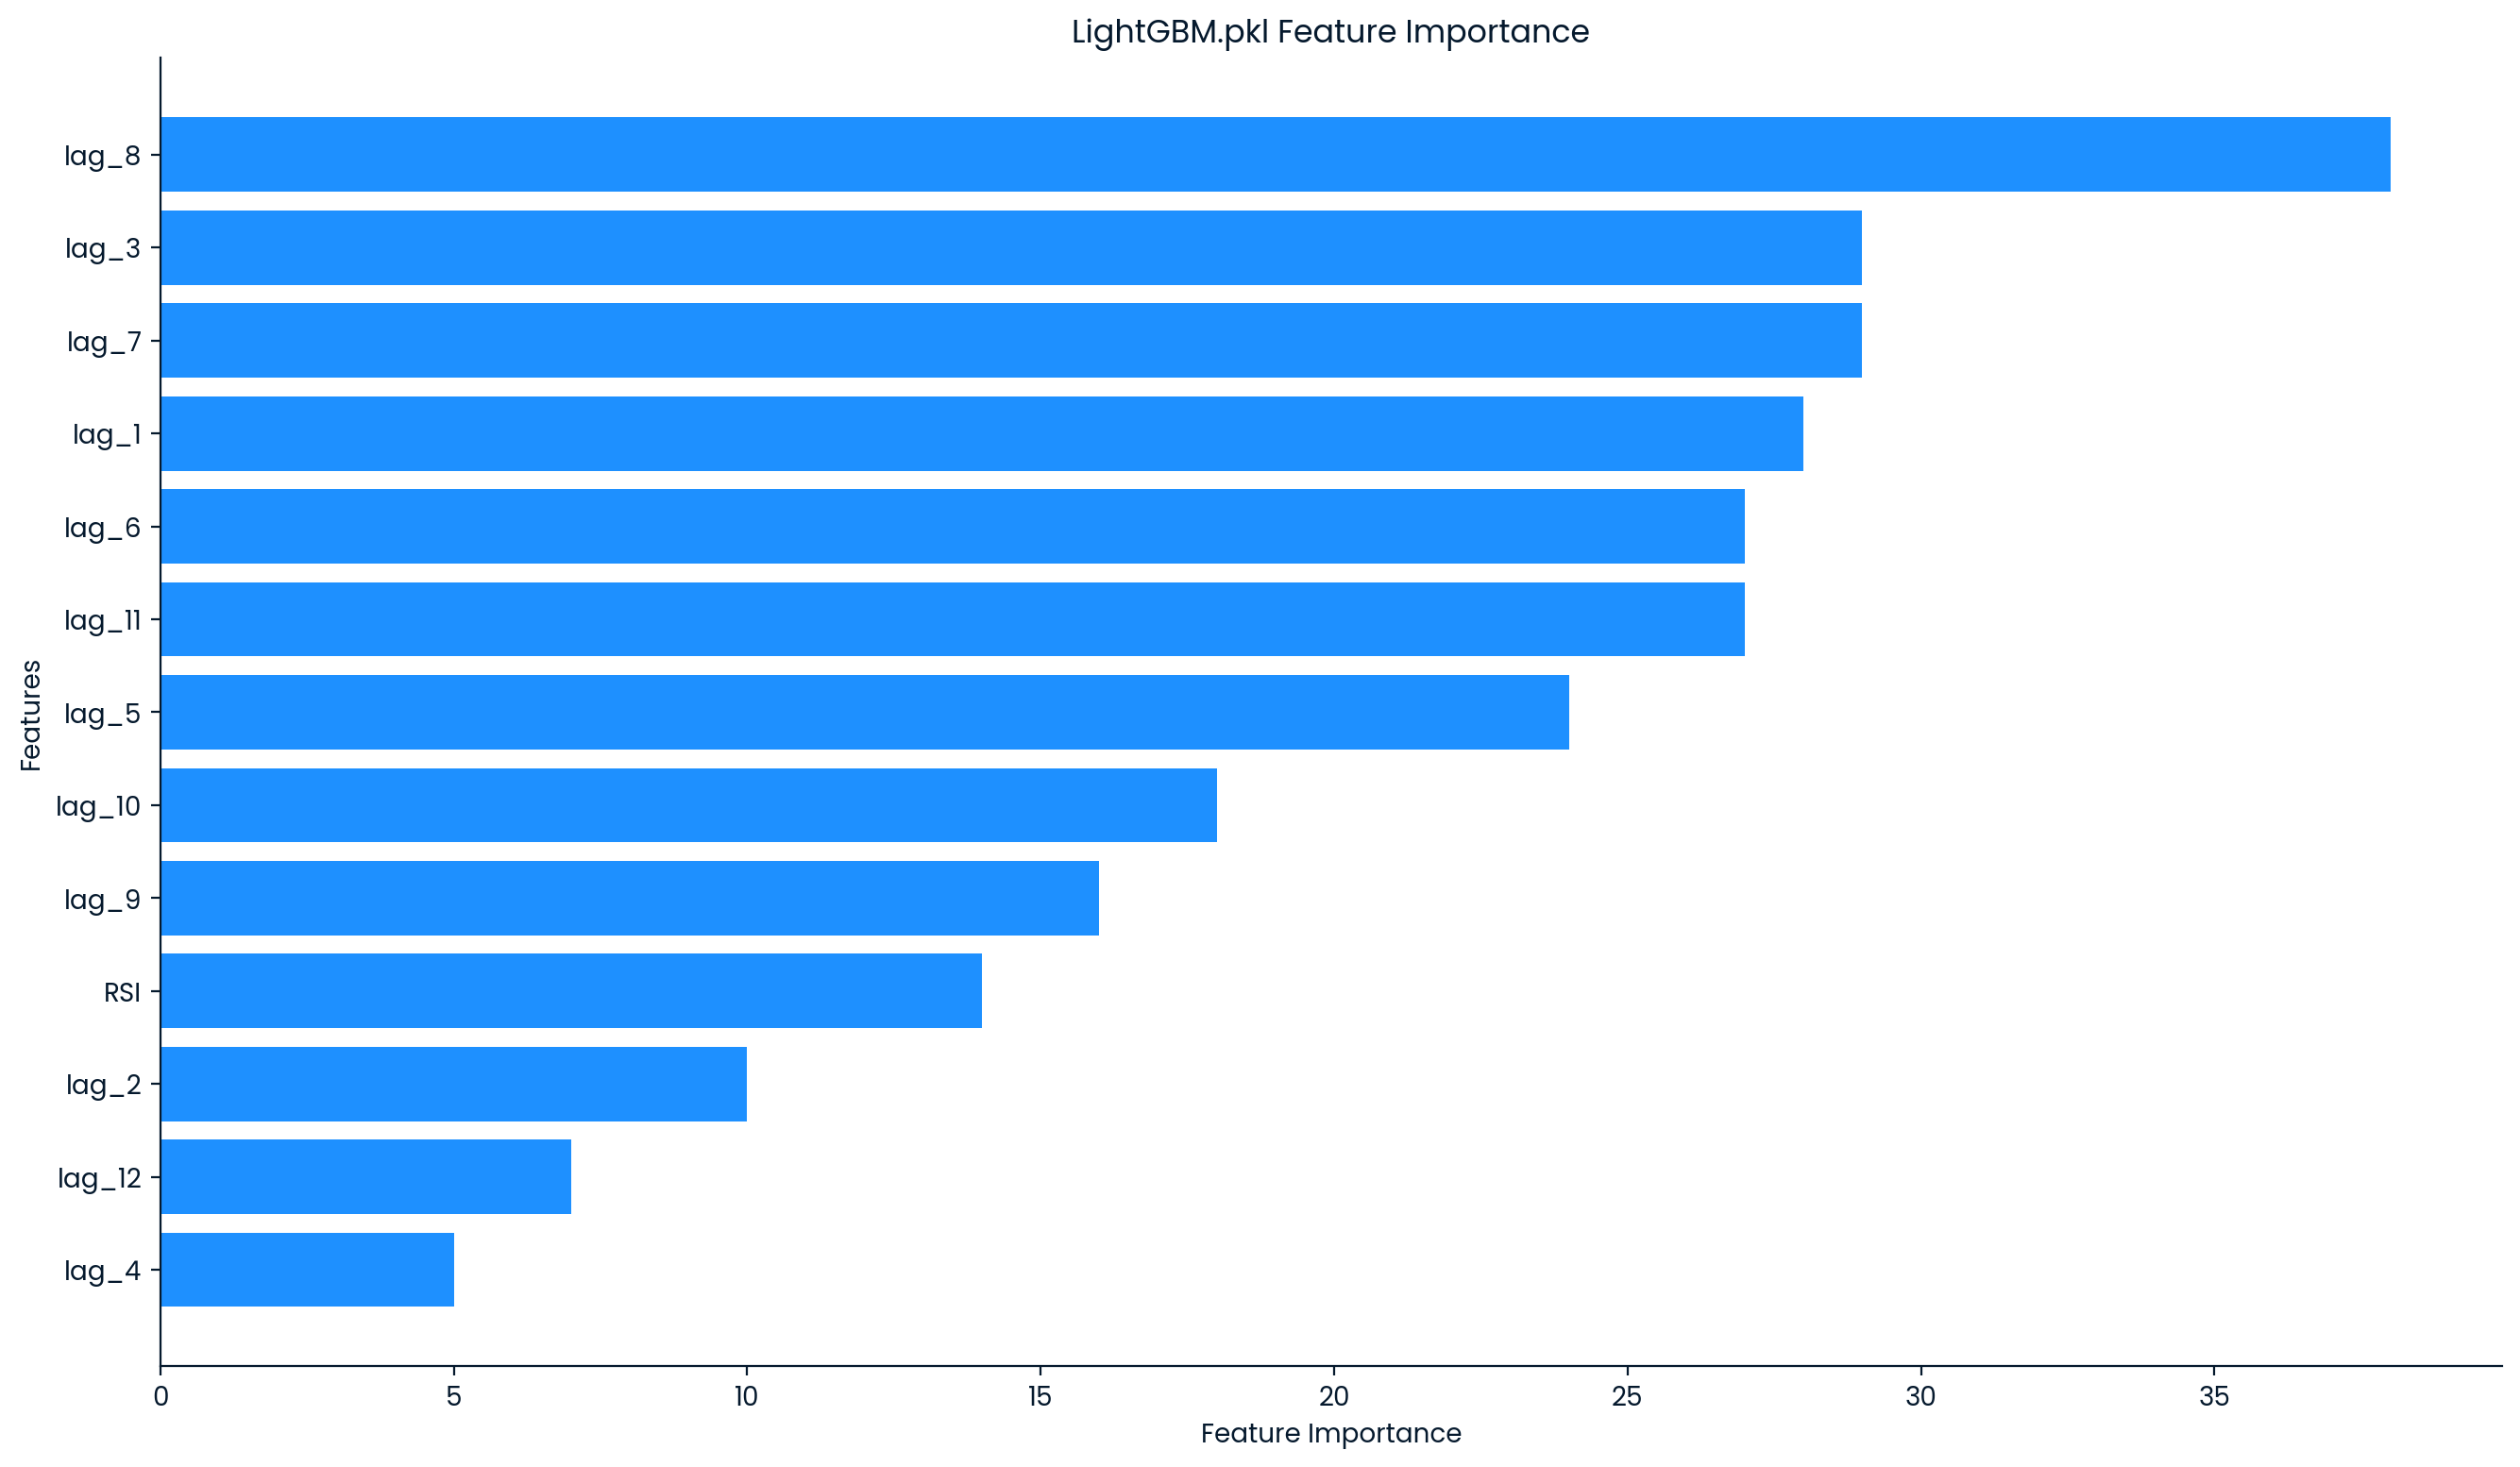

In [18]:
# LIGHT GBM FEATURE IMPORTANCE

plot_feature_importance(3)

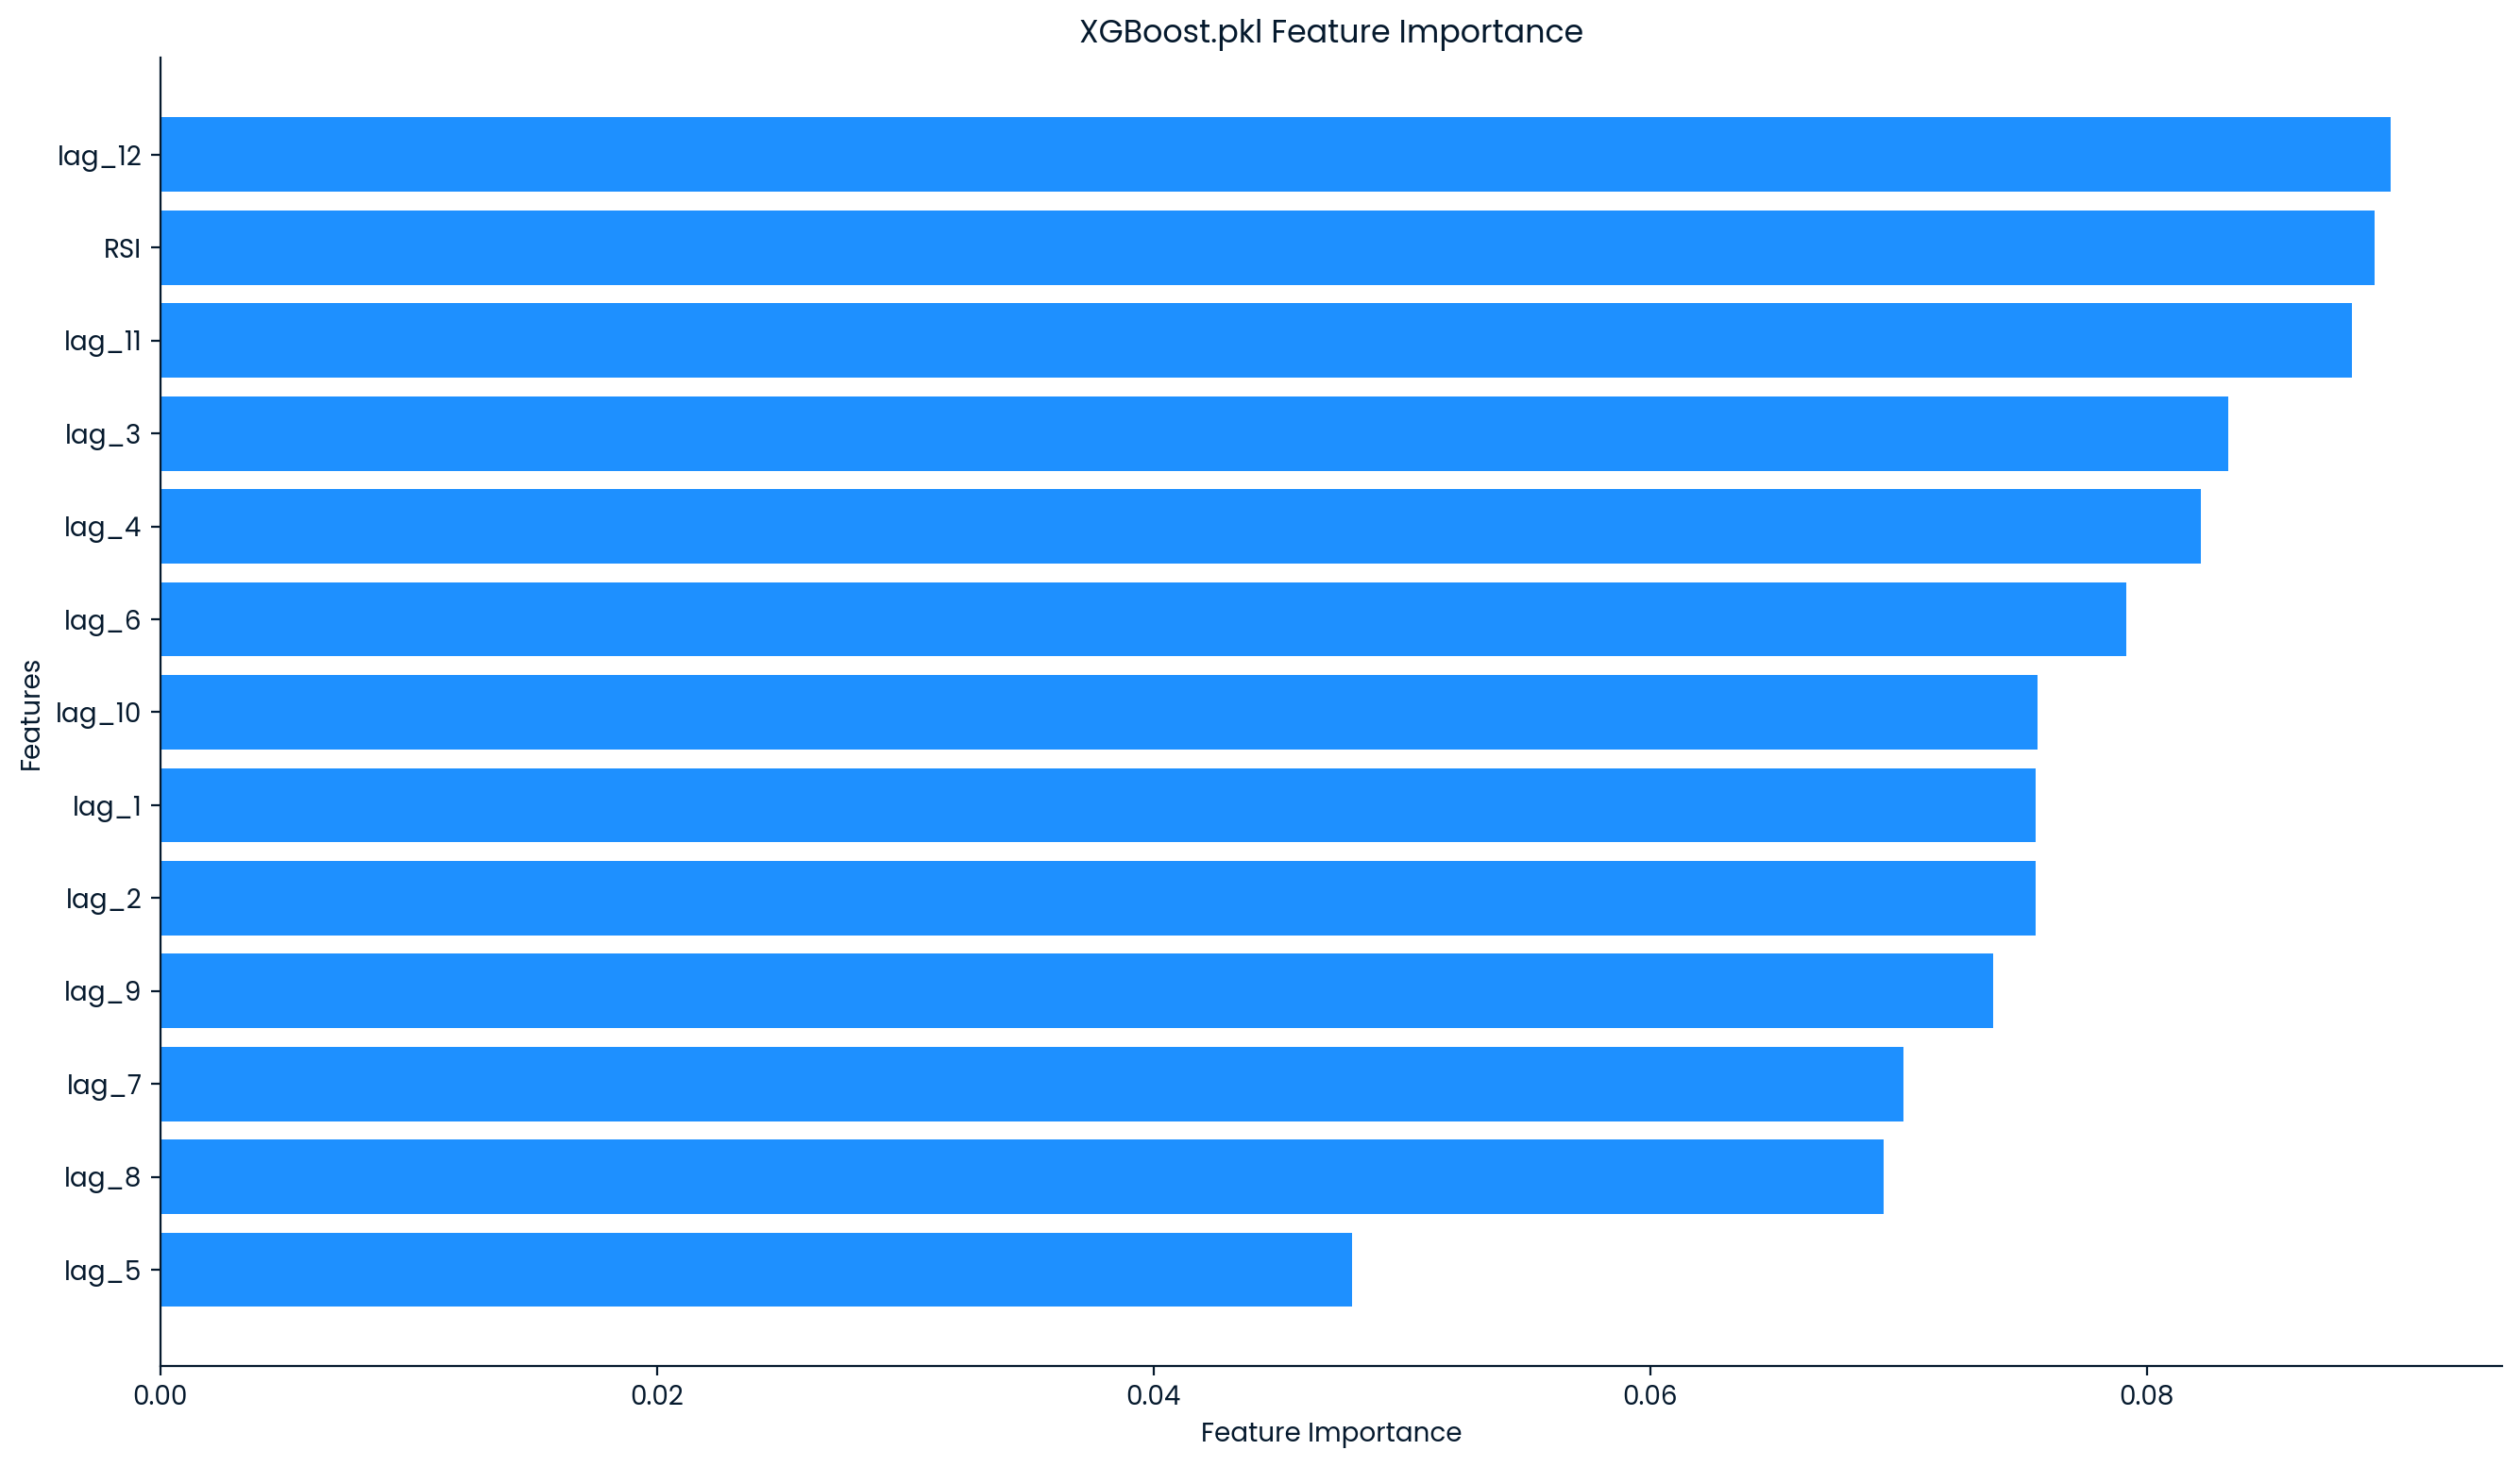

In [19]:
# XGBOOST FEATURE IMPORTANCE

plot_feature_importance(6)

In [20]:
def plot_nn_feature_importance(model_index: int):
    # Generate a SHAP summary plot for the specified model
    # SHAP (SHapley Additive exPlanations) is a method to explain individual predictions
    # Here, we generate a bar plot to show the feature importance based on SHAP values
    shap.summary_plot(shap_values_list[model_index], plot_type="bar", show=False)
    
    # Set the title of the plot
    # The title includes the filename of the SHAP values for the specified model
    plt.title(f"{shap_filenames[model_index]} Feature Importance")
    
    # Save the figure
    plt.savefig(f"graphs/{shap_filenames[model_index]} Feature Importance.png")
    
    # Display the plot
    plt.show()

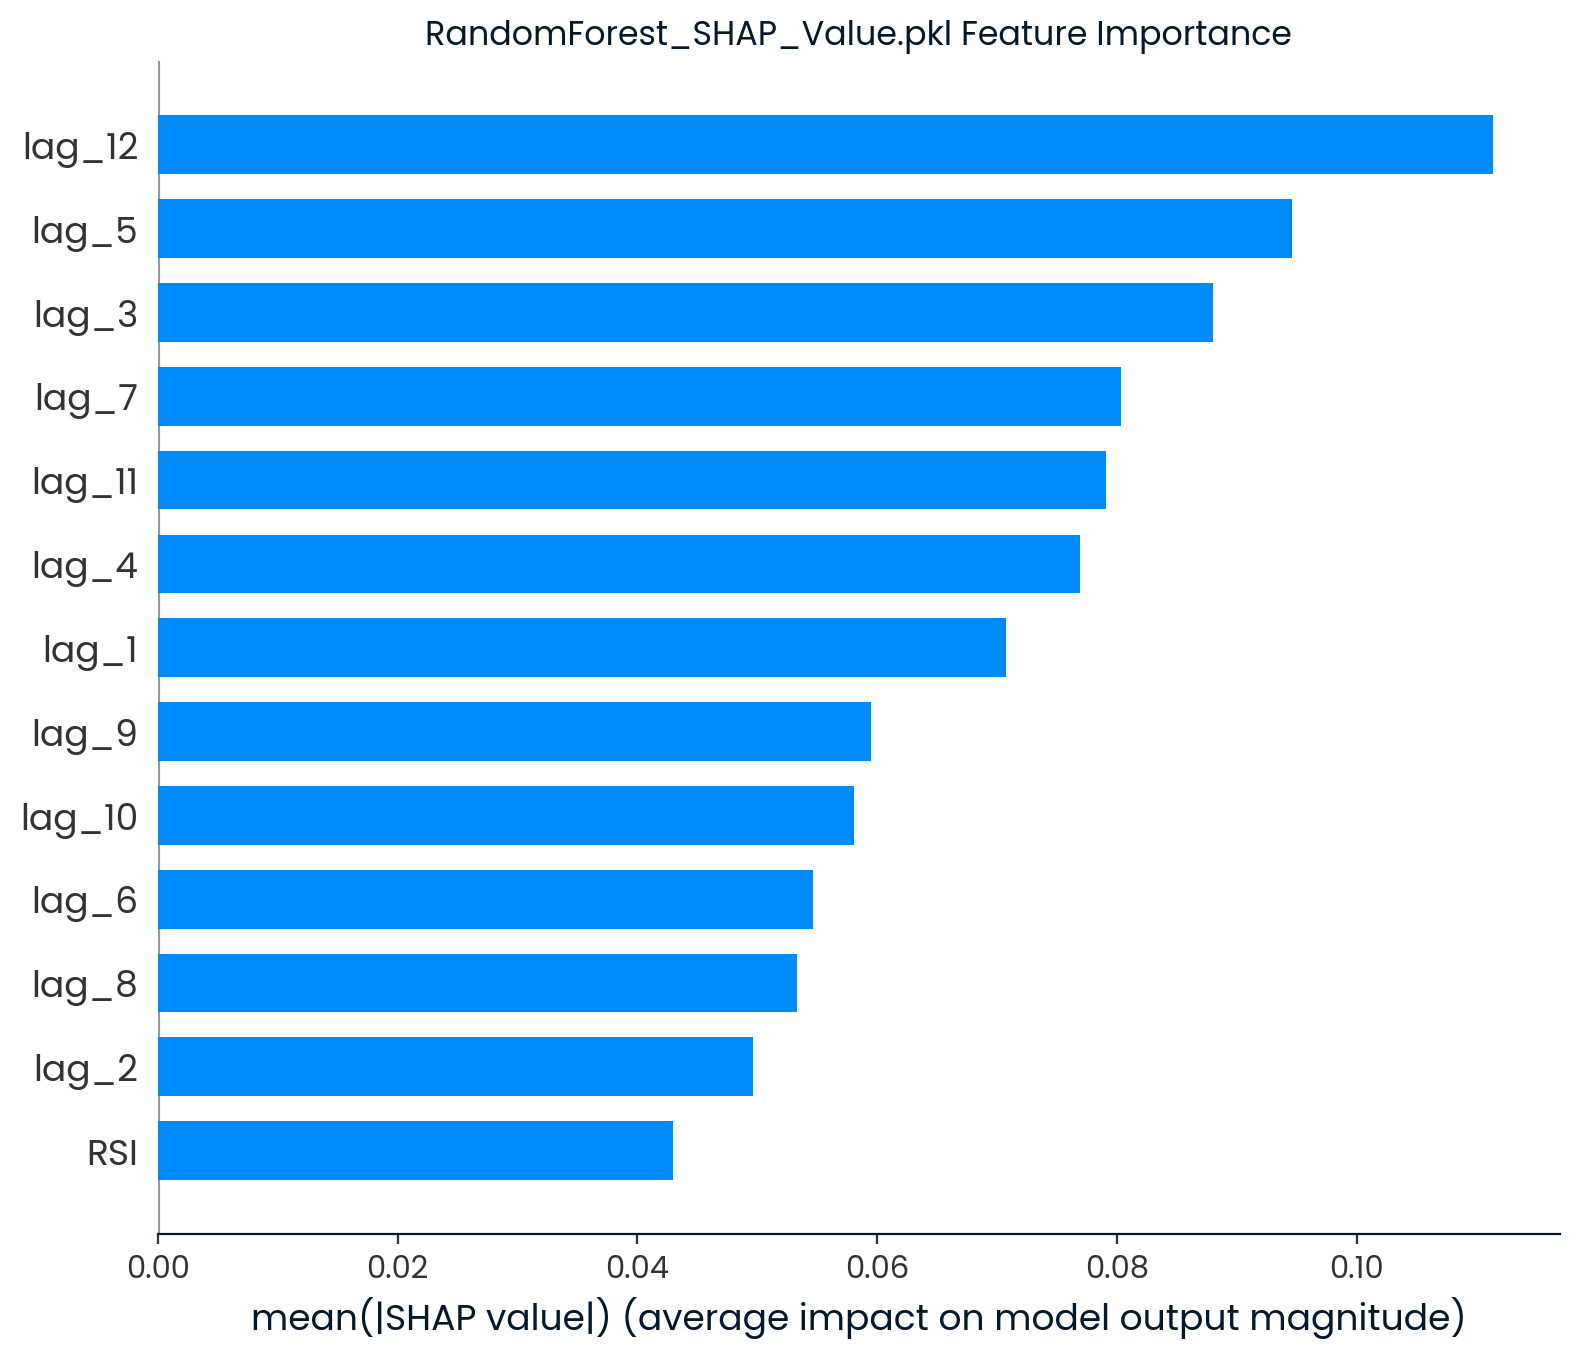

In [21]:
# RANDOM FOREST FEATURE IMPORTANCE - SHAP

plot_nn_feature_importance(0)

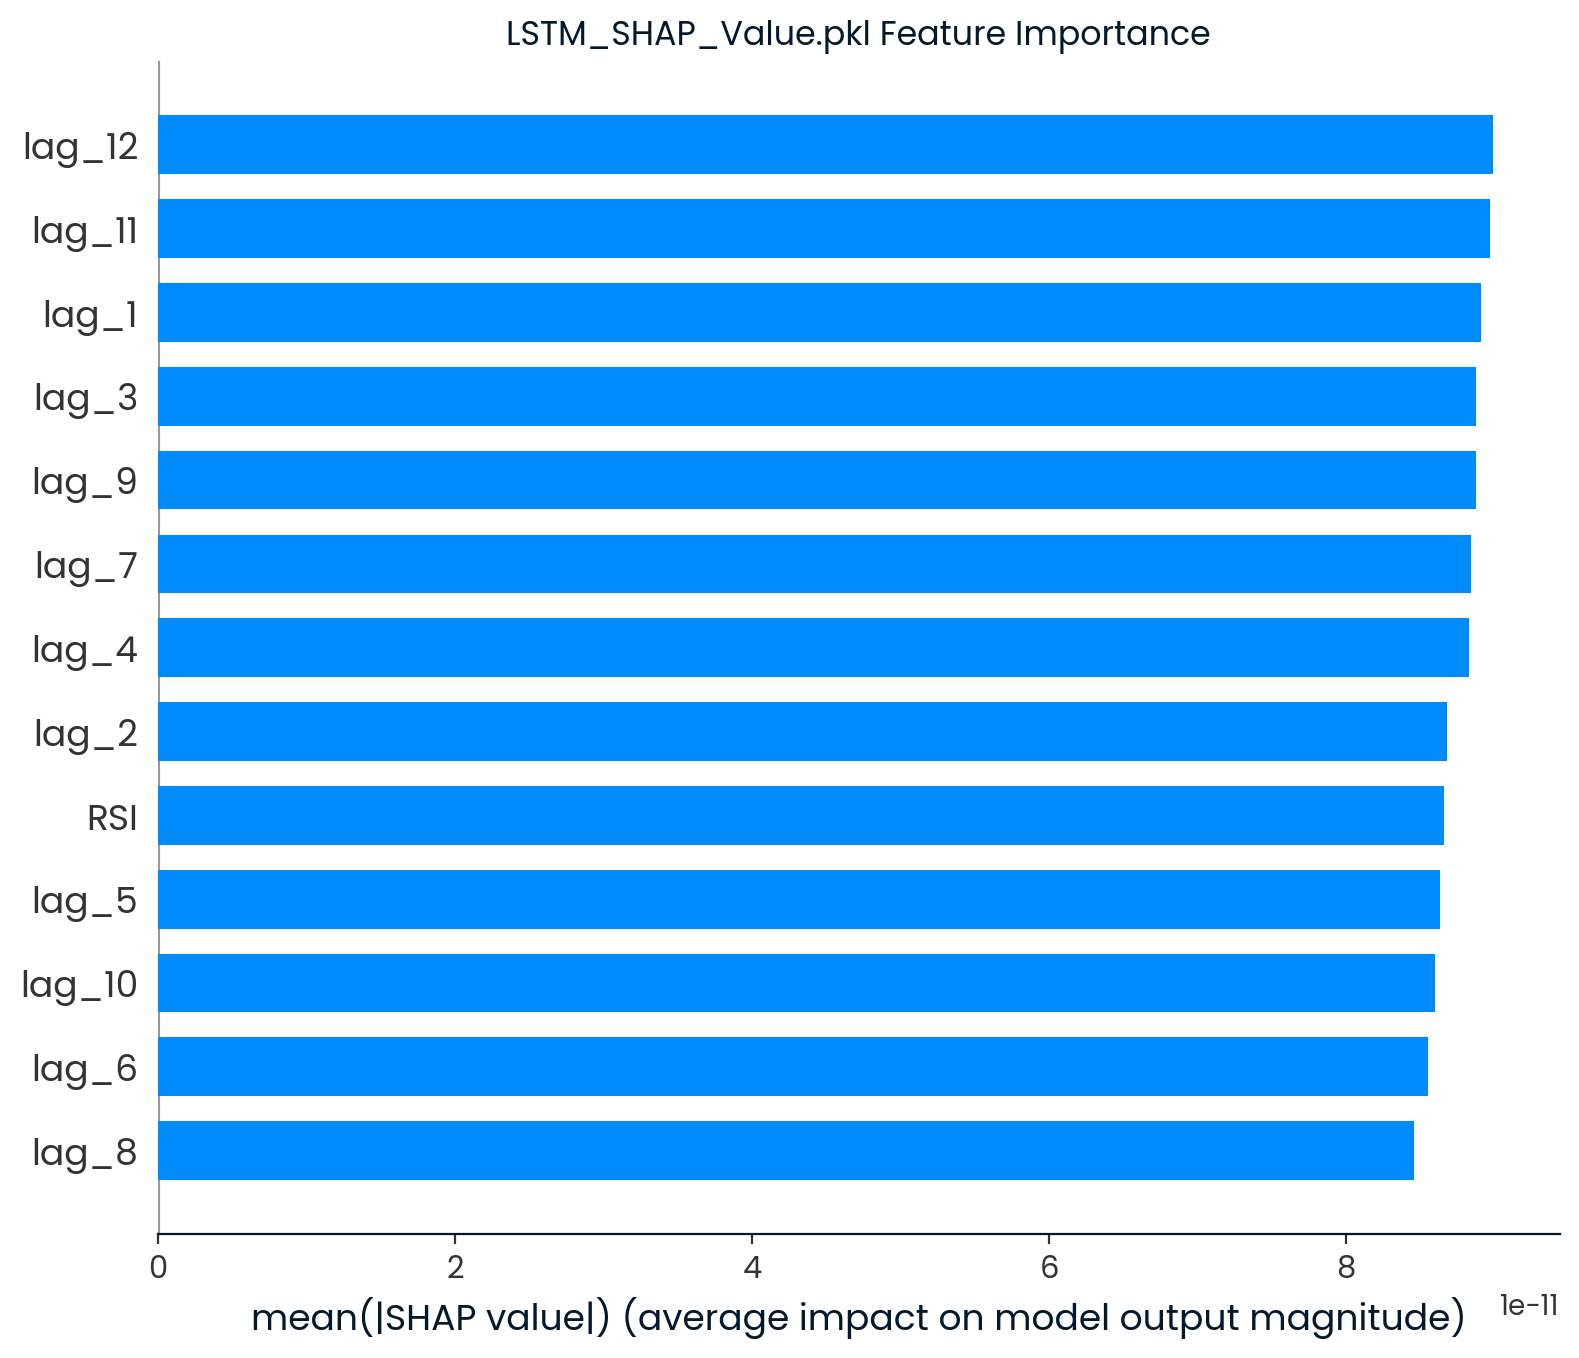

In [22]:
# LSTM FEATURE IMPORTANCE - SHAP

plot_nn_feature_importance(1)

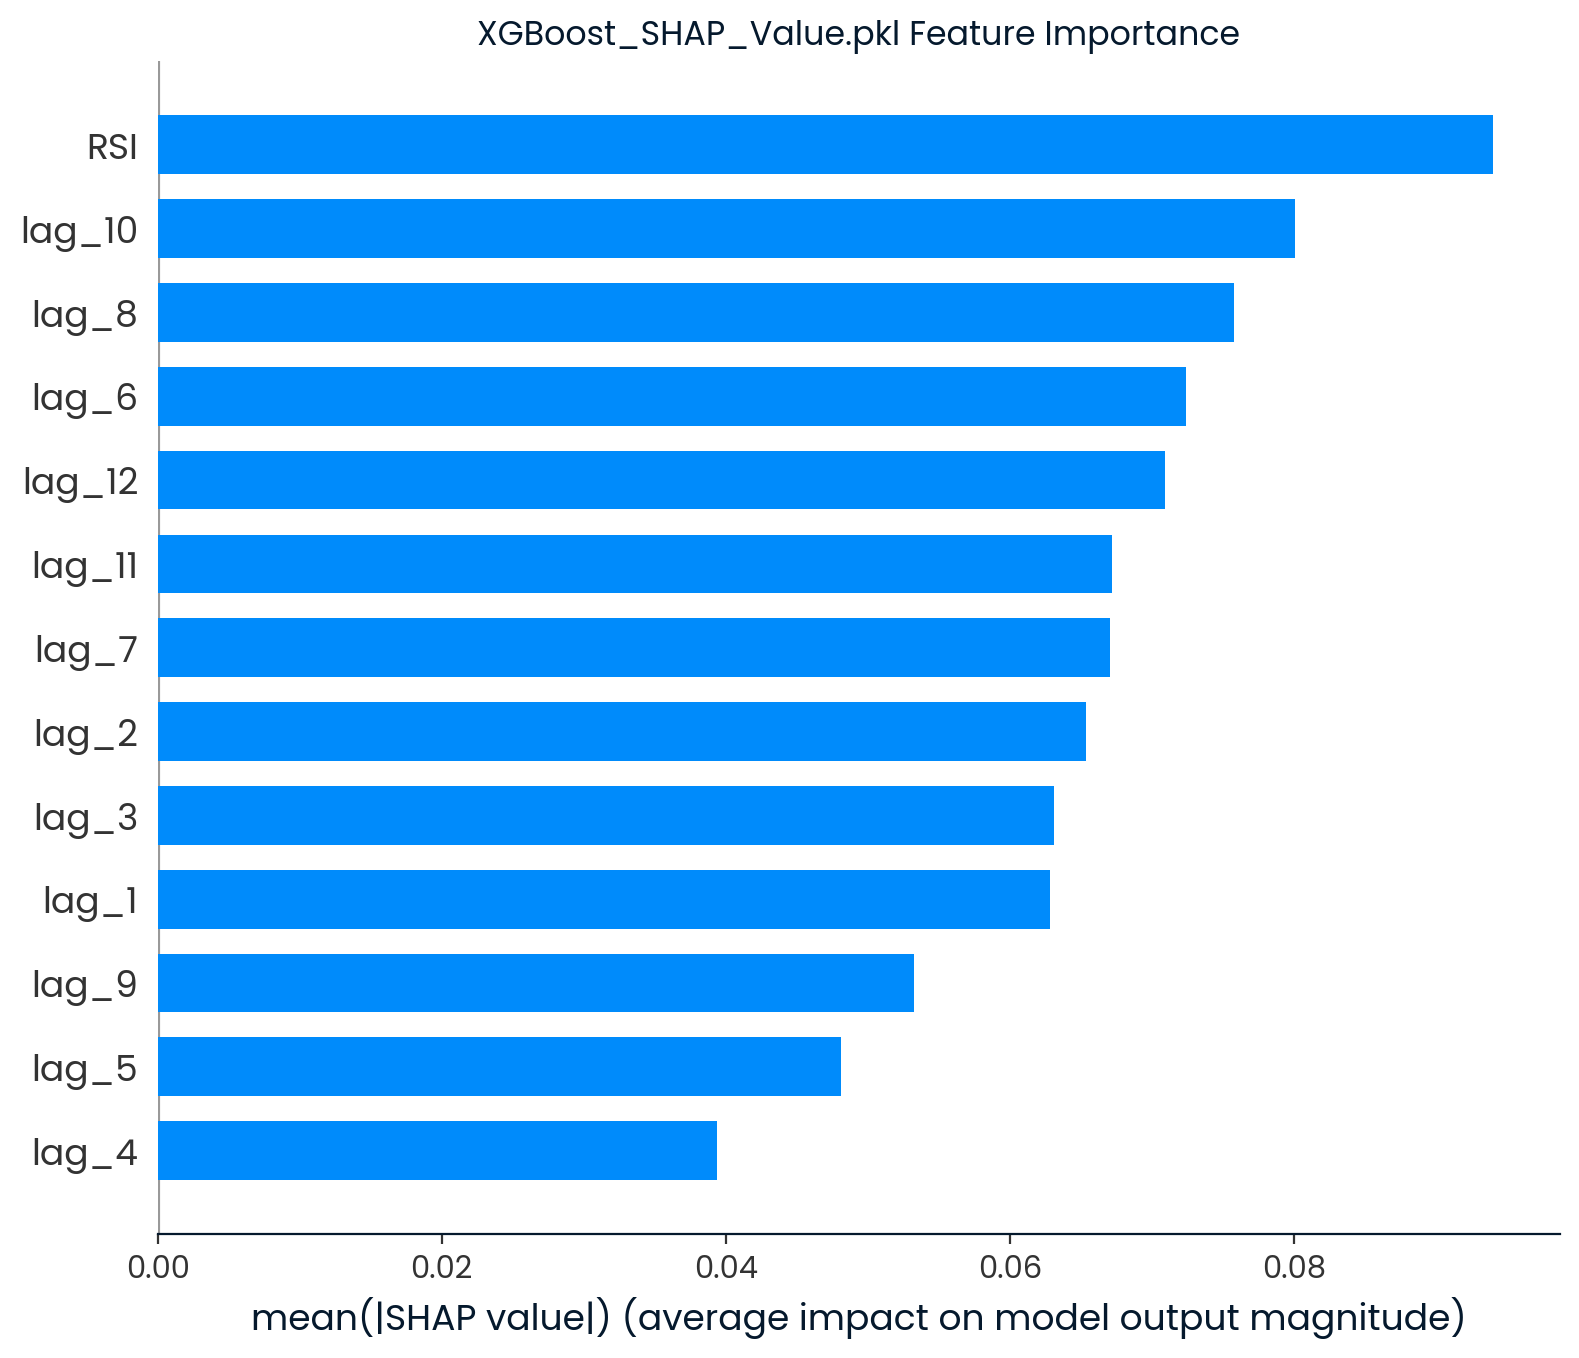

In [23]:
# XGBOOST FEATURE IMPORTANCE - SHAP

plot_nn_feature_importance(2)

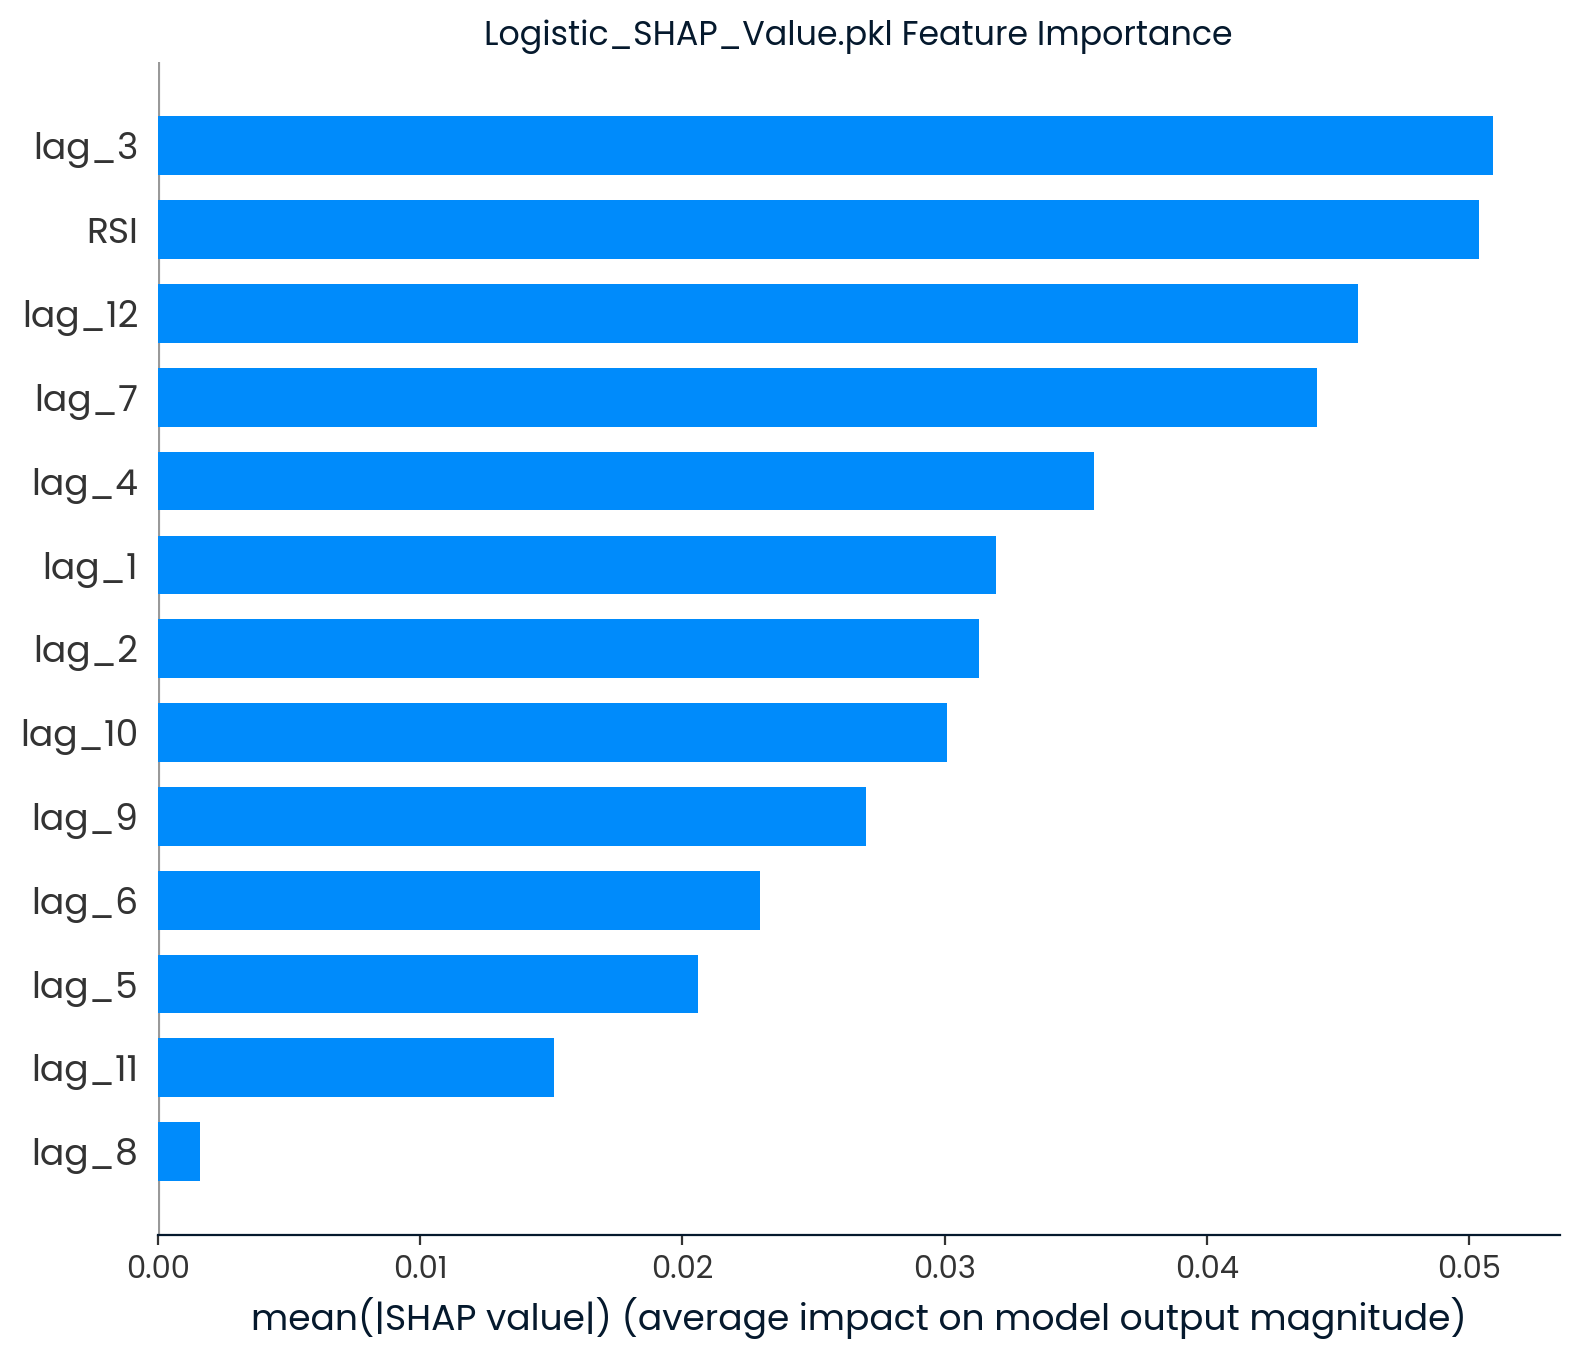

In [24]:
# LOGISTIC IMPORTANCE - SHAP

plot_nn_feature_importance(3)

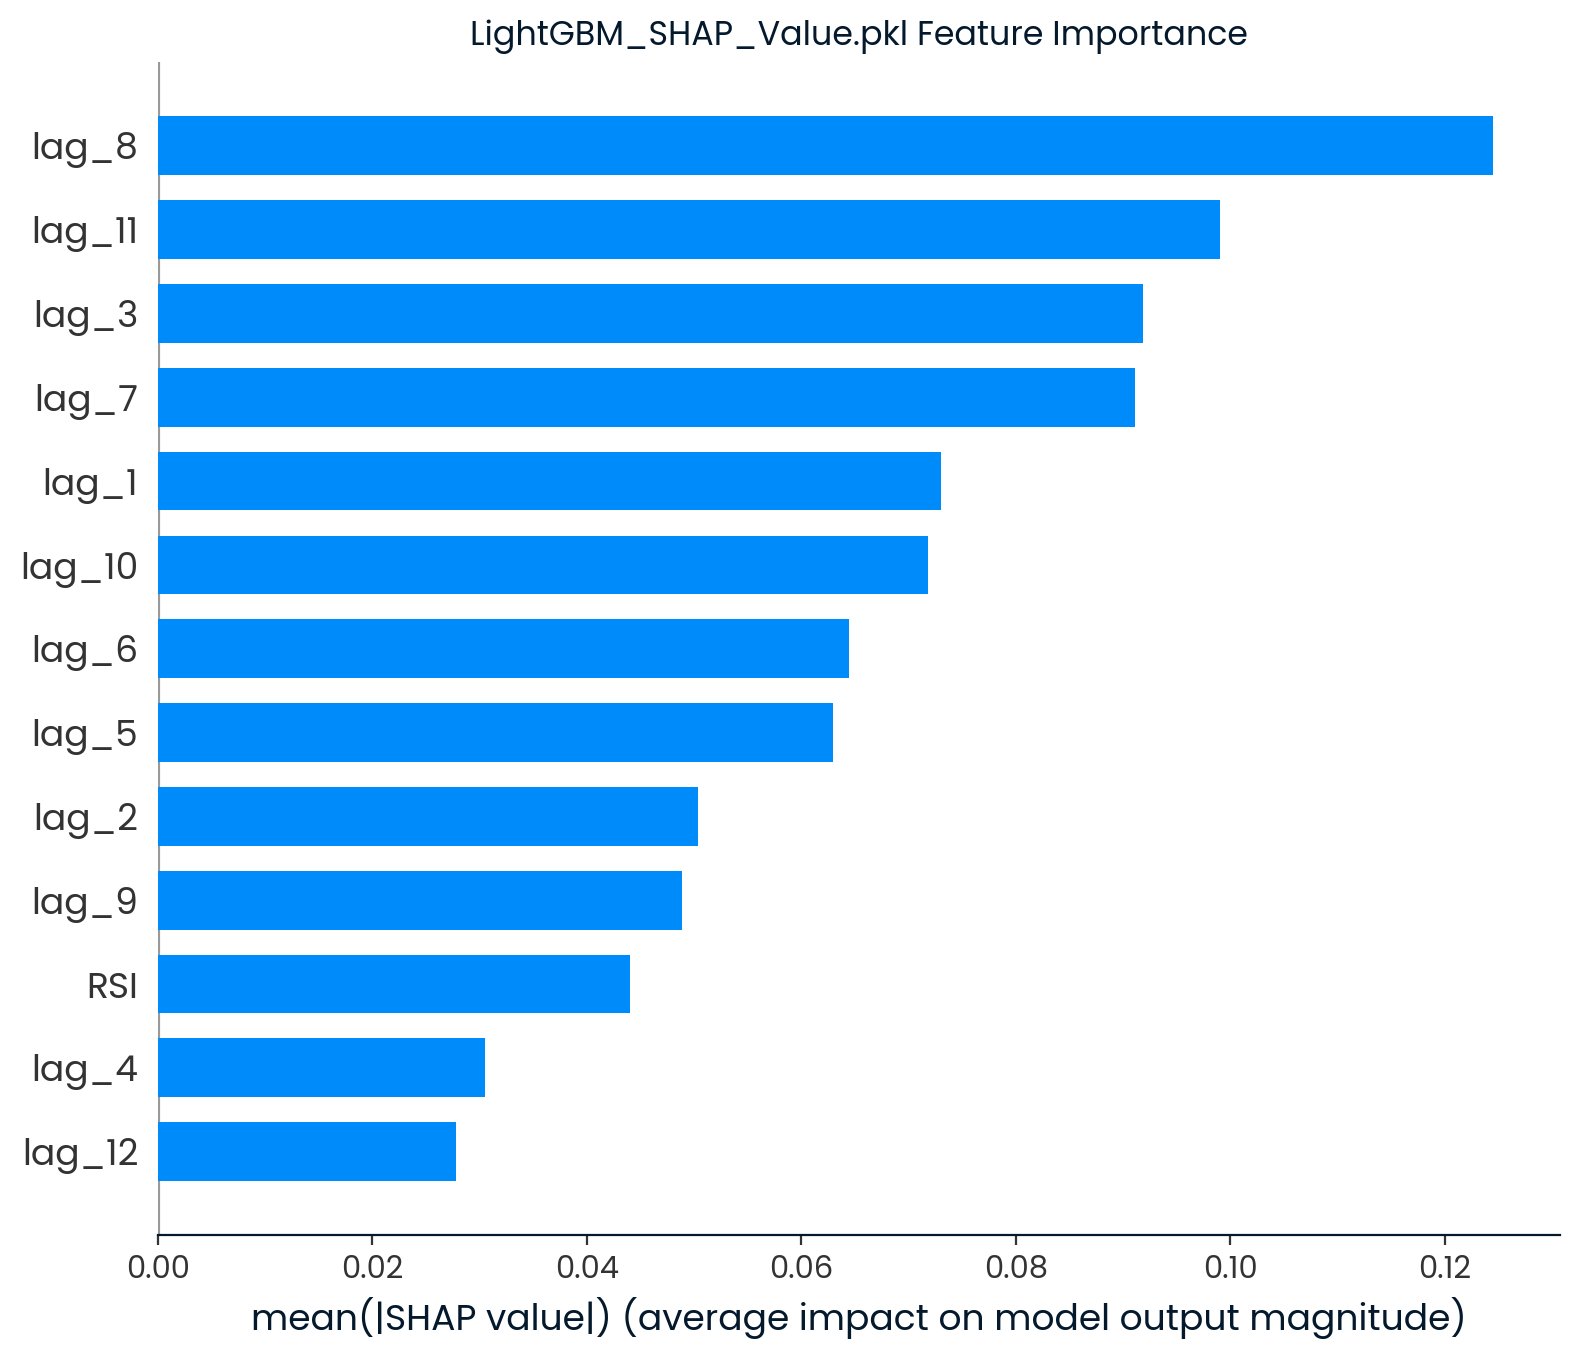

In [25]:
# LIGHT GBM FEATURE IMPORTANCE - SHAP

plot_nn_feature_importance(4)

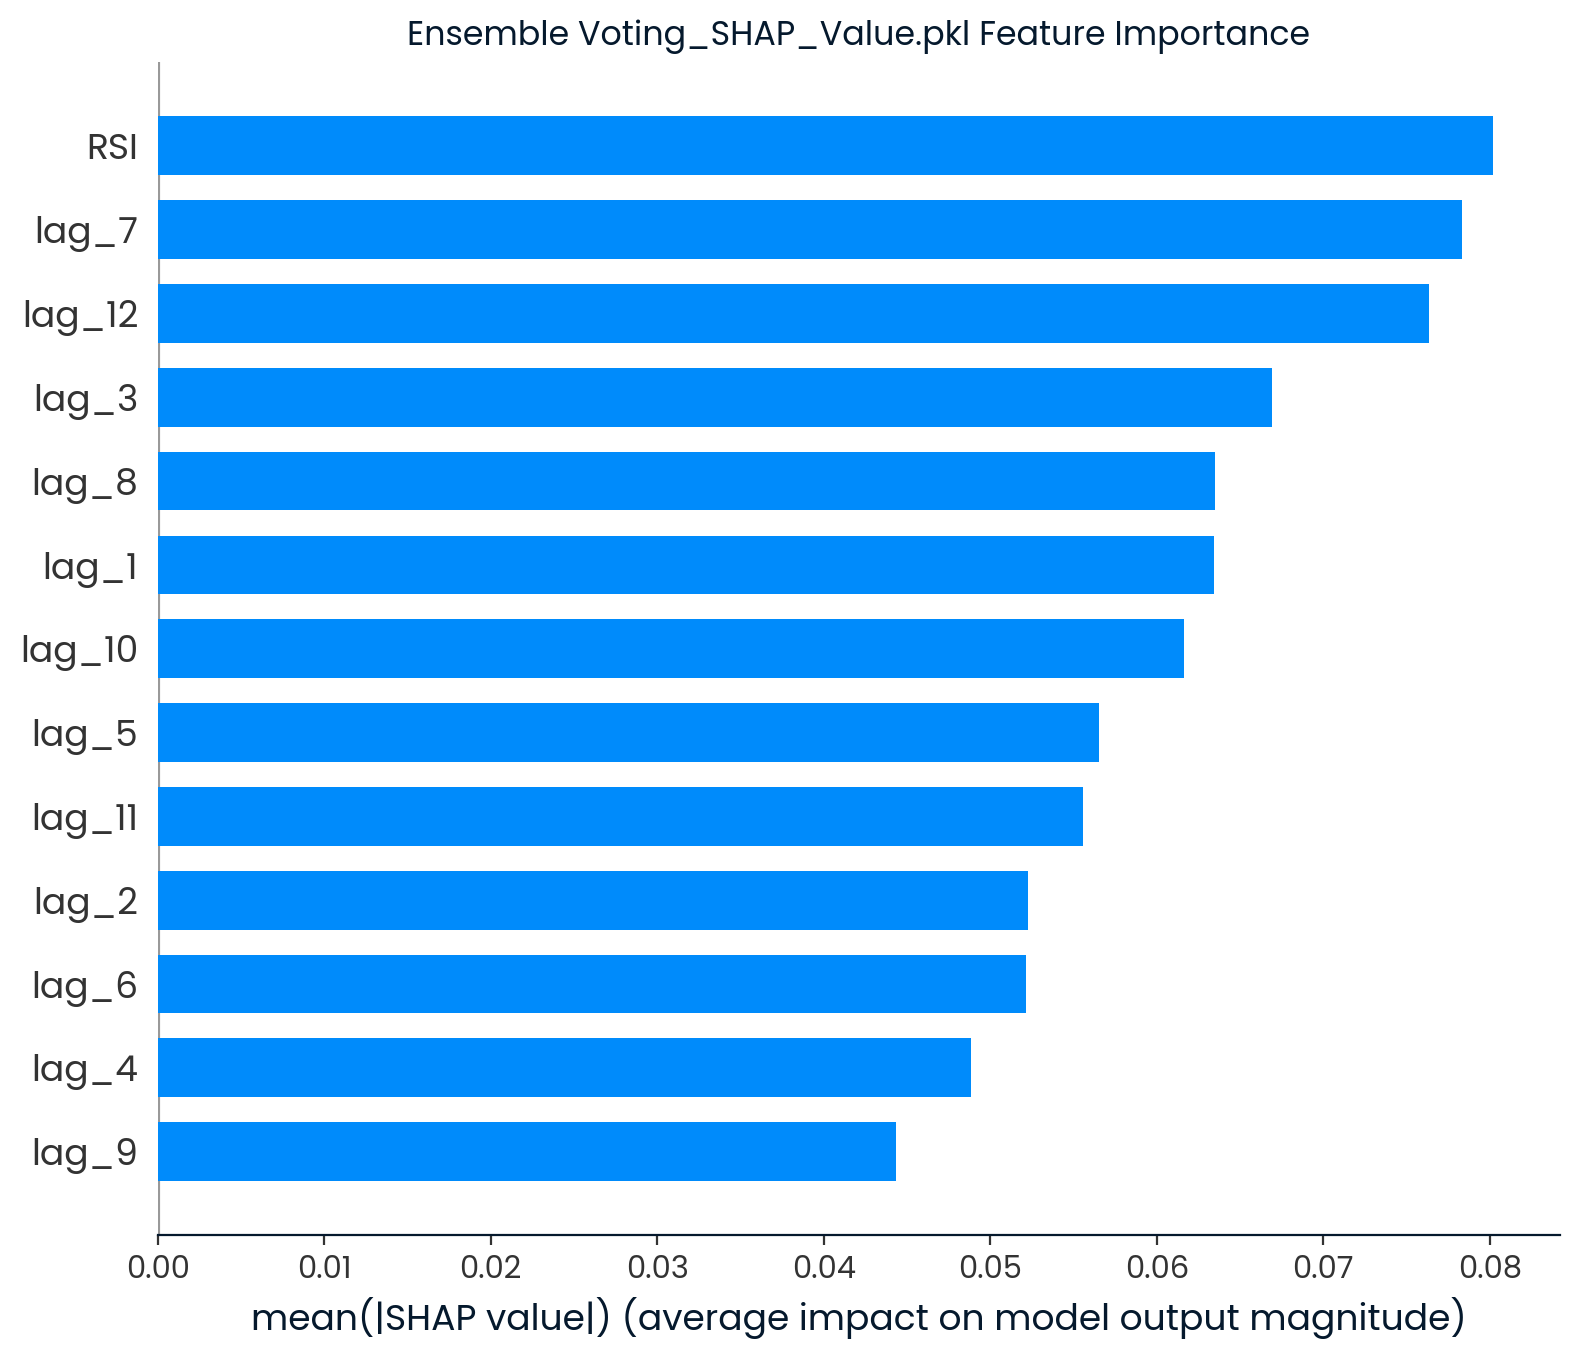

In [26]:
# E-VOTING FEATURE IMPORTANCE - SHAP

plot_nn_feature_importance(5)

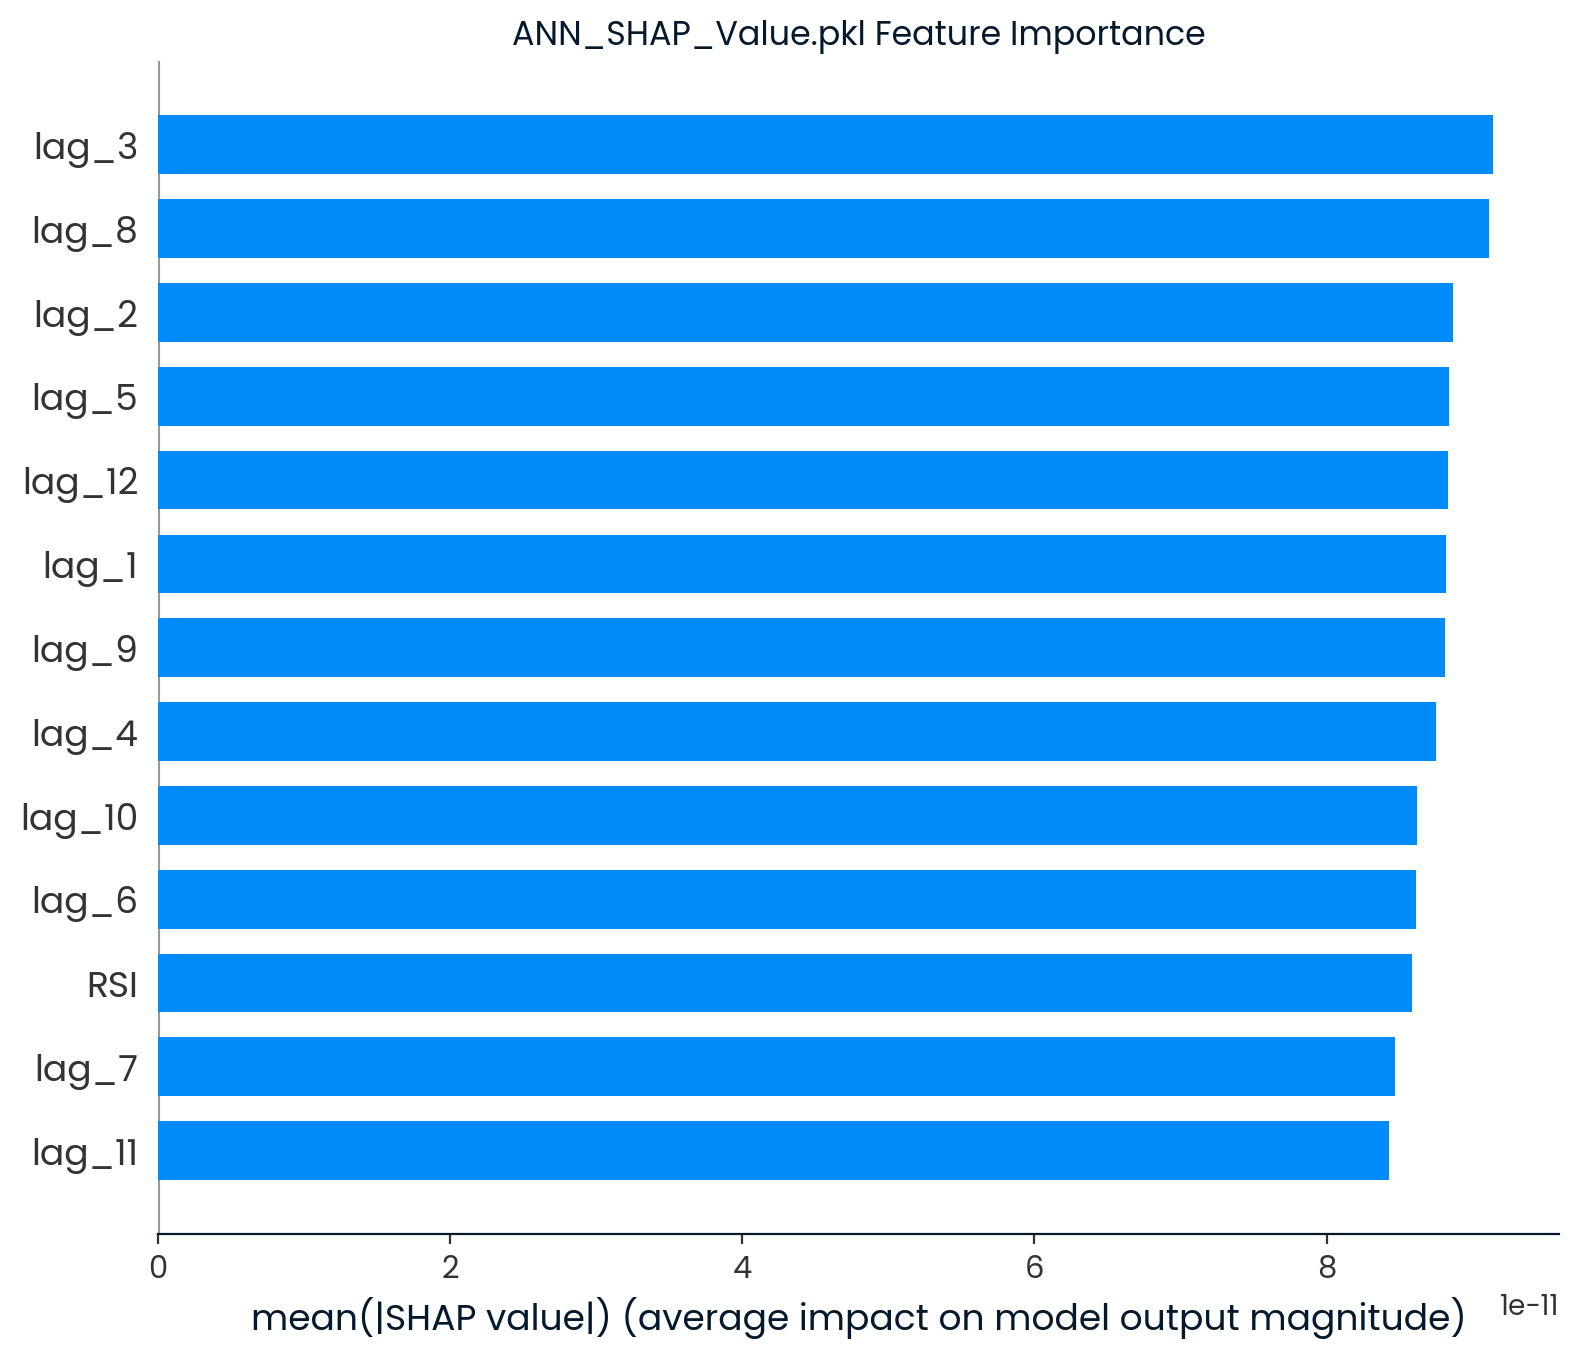

In [27]:
# ANN FEATURE IMPORTANCE - SHAP

plot_nn_feature_importance(6)

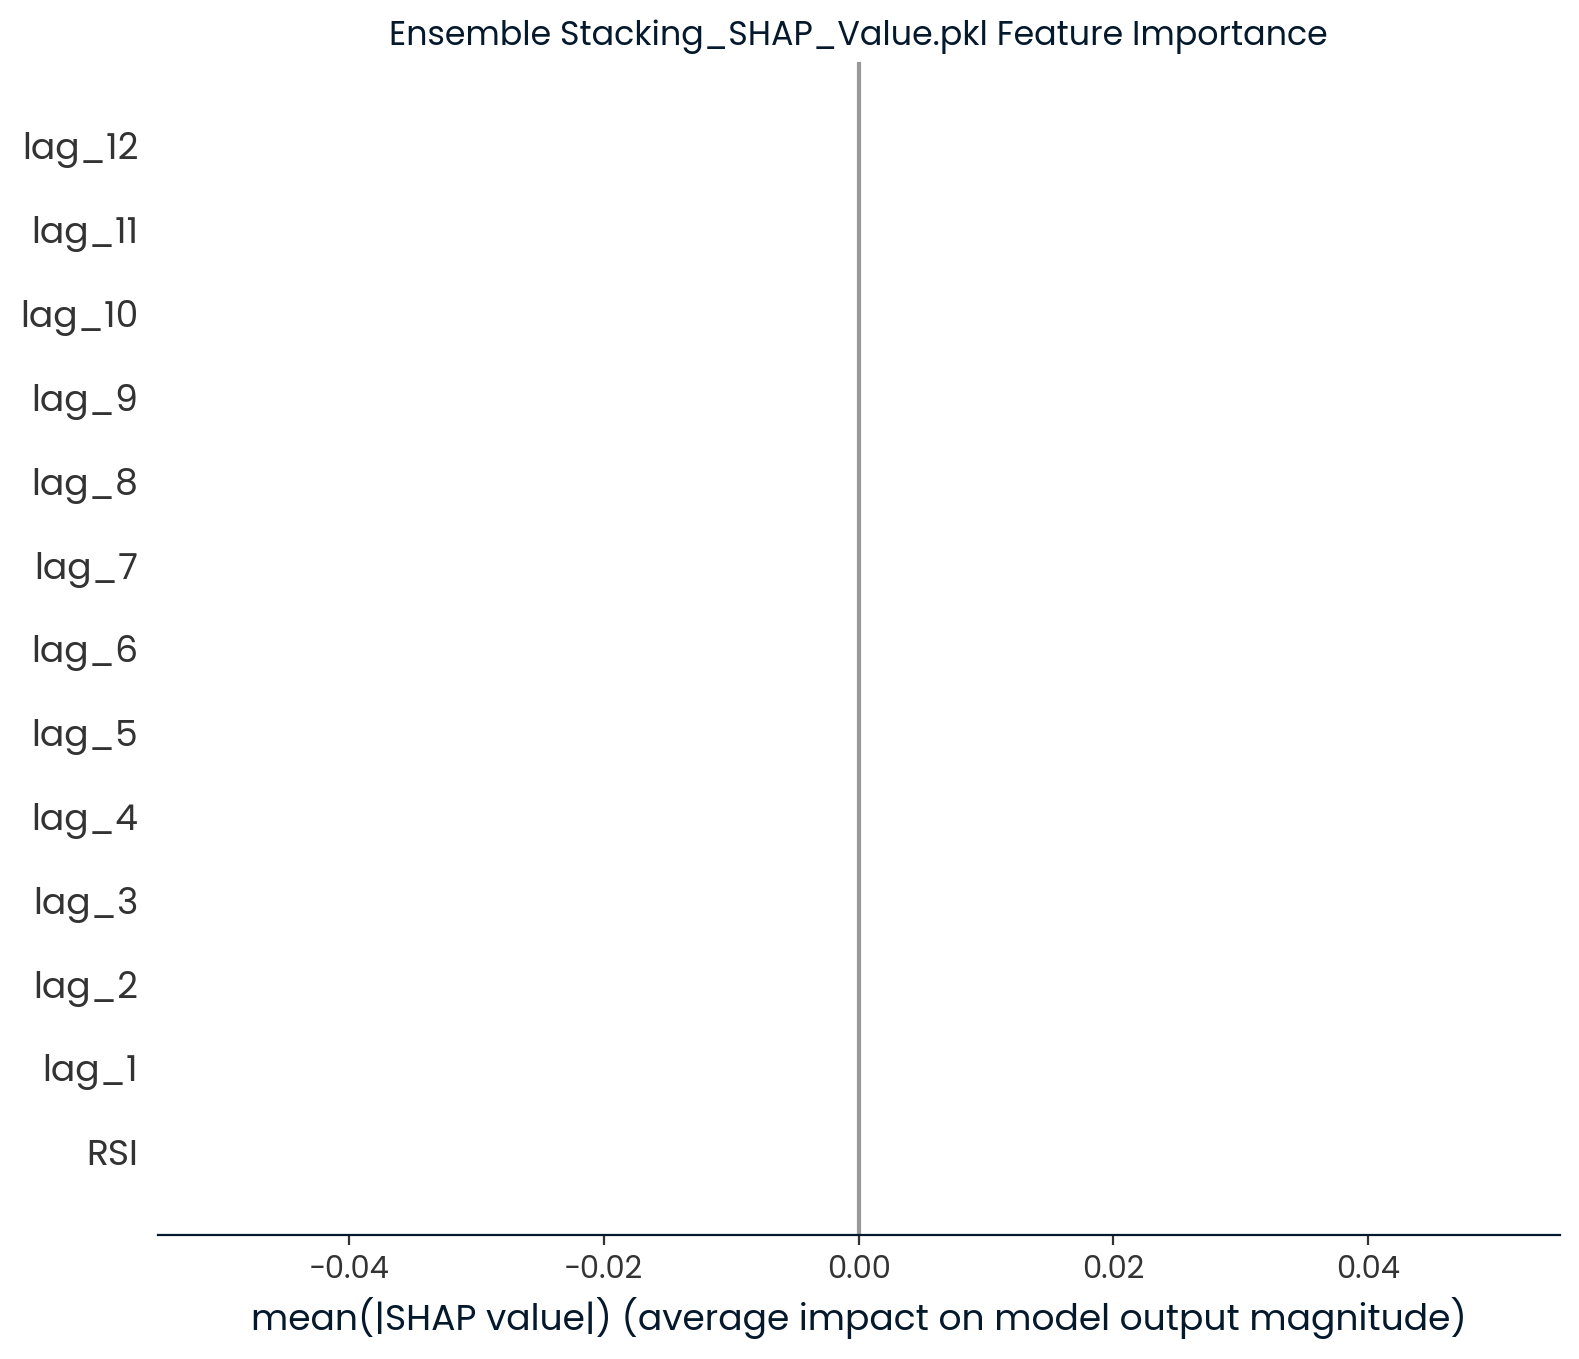

In [28]:
# E-STACKING IMPORTANCE - SHAP

plot_nn_feature_importance(7)

In [29]:
# Load the logistic regression model from a pickle file
logistic_regression_model = load_model(os.path.join(p.model_path, "Logistic.pkl"))

# Print the coefficient of the 'RSI' feature from the logistic regression model
# logistic_regression_model.coef_ is a 2D array where the first index [0] refers to the class and the second index [0] refers to the 'RSI' feature
rsi_coefficient = logistic_regression_model.coef_[0][0]
print(f"The coefficient of RSI is {rsi_coefficient:.2f}")

The coefficient of RSI is 0.13


In [30]:
def logistic_regression_probability(rsi: float) -> float:
    """
    Calculate the probability of the positive class for a given RSI value using the logistic regression model.

    Parameters:
    rsi (float): The RSI value for which to calculate the probability.

    Returns:
    float: The probability of the positive class.
    """
    # Calculate the linear combination of the RSI value and the model coefficient
    linear_combination = logistic_regression_model.coef_[0][0] * rsi
    # Apply the logistic function to get the probability
    return 1 / (1 + np.exp(-linear_combination))

def calculate_probability_difference(base_rsi_values: list, rsi_change: float) -> list:
    """
    Calculate the difference in probabilities for a list of base RSI values when a change is applied.

    Parameters:
    base_rsi_values (list): A list of base RSI values.
    rsi_change (float): The change to be applied to each base RSI value.

    Returns:
    list: A list of probability differences for each base RSI value.
    """
    # Calculate the probability difference for each base RSI value after applying the change
    return [logistic_regression_probability(rsi + rsi_change) - logistic_regression_probability(rsi) for rsi in base_rsi_values]

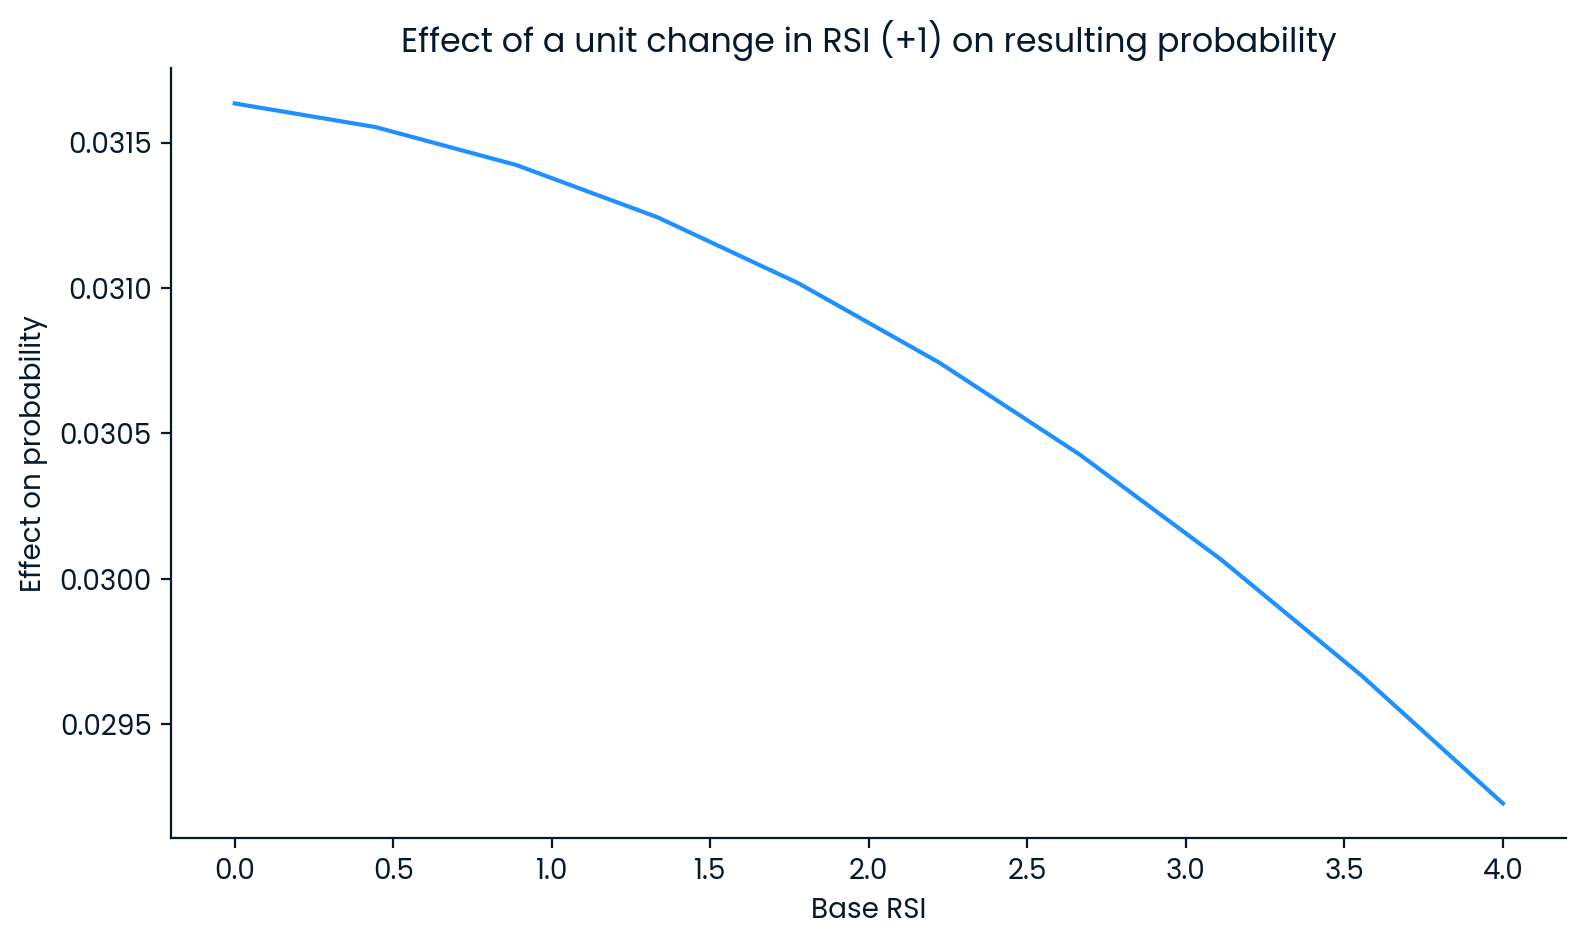

In [31]:
# Define the change in RSI value
rsi_change      = 1

# Generate a list of base RSI values ranging from 0 to 4, with 10 evenly spaced values
base_rsi_values = list(np.linspace(0, 4, num=10))

# Calculate the difference in probabilities for the base RSI values when the change is applied
dependence      = calculate_probability_difference(base_rsi_values, rsi_change)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the base RSI values against the calculated probability differences
ax.plot(base_rsi_values, dependence, color='dodgerblue')

# Remove the top and right spines from the plot for better aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the labels for the x and y axes
plt.xlabel("Base RSI")
plt.ylabel("Effect on probability")

# Set the title of the plot, including the change in RSI value
plt.title(f"Effect of a unit change in RSI (+{rsi_change}) on resulting probability")

# Save the figure
plt.savefig(f"graphs/Effect of a unit change in RSI (+{rsi_change}) on resulting probability.png")

# Display the plot
plt.show()

In [32]:
def plot_shap_summary(index: int):
    # Generate a SHAP summary plot for the SHAP values at the specified index
    shap.summary_plot(shap_values_list[index], show=False)
    
    # Set the title of the plot to include the corresponding filename
    plt.title(f"{shap_filenames[index]} SHAP Value Summary")

    # Save the figure
    plt.savefig(f"graphs/{shap_filenames[index]} SHAP Value Summary.png")
    
    # Display the plot
    plt.show()
    
def plot_shap_waterfall(index: int):
    # Generate a SHAP waterfall plot for the SHAP values at the specified index
    # The [0] index is used to select the first instance's SHAP values for the plot
    shap.plots.waterfall(shap_values_list[index][0], show=False)
    
    # Set the title of the plot to include the corresponding filename
    plt.title(f"{shap_filenames[index]} SHAP Value Waterfall Plot")
 
    # Save the figure
    plt.savefig(f"graphs/{shap_filenames[index]} SHAP Value Waterfall Plot.png")

    # Display the plot
    plt.show()
    
def plot_shap_rsi_scatter(index: int):
    # Create a figure and axis object with a specified size
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # Create a custom colormap with 5 discrete colors ranging from 'dodgerblue' to a custom pink color
    custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['dodgerblue', np.array([255, 13, 87]) / 255], N=5)
    
    # Extract the RSI values from the SHAP data for the specified index
    rsi_values = [instance_data[0] for instance_data in shap_values_list[index].data]
    
    # Extract the SHAP values from the SHAP data for the specified index
    shap_values = [instance_value[0] for instance_value in shap_values_list[index].values]
    
    # Create a scatter plot of RSI values vs. SHAP values, with color mapping based on RSI values
    plt.scatter(rsi_values, shap_values, marker='.', c=rsi_values, cmap=custom_cmap)
    
    # Hide the top and right spines of the plot for better aesthetics
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set the title of the plot to include the corresponding filename
    plt.title(f"[{shap_filenames[index]}] Impact of RSI on Model Prediction")
    
    # Label the x-axis as "RSI"
    plt.xlabel("RSI")
    
    # Label the y-axis as "SHAP Value"
    plt.ylabel("SHAP Value")
    
    # Save the figure
    plt.savefig(f"graphs/{shap_filenames[index]} Impact of RSI on Model Prediction.png")
    
    # Display the plot
    plt.show()

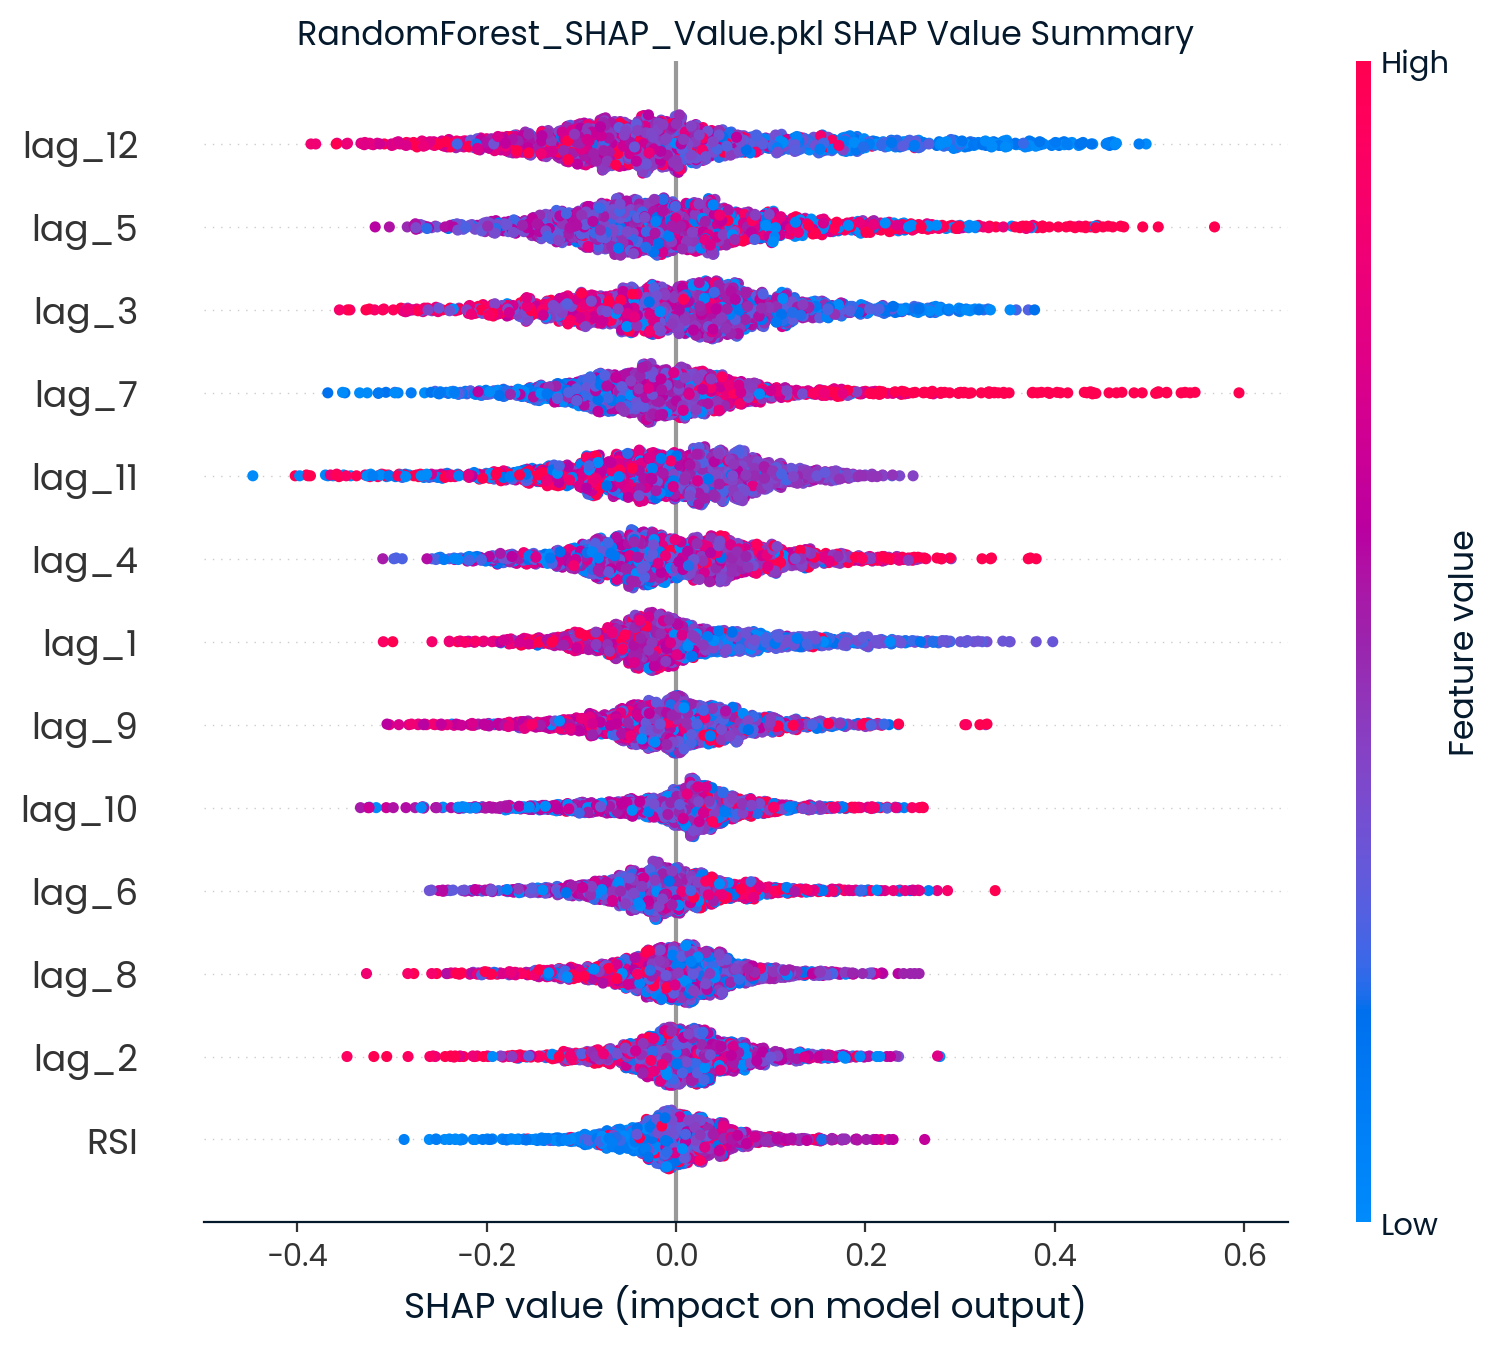

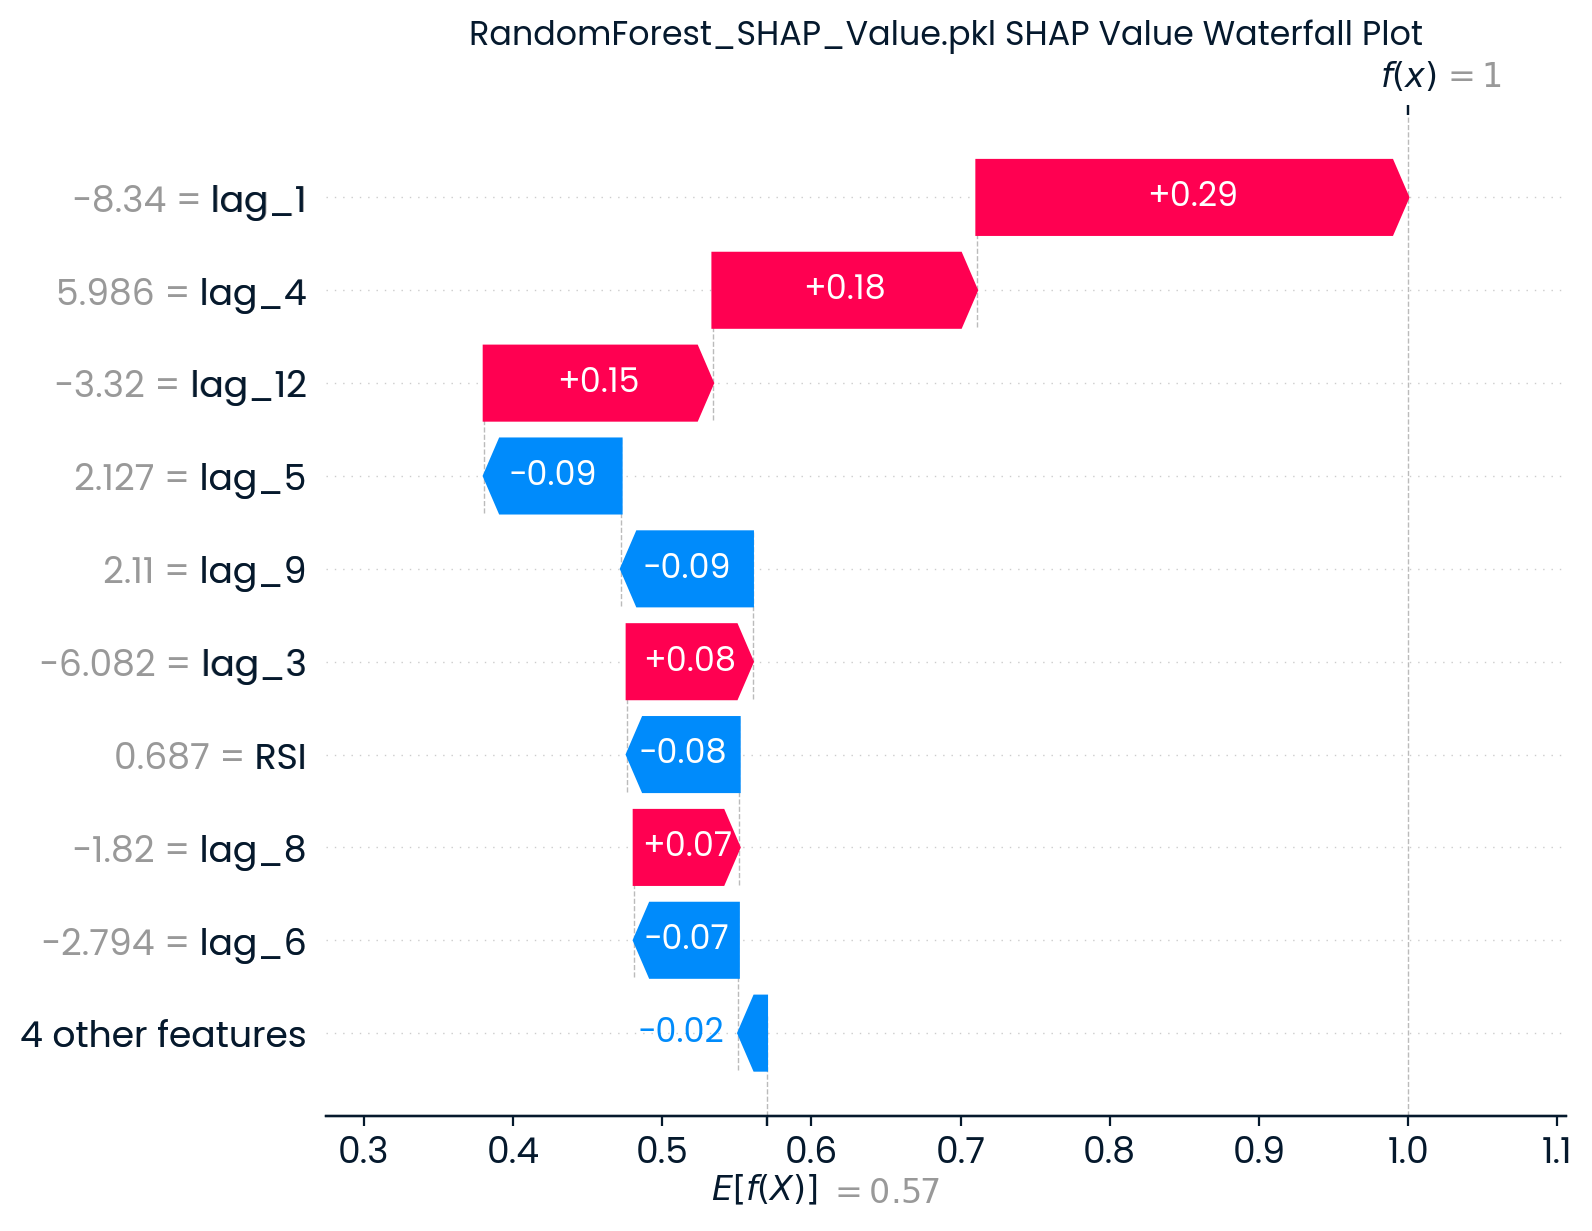

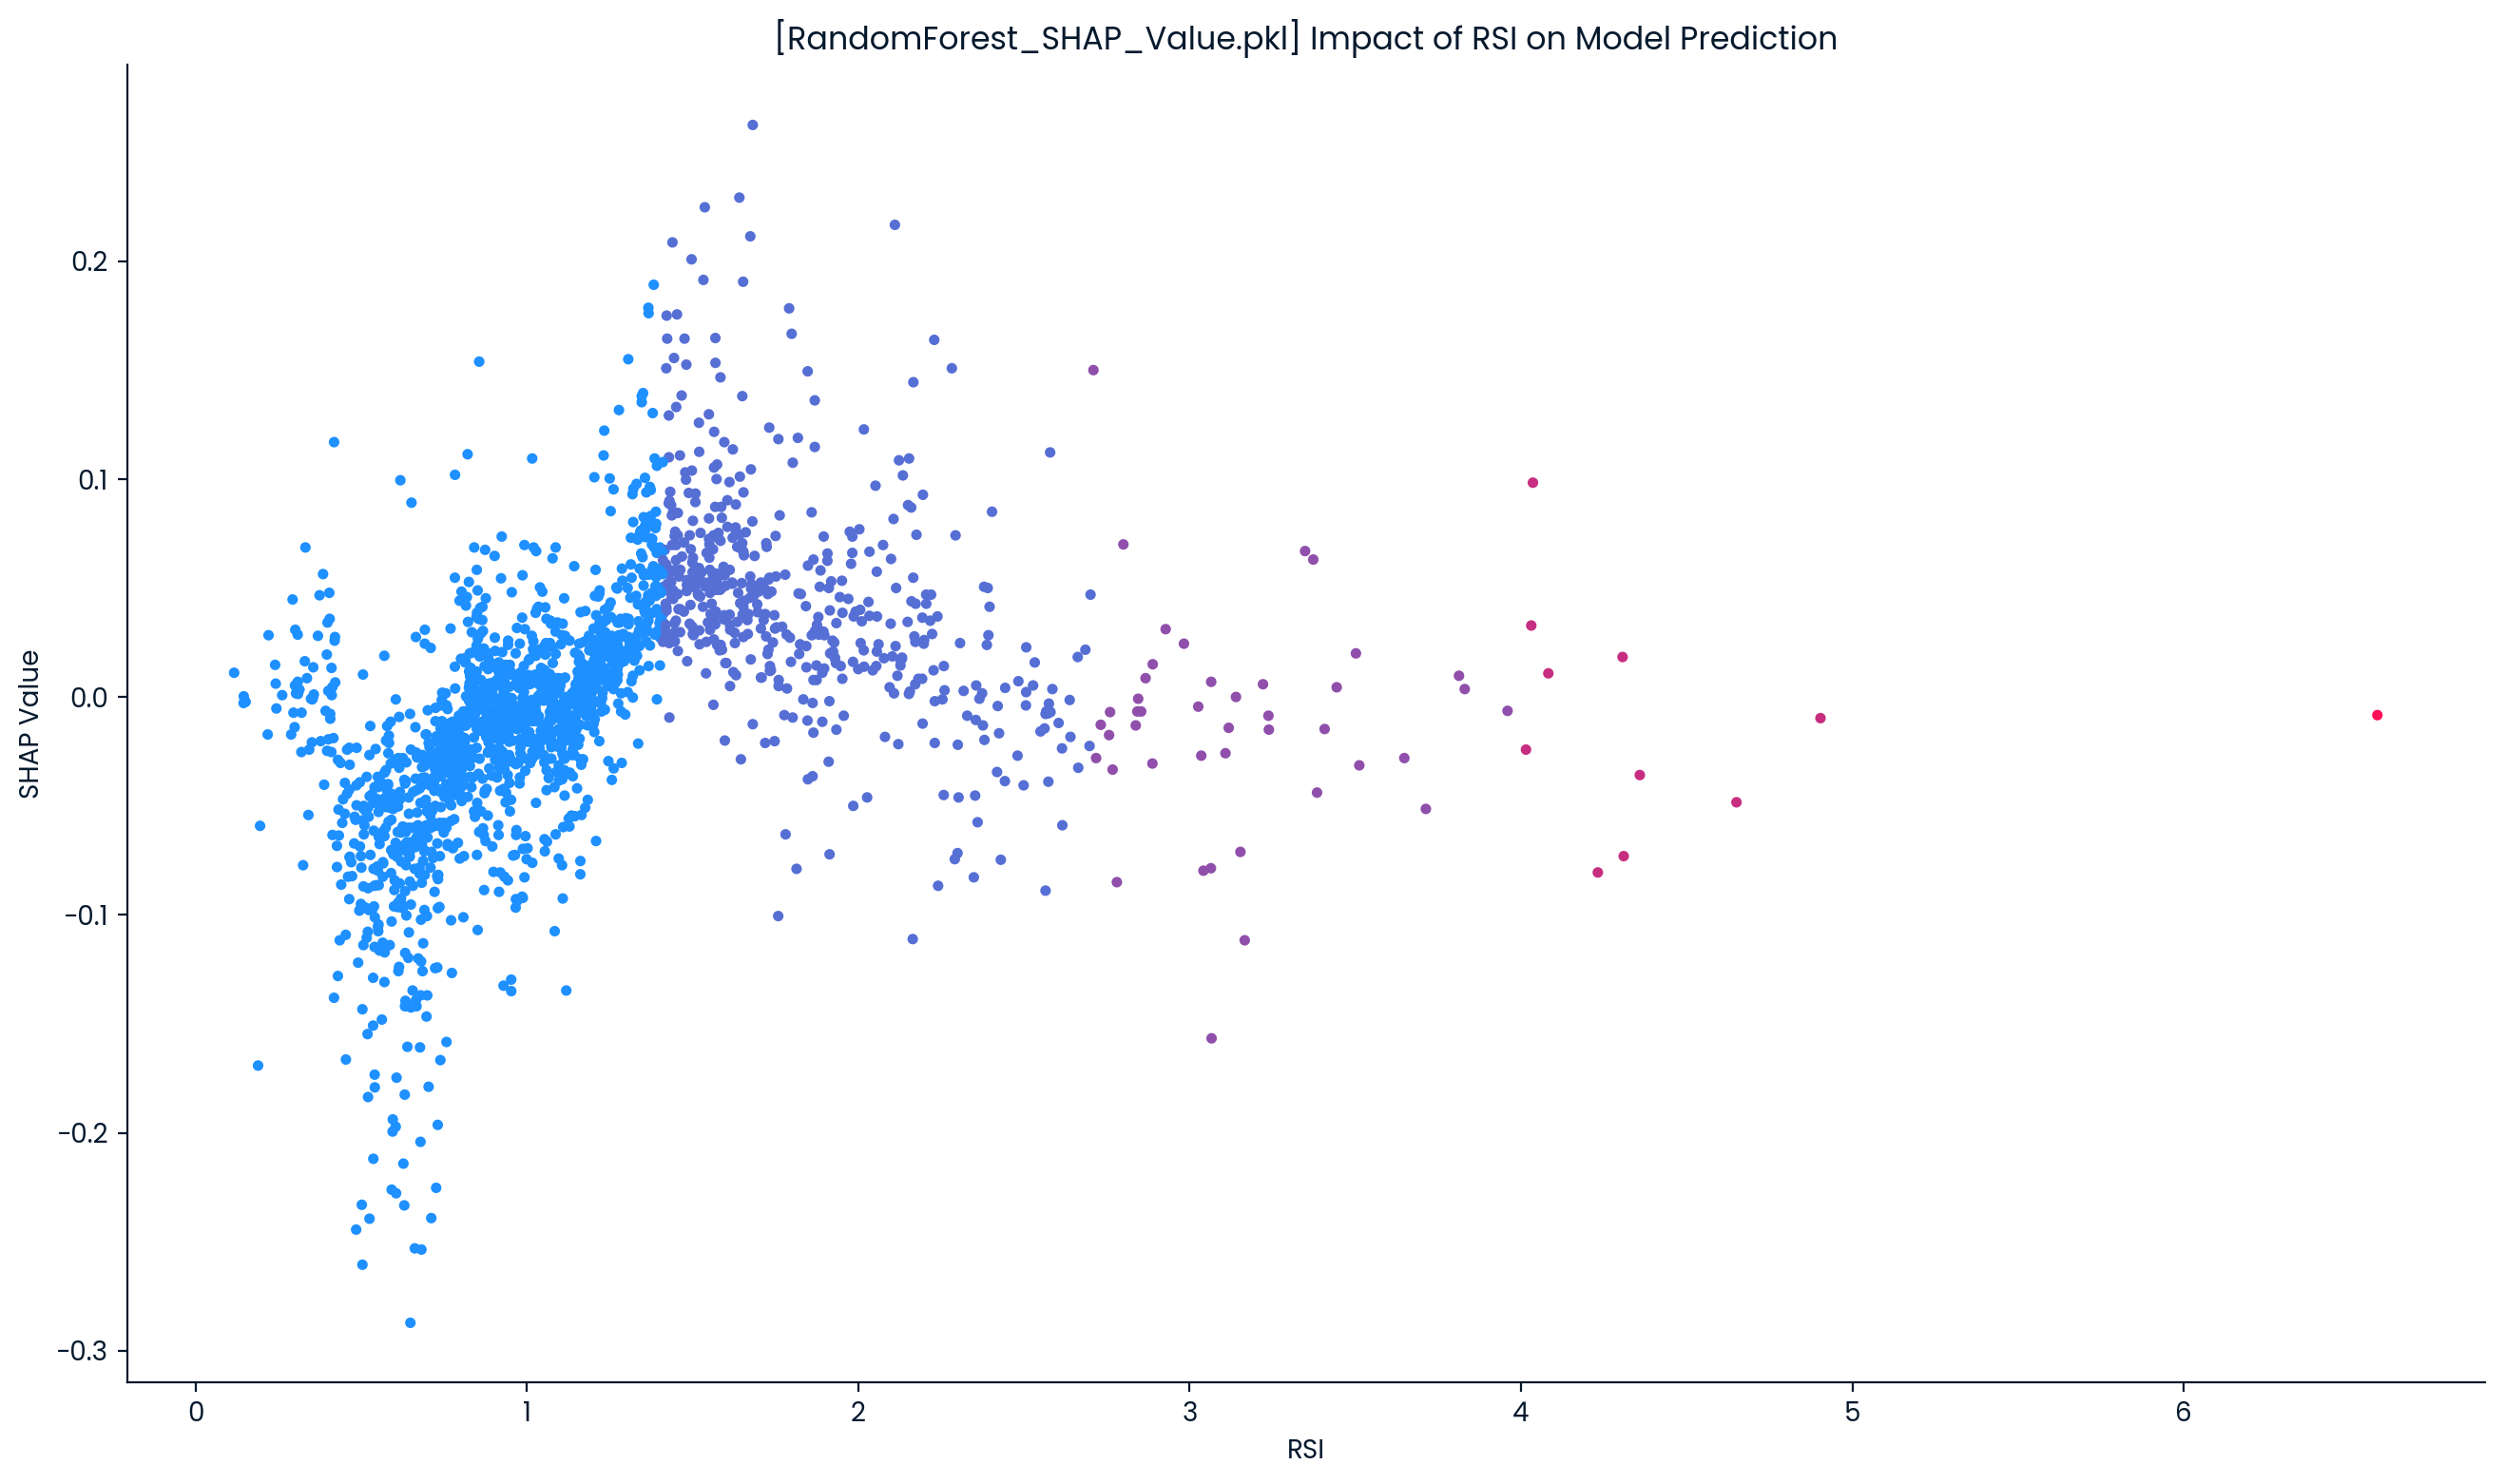

In [33]:
# RANDOM FOREST SHAP PLOTS

plot_shap_summary(0)
plot_shap_waterfall(0)
plot_shap_rsi_scatter(0)

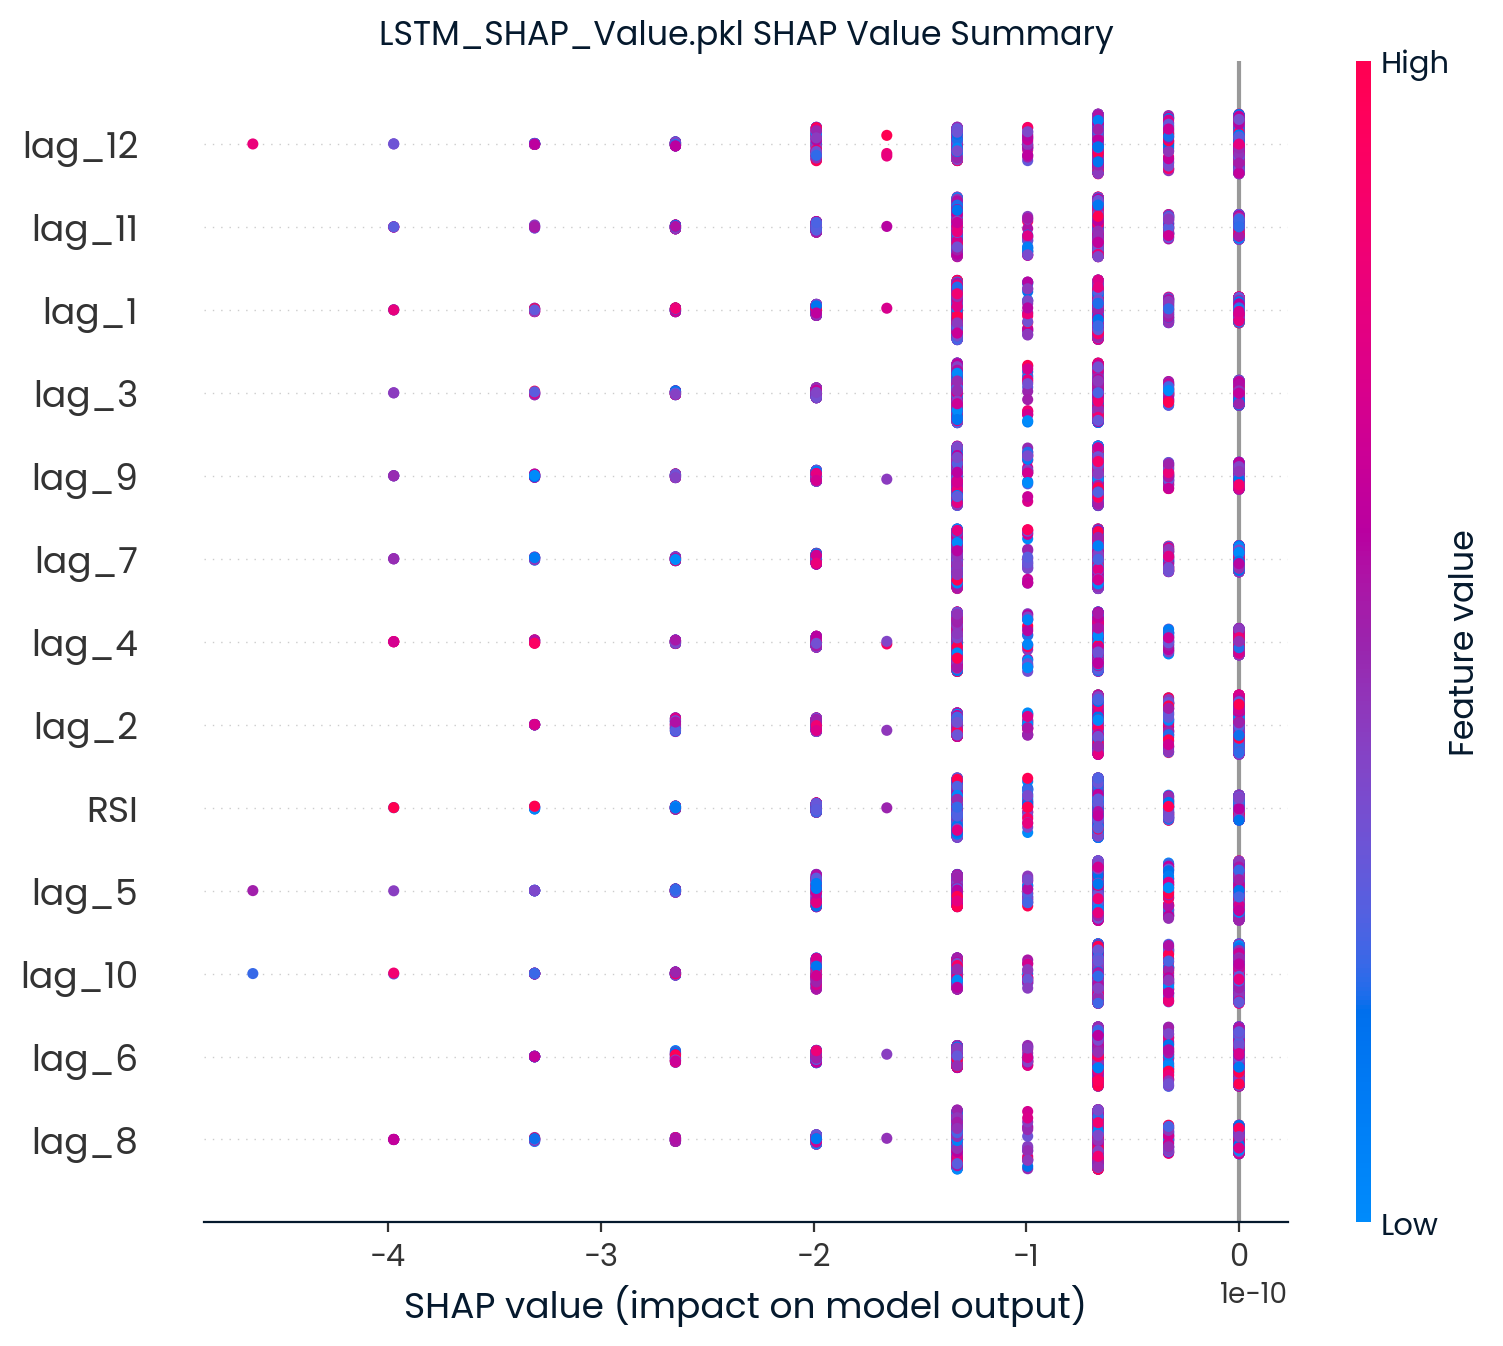

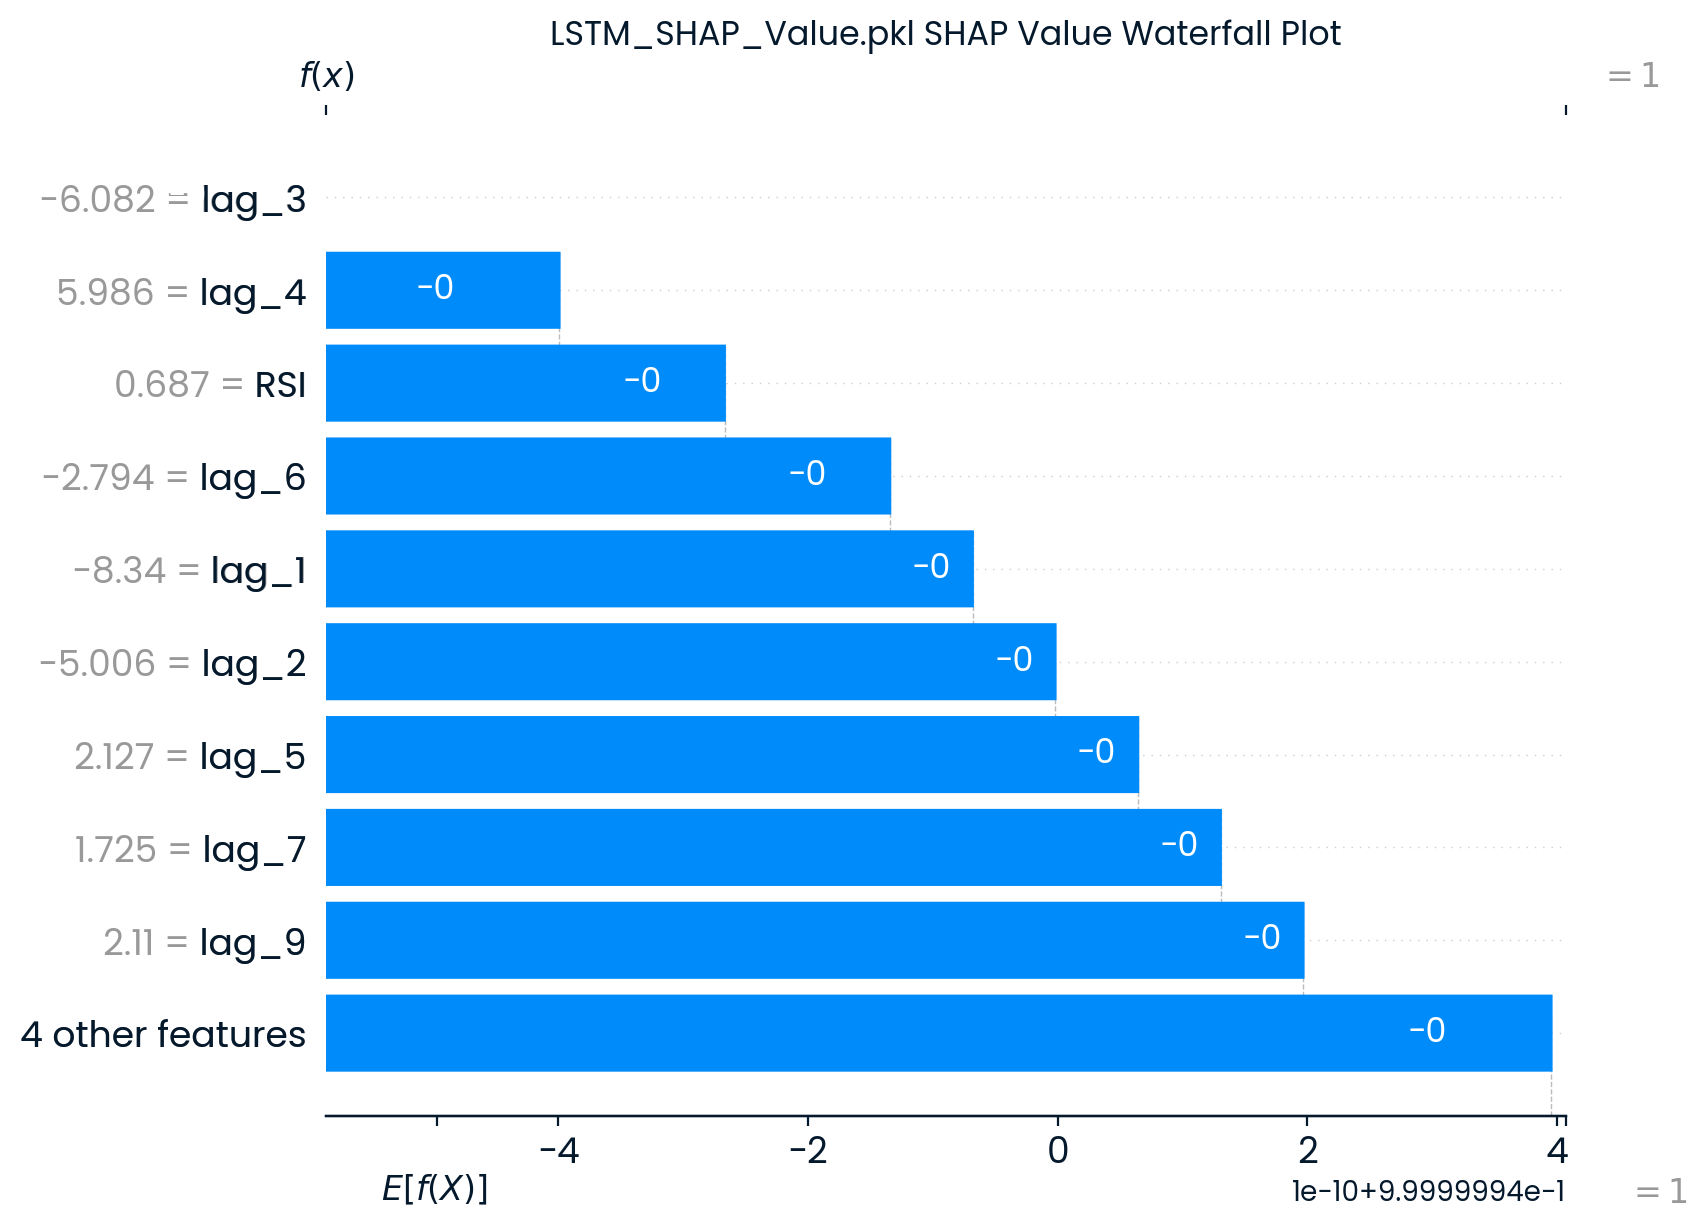

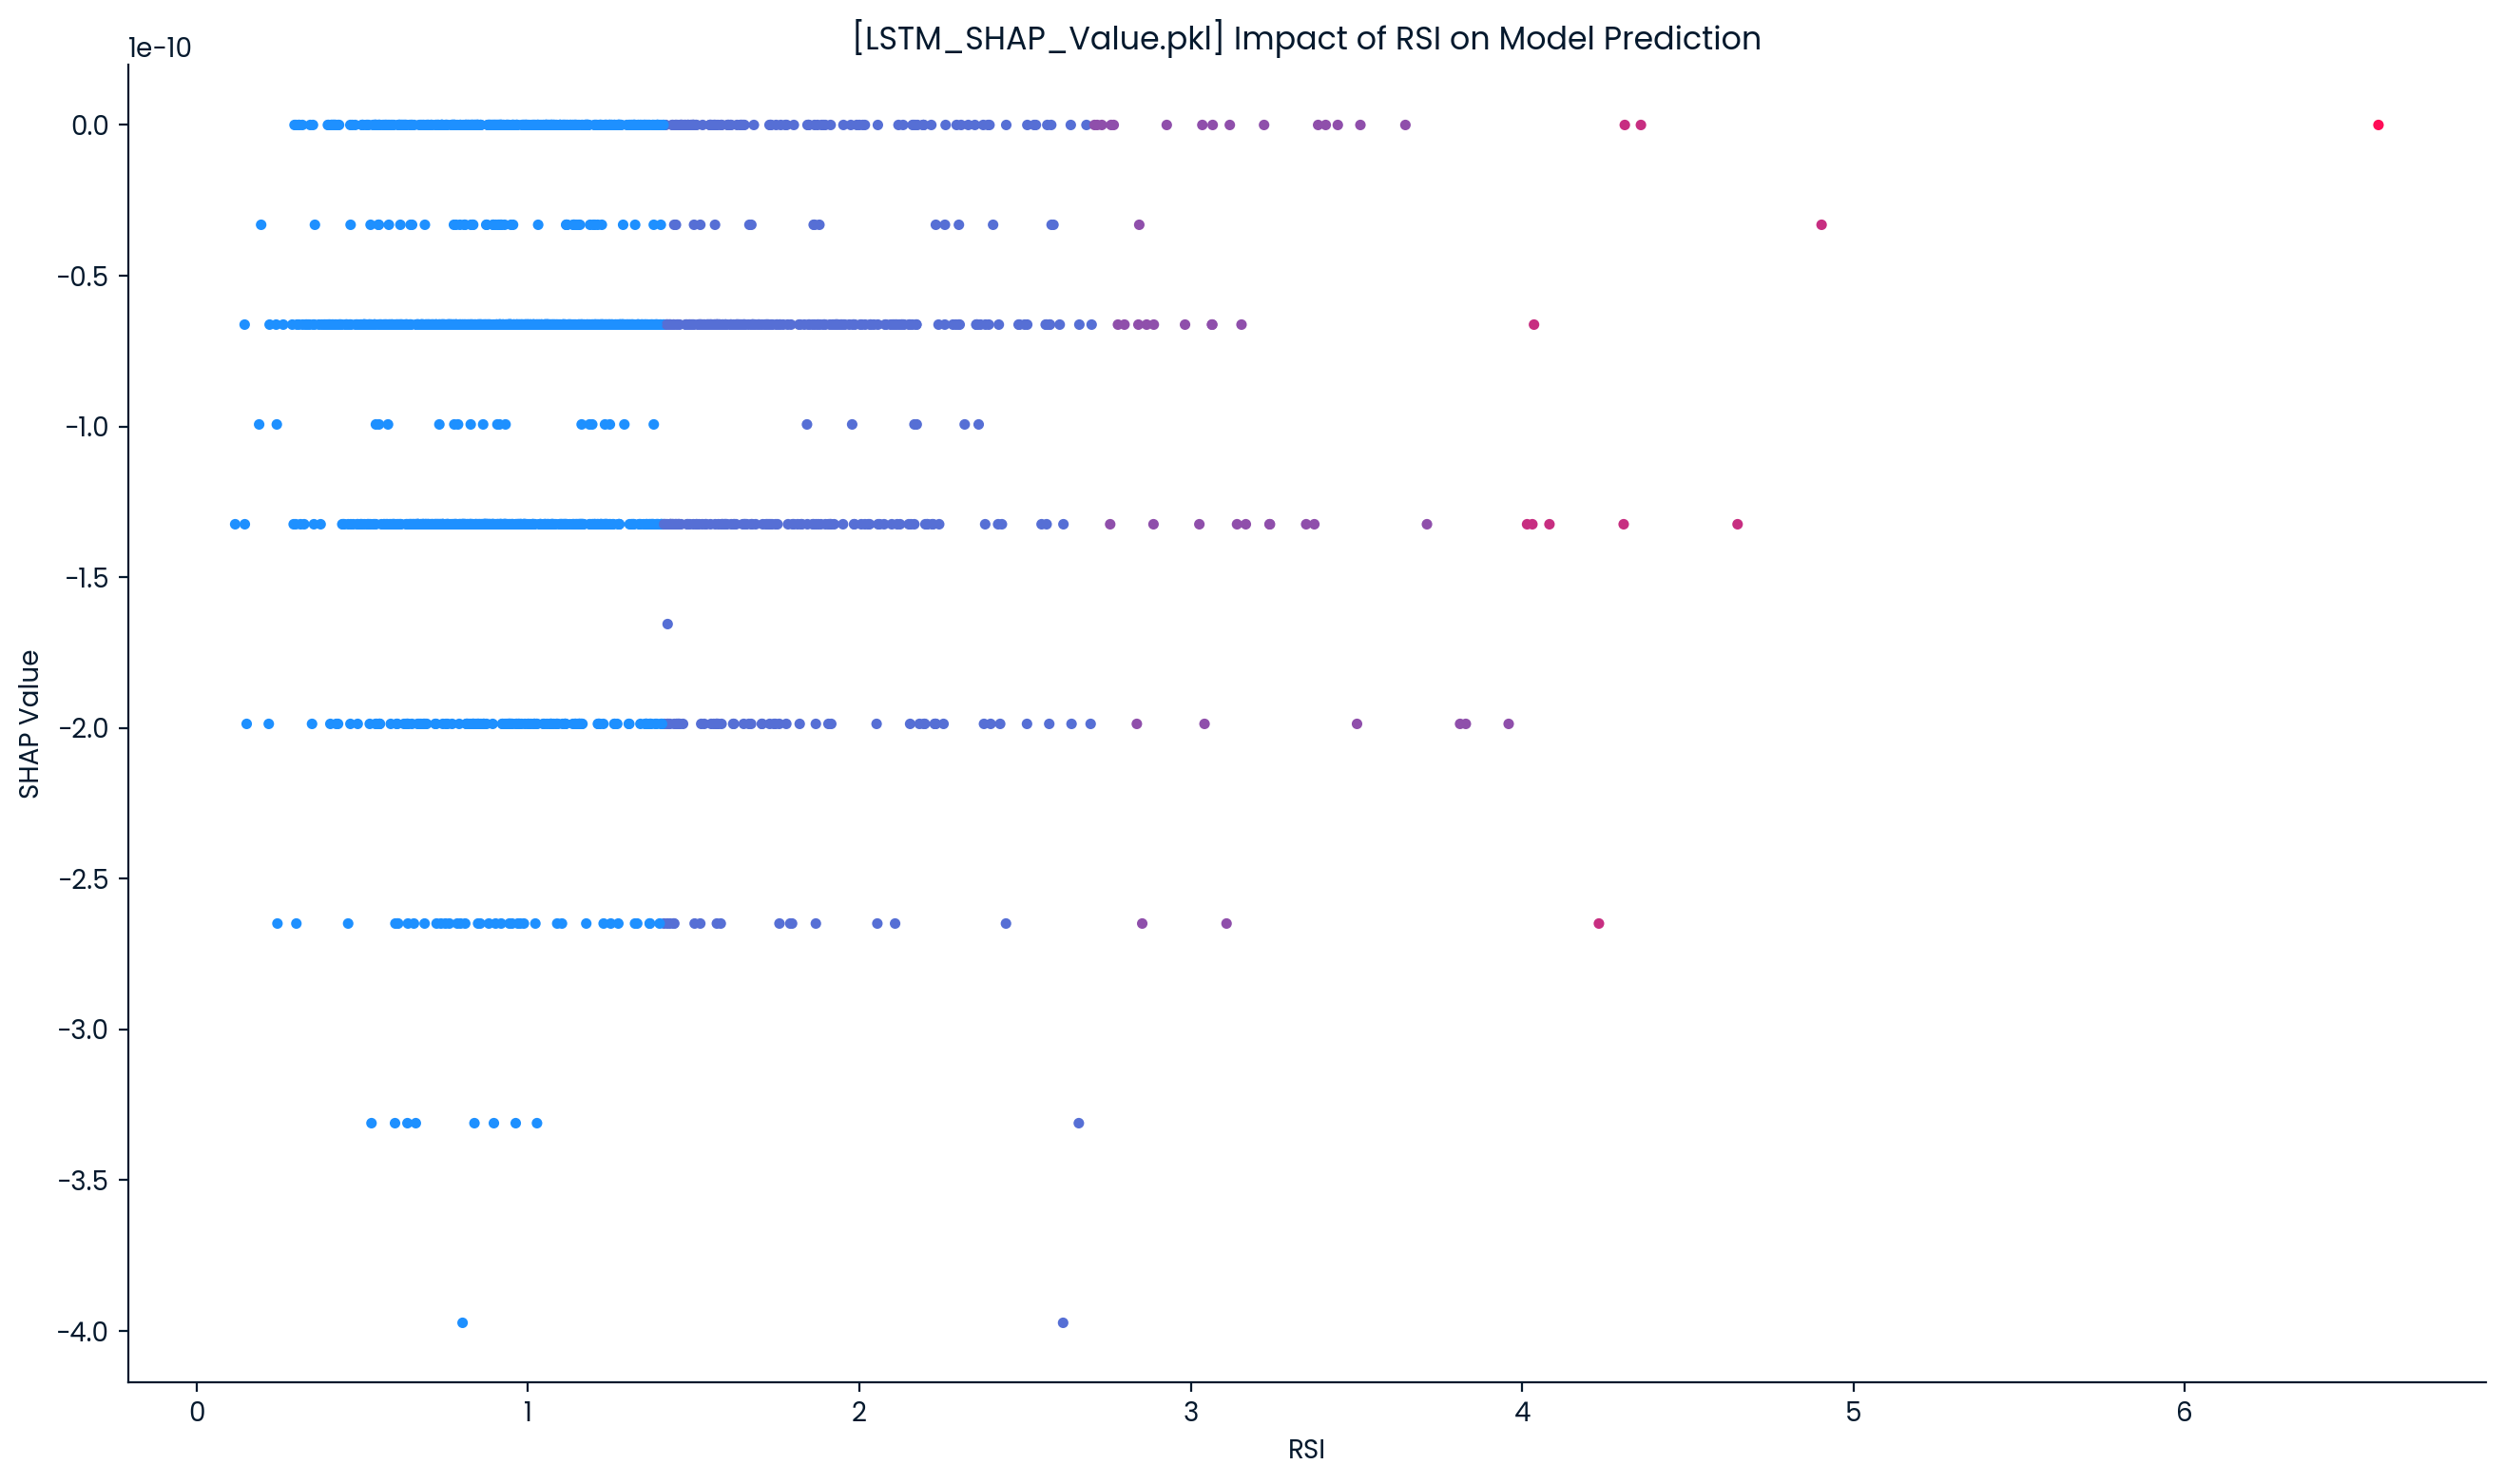

In [34]:
# LSTM SHAP PLOTS

plot_shap_summary(1)
plot_shap_waterfall(1)
plot_shap_rsi_scatter(1)

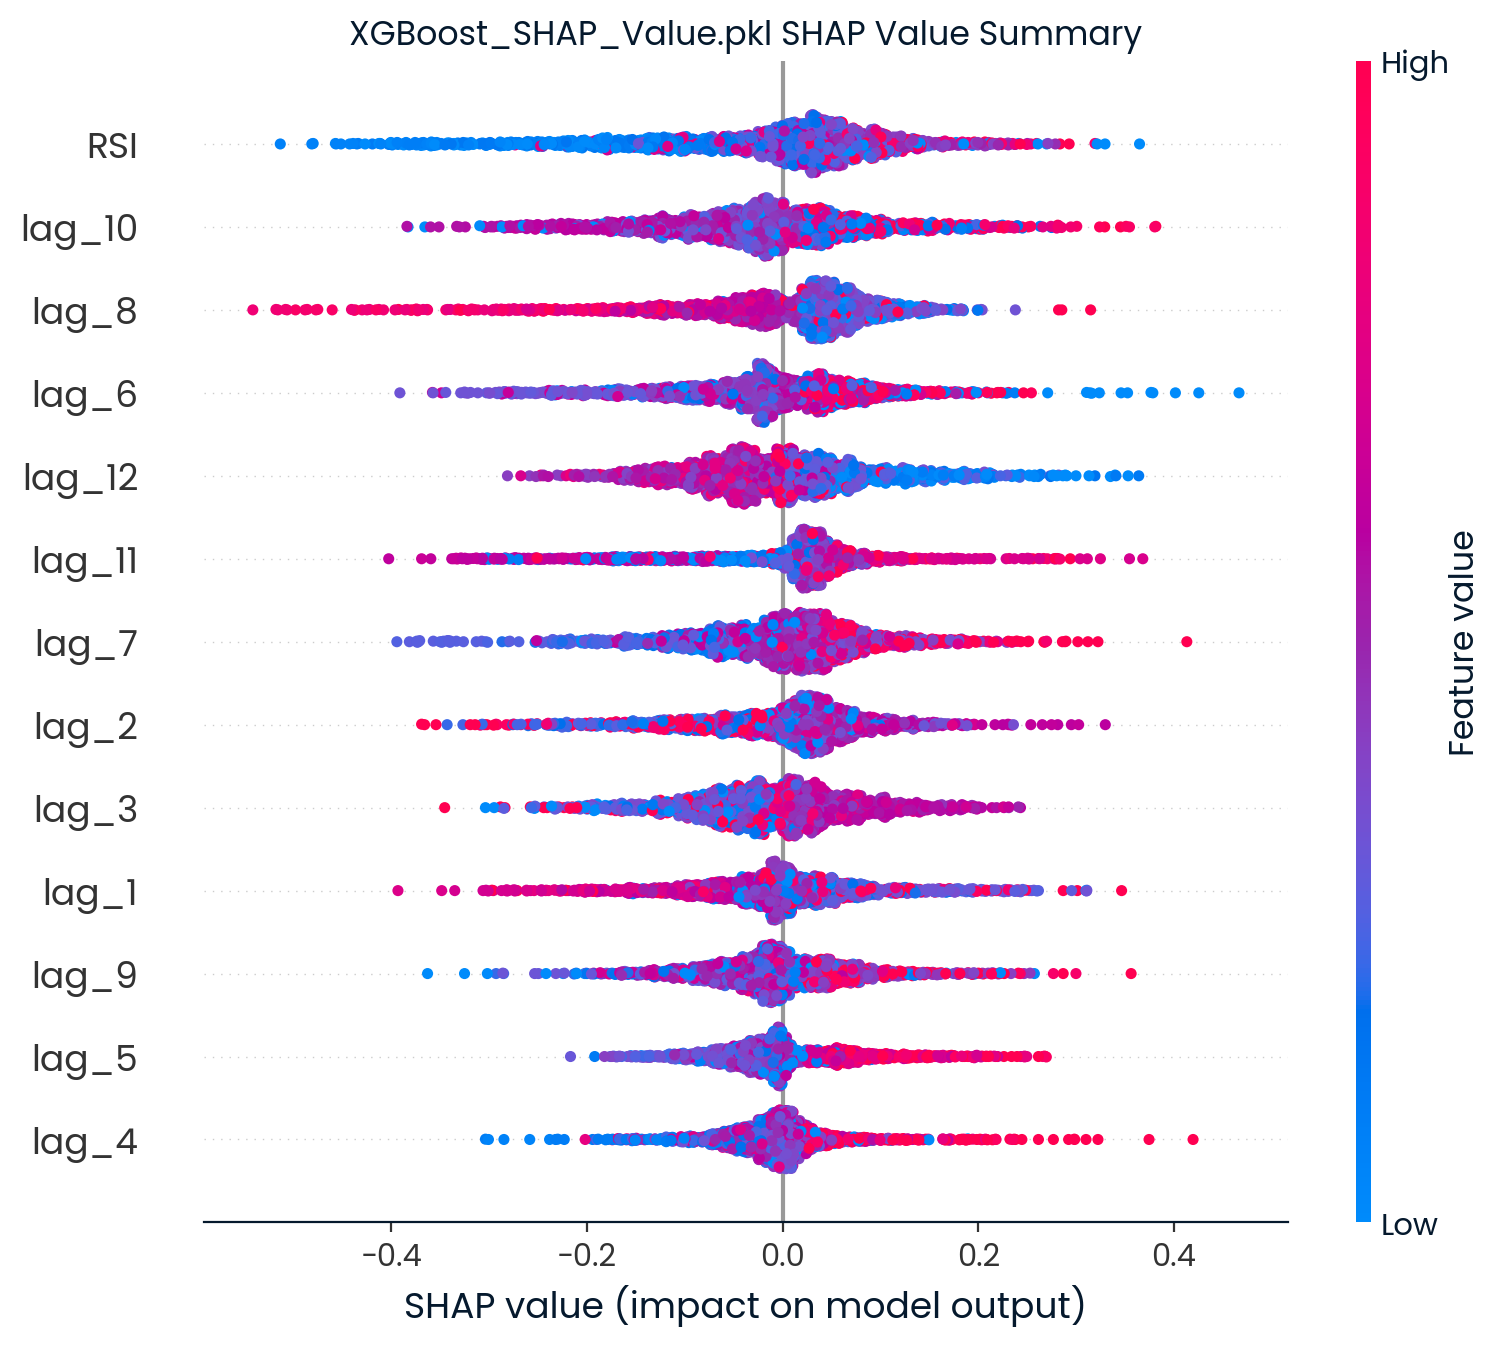

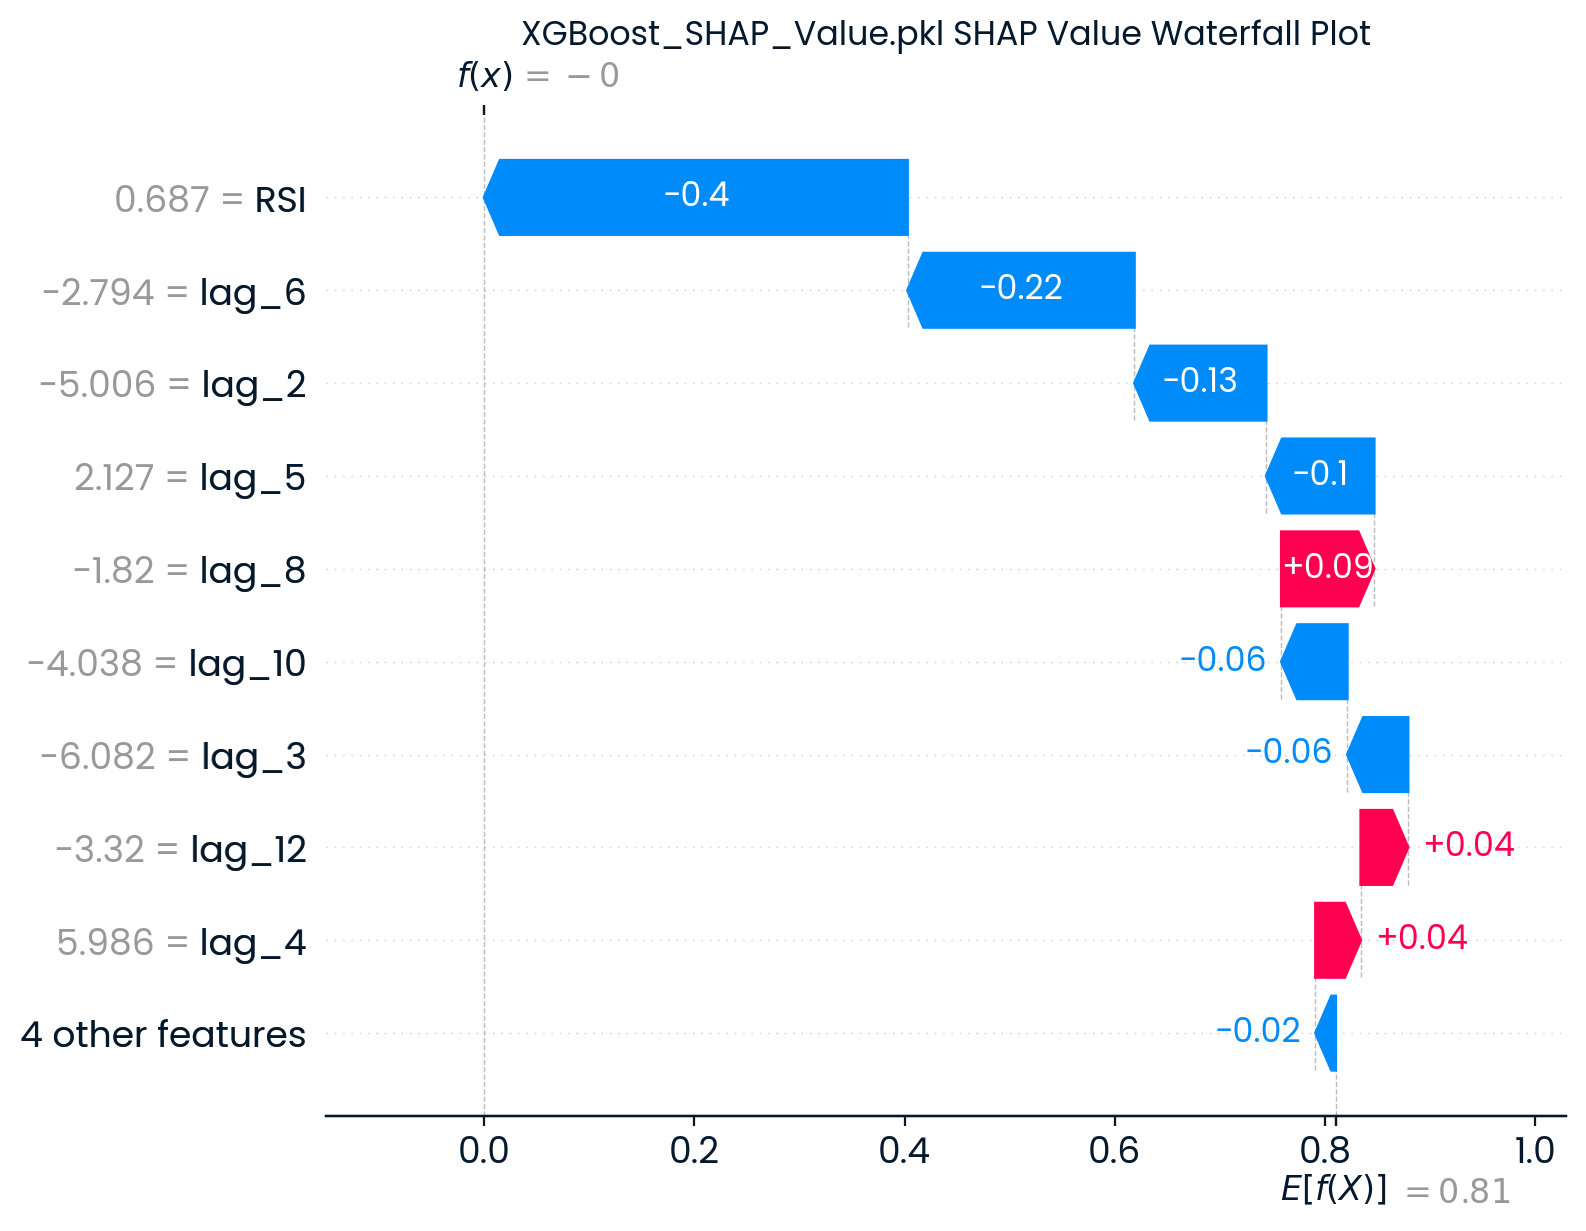

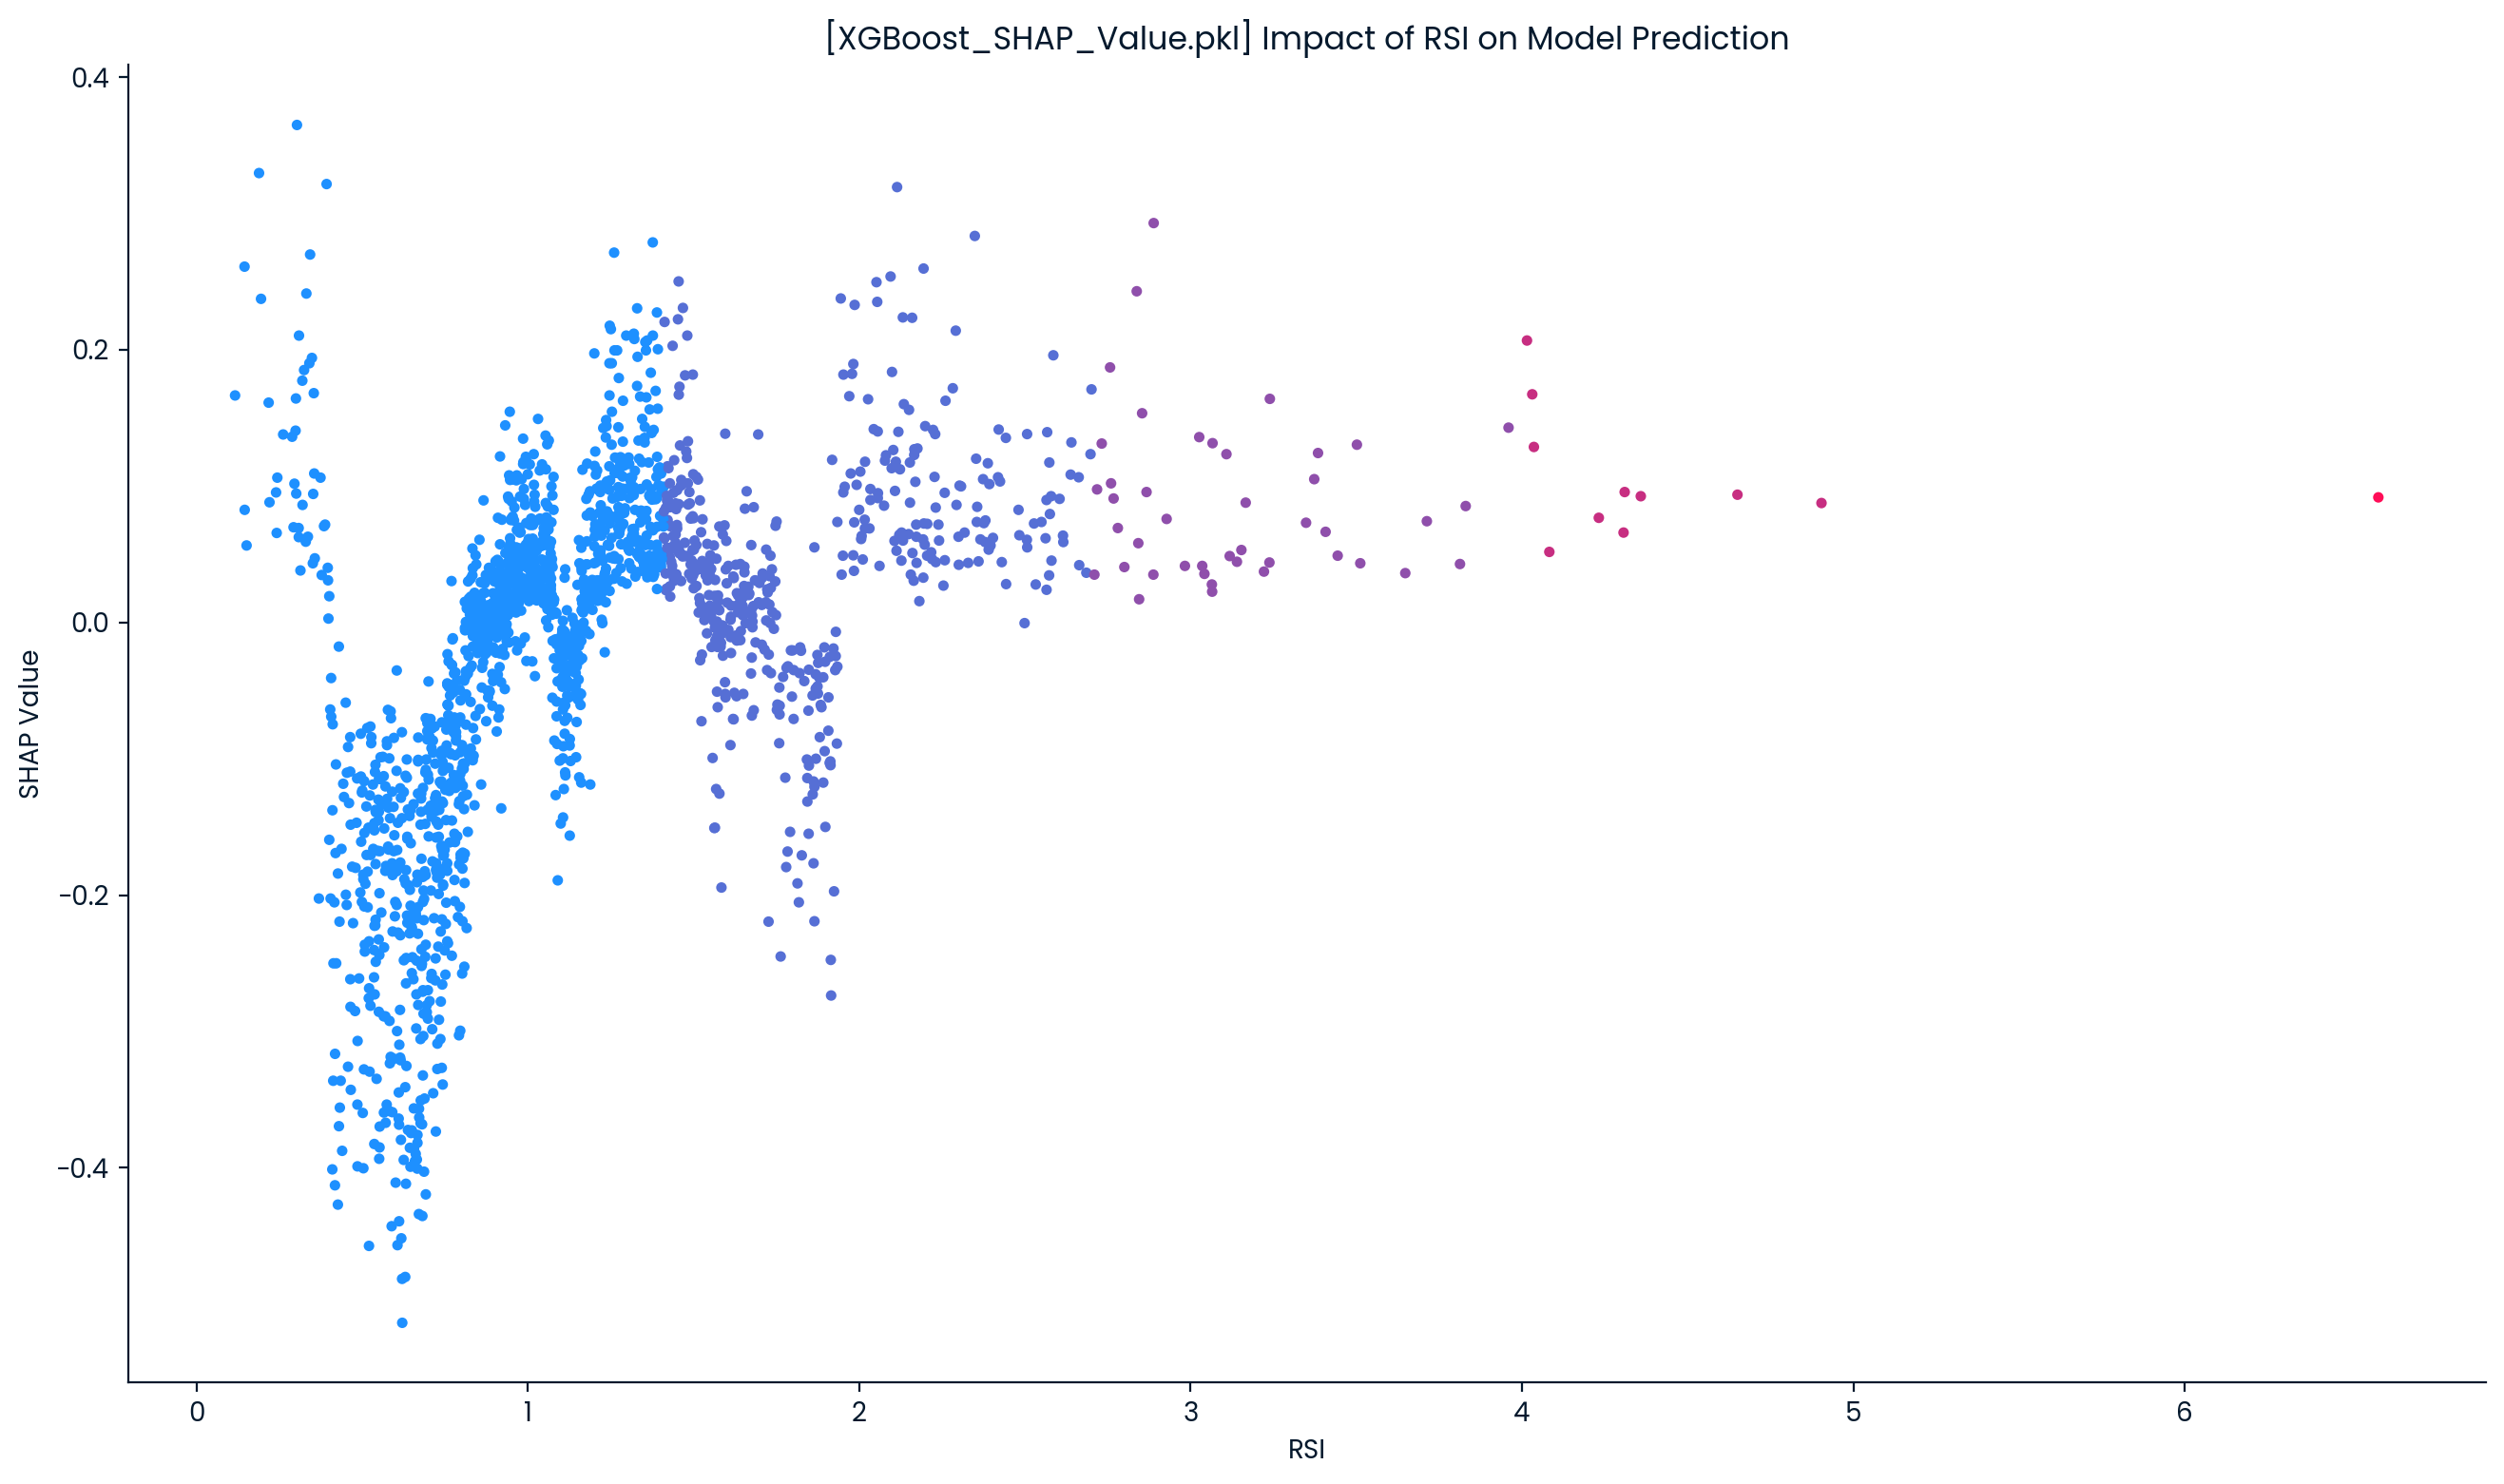

In [35]:
# XGB SHAP PLOTS

plot_shap_summary(2)
plot_shap_waterfall(2)
plot_shap_rsi_scatter(2)

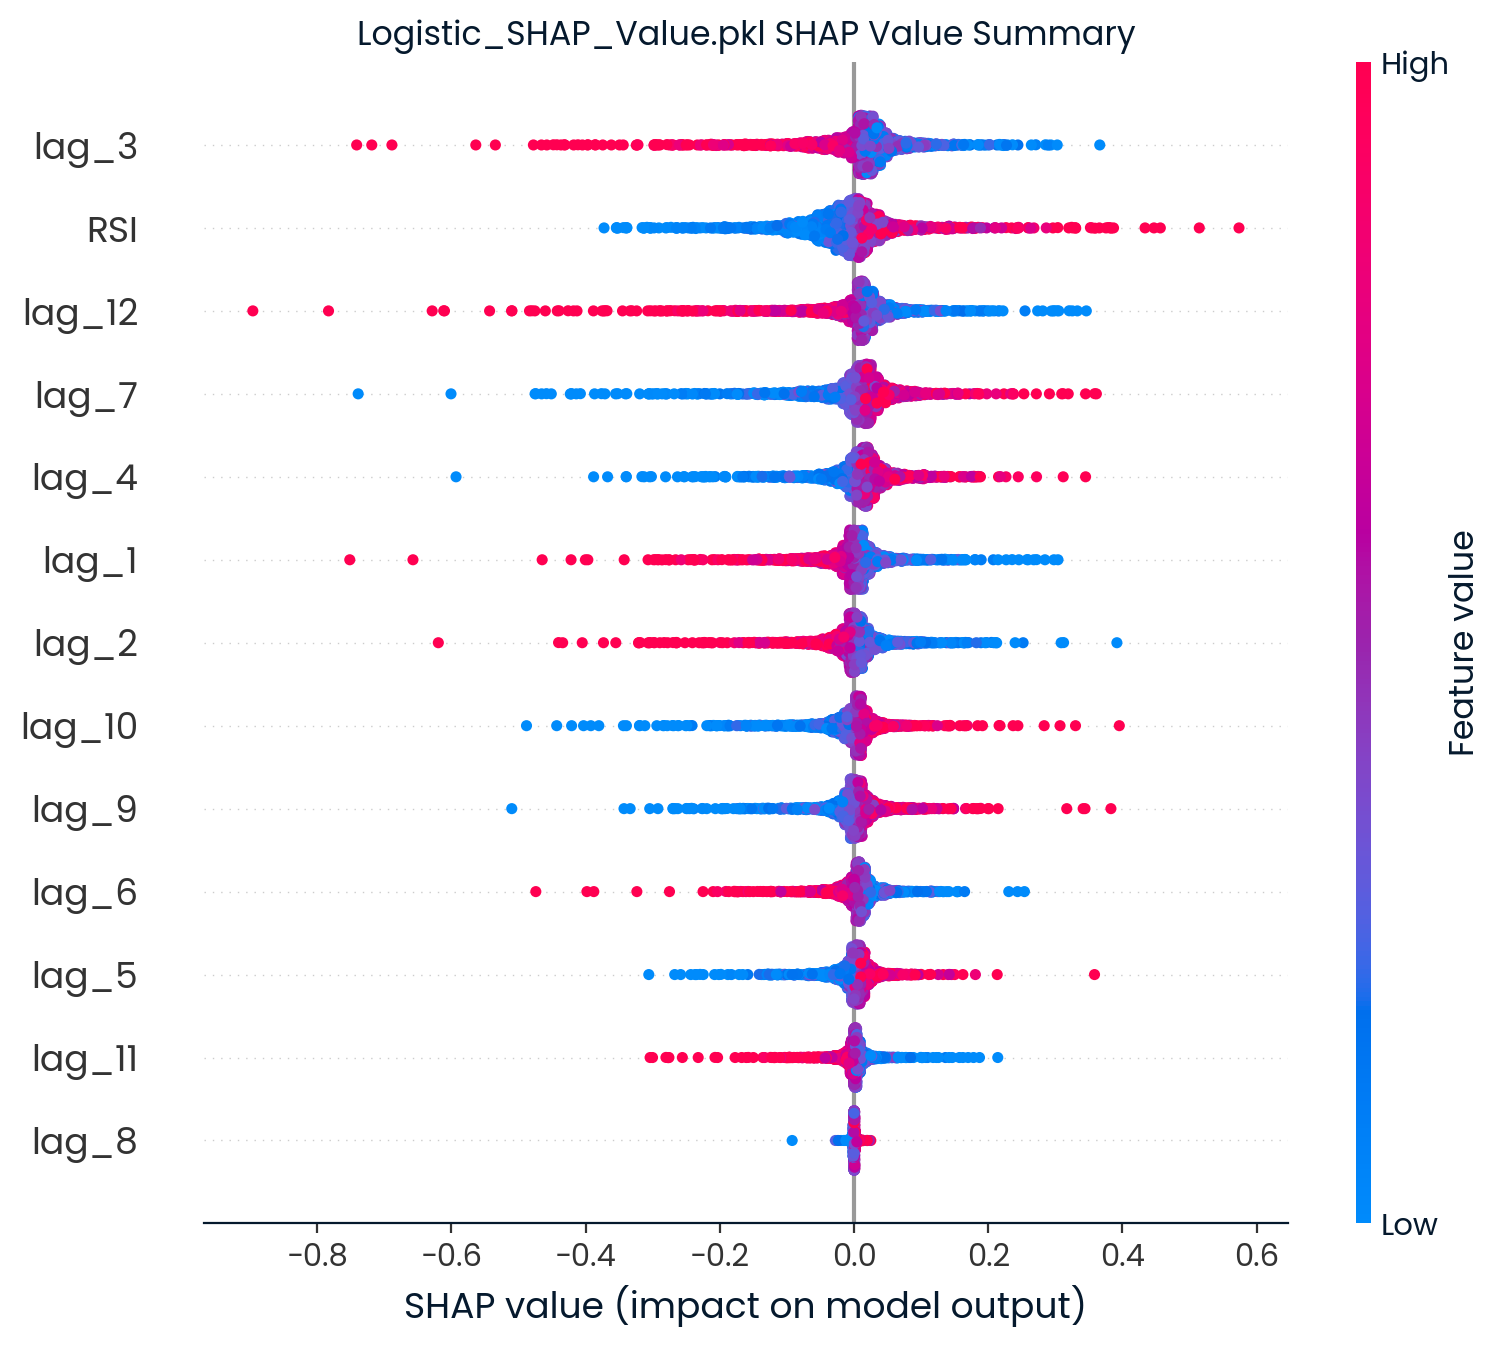

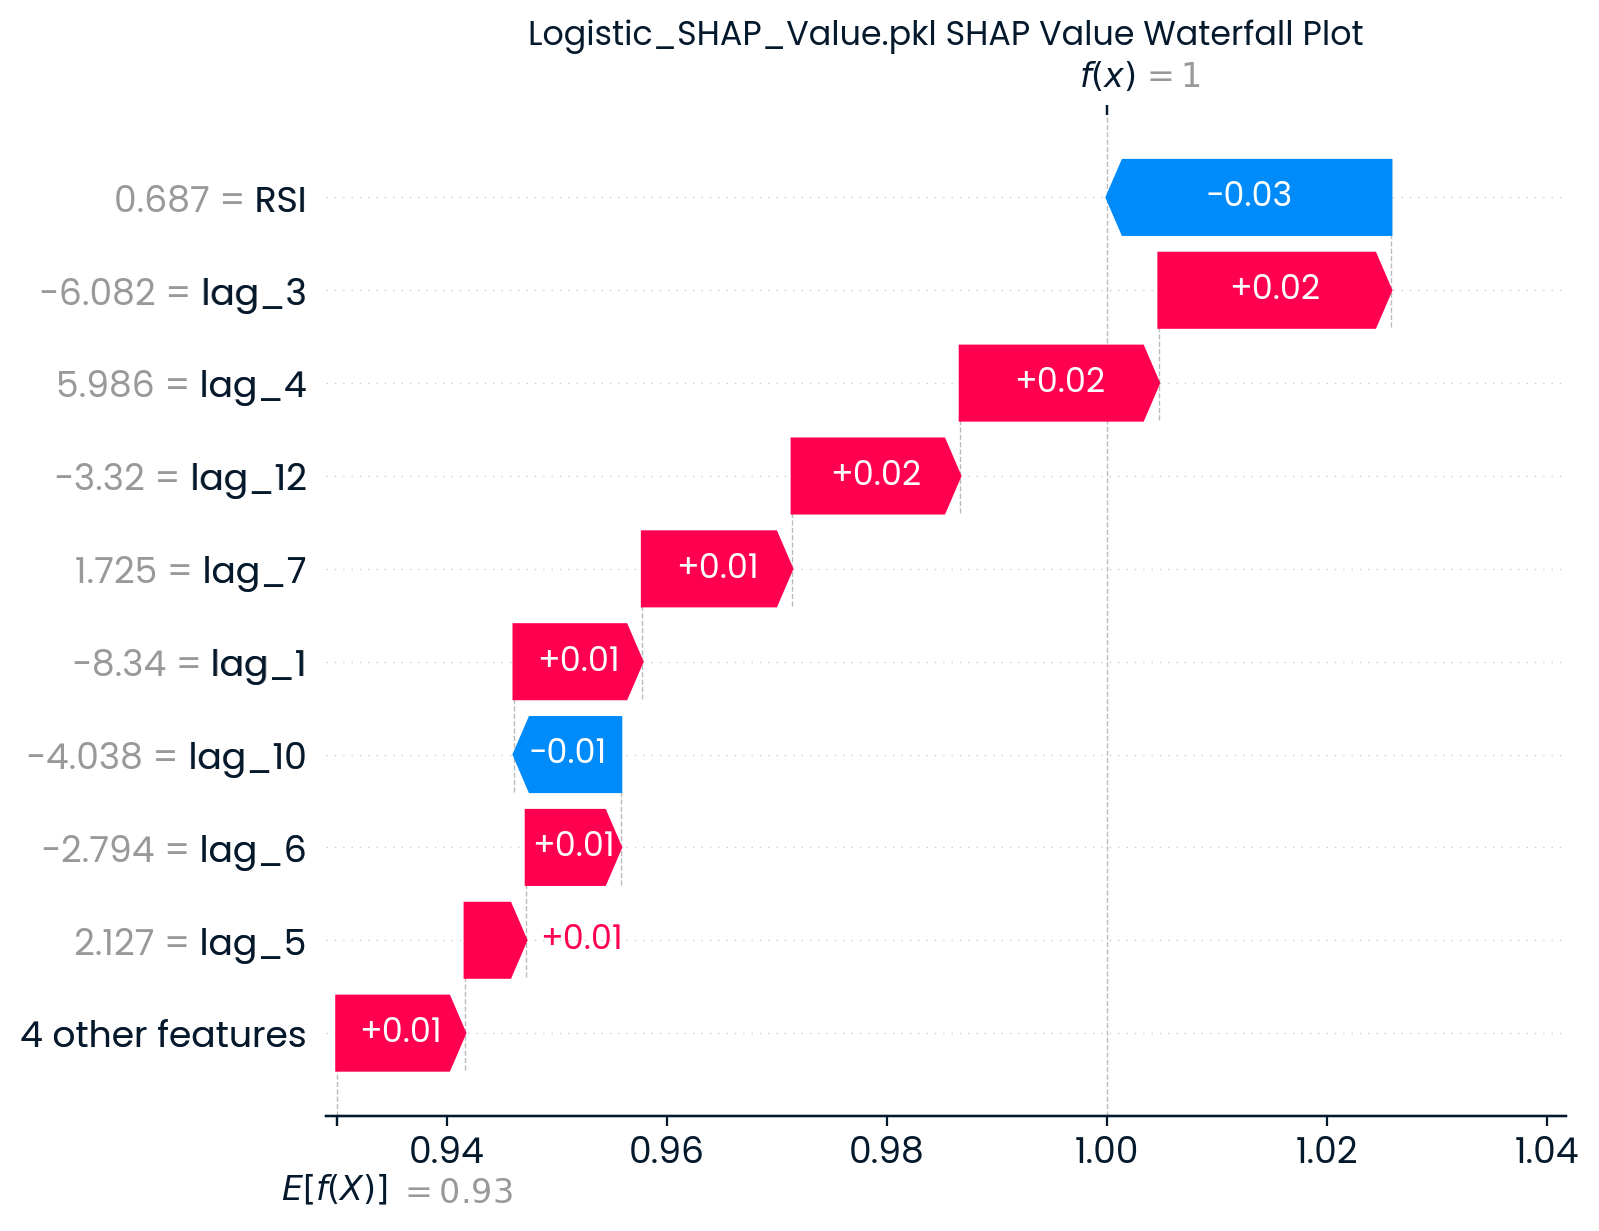

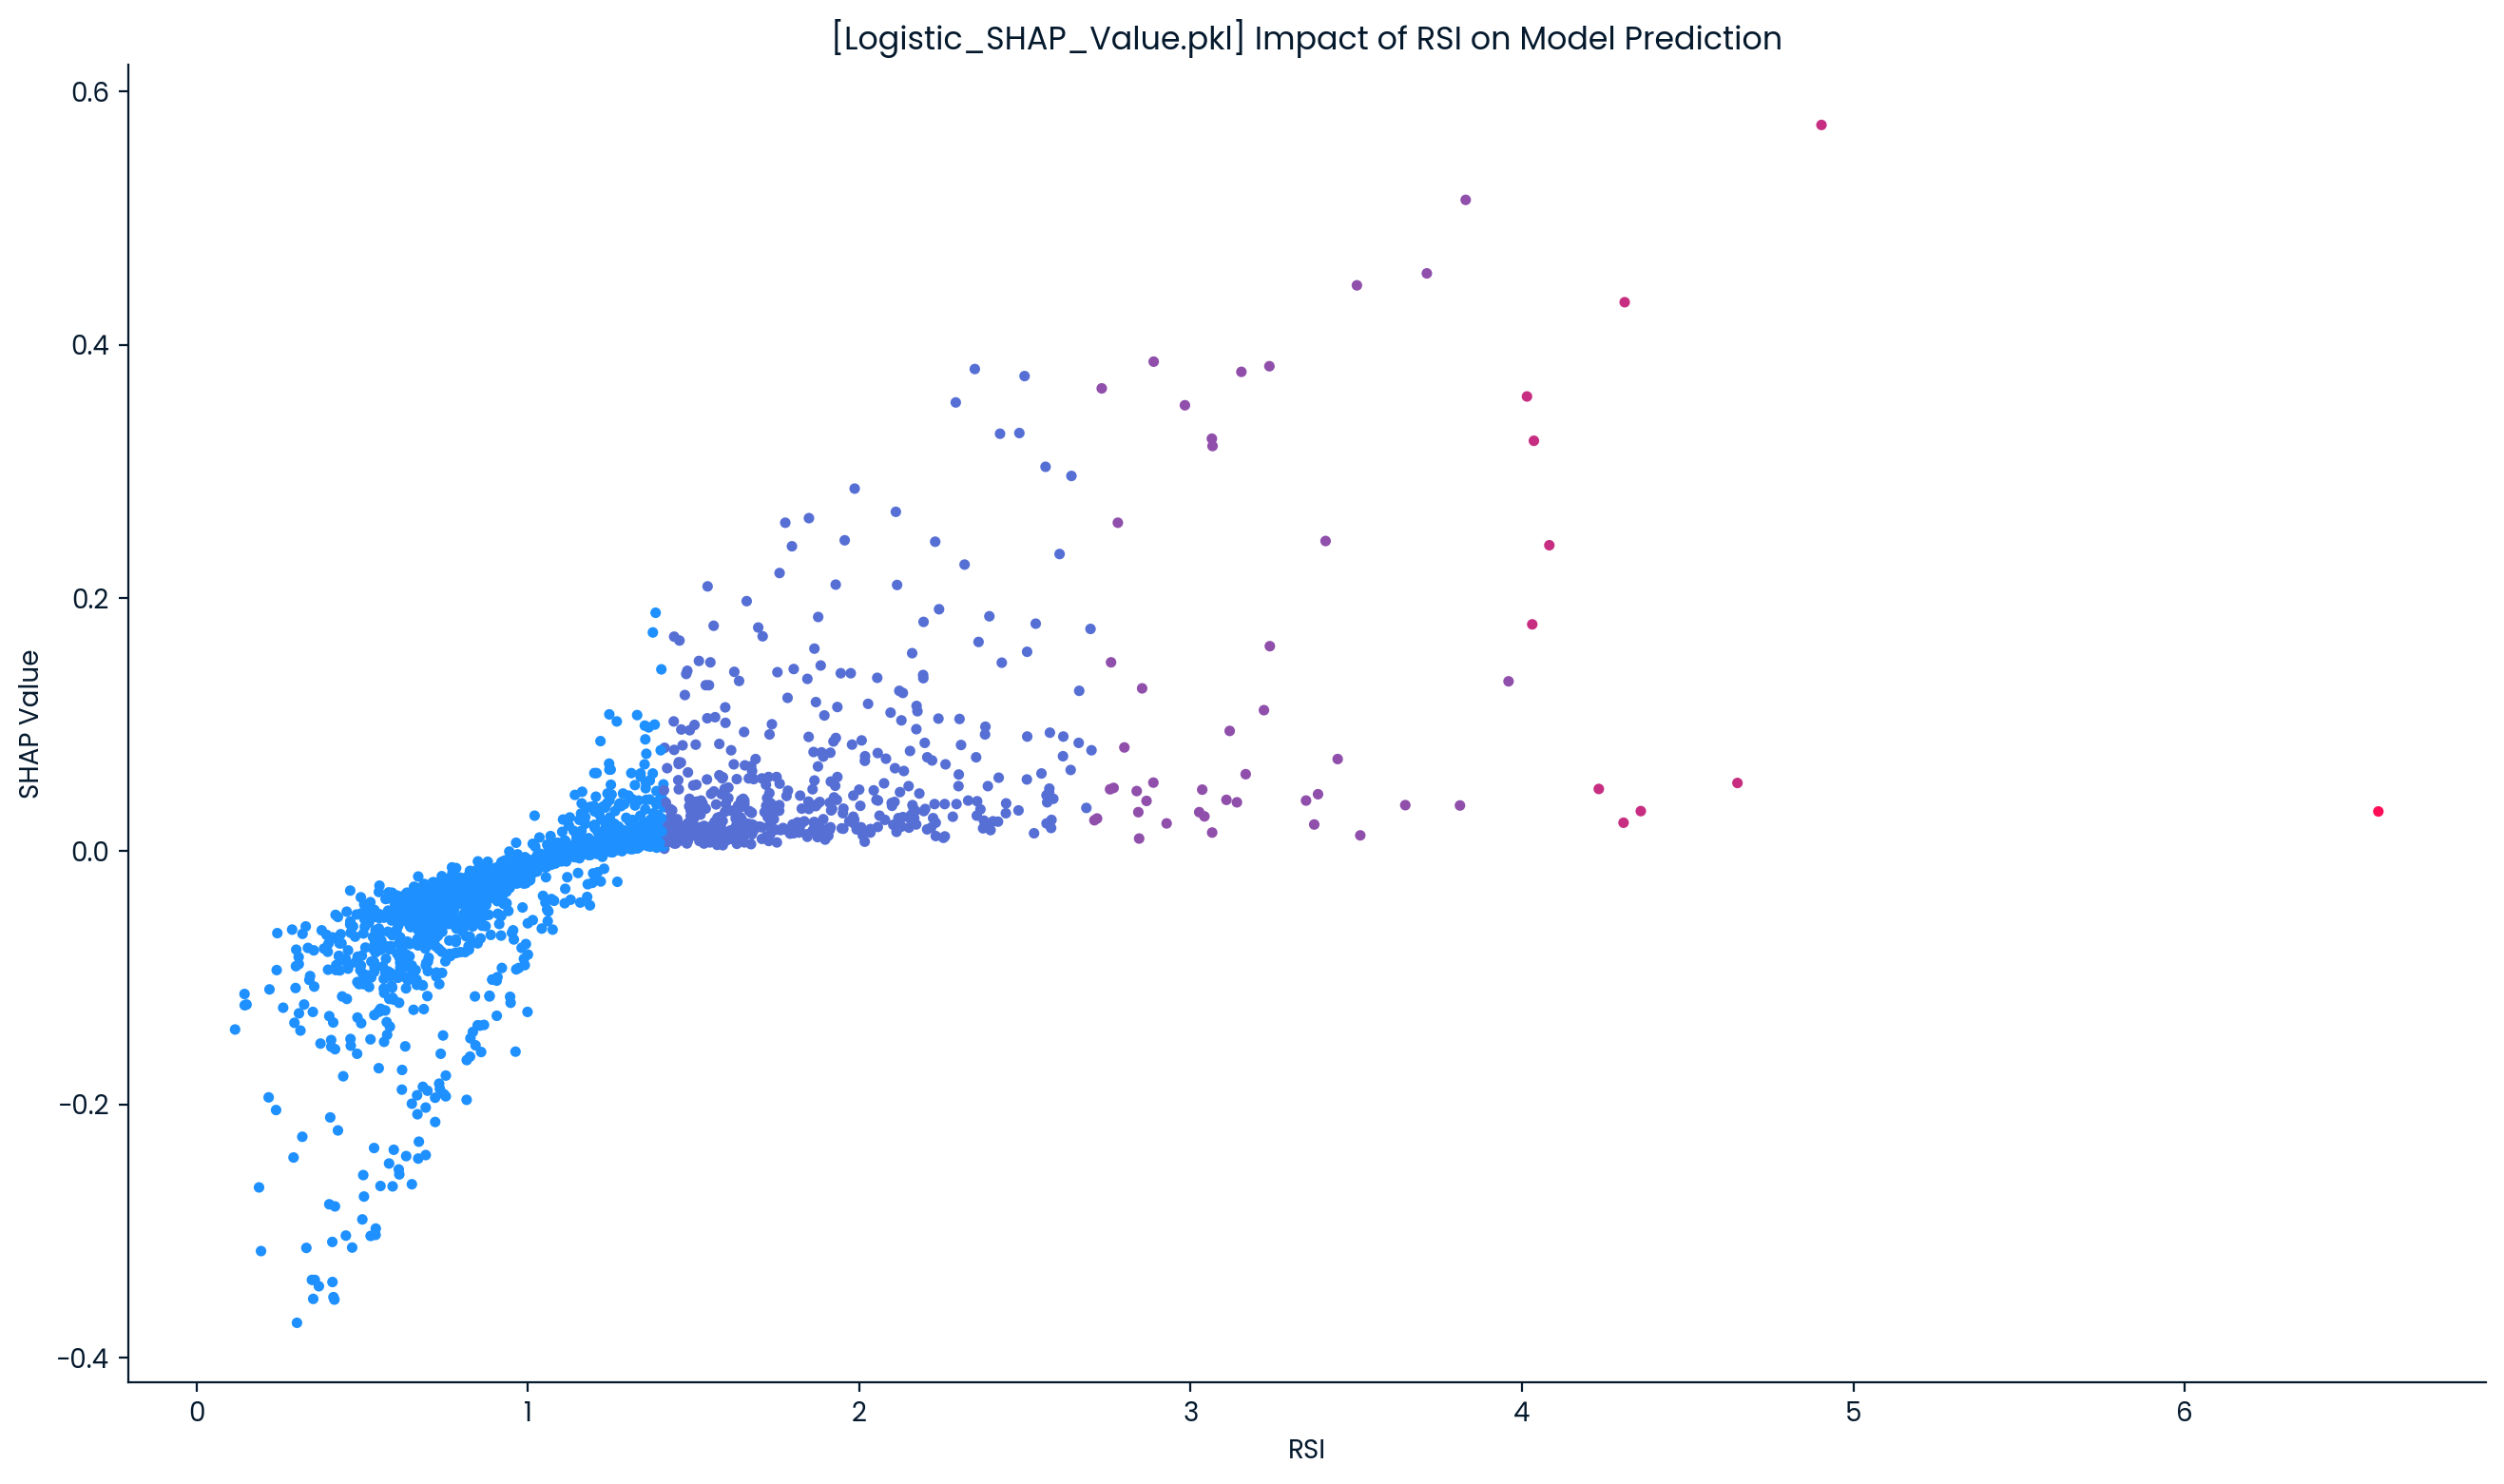

In [36]:
# LOGISTIC SHAP PLOTS

plot_shap_summary(3)
plot_shap_waterfall(3)
plot_shap_rsi_scatter(3)

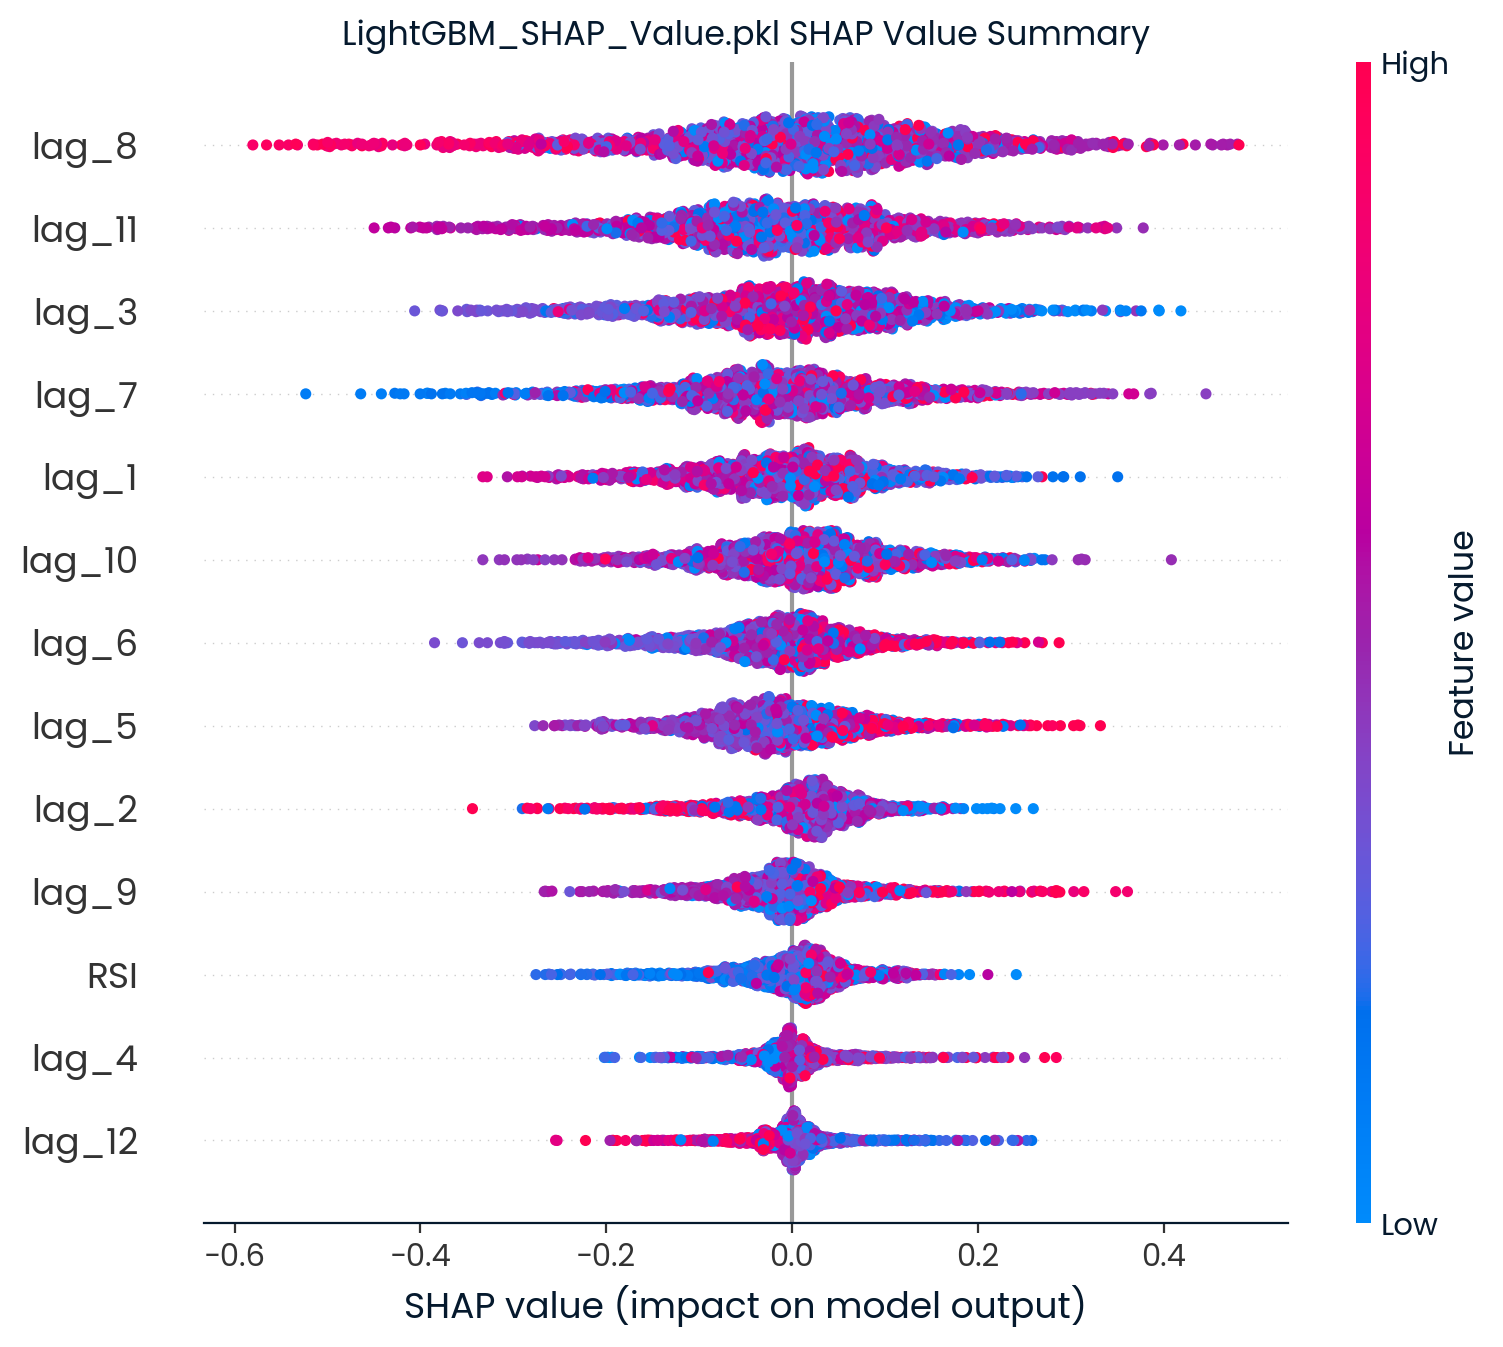

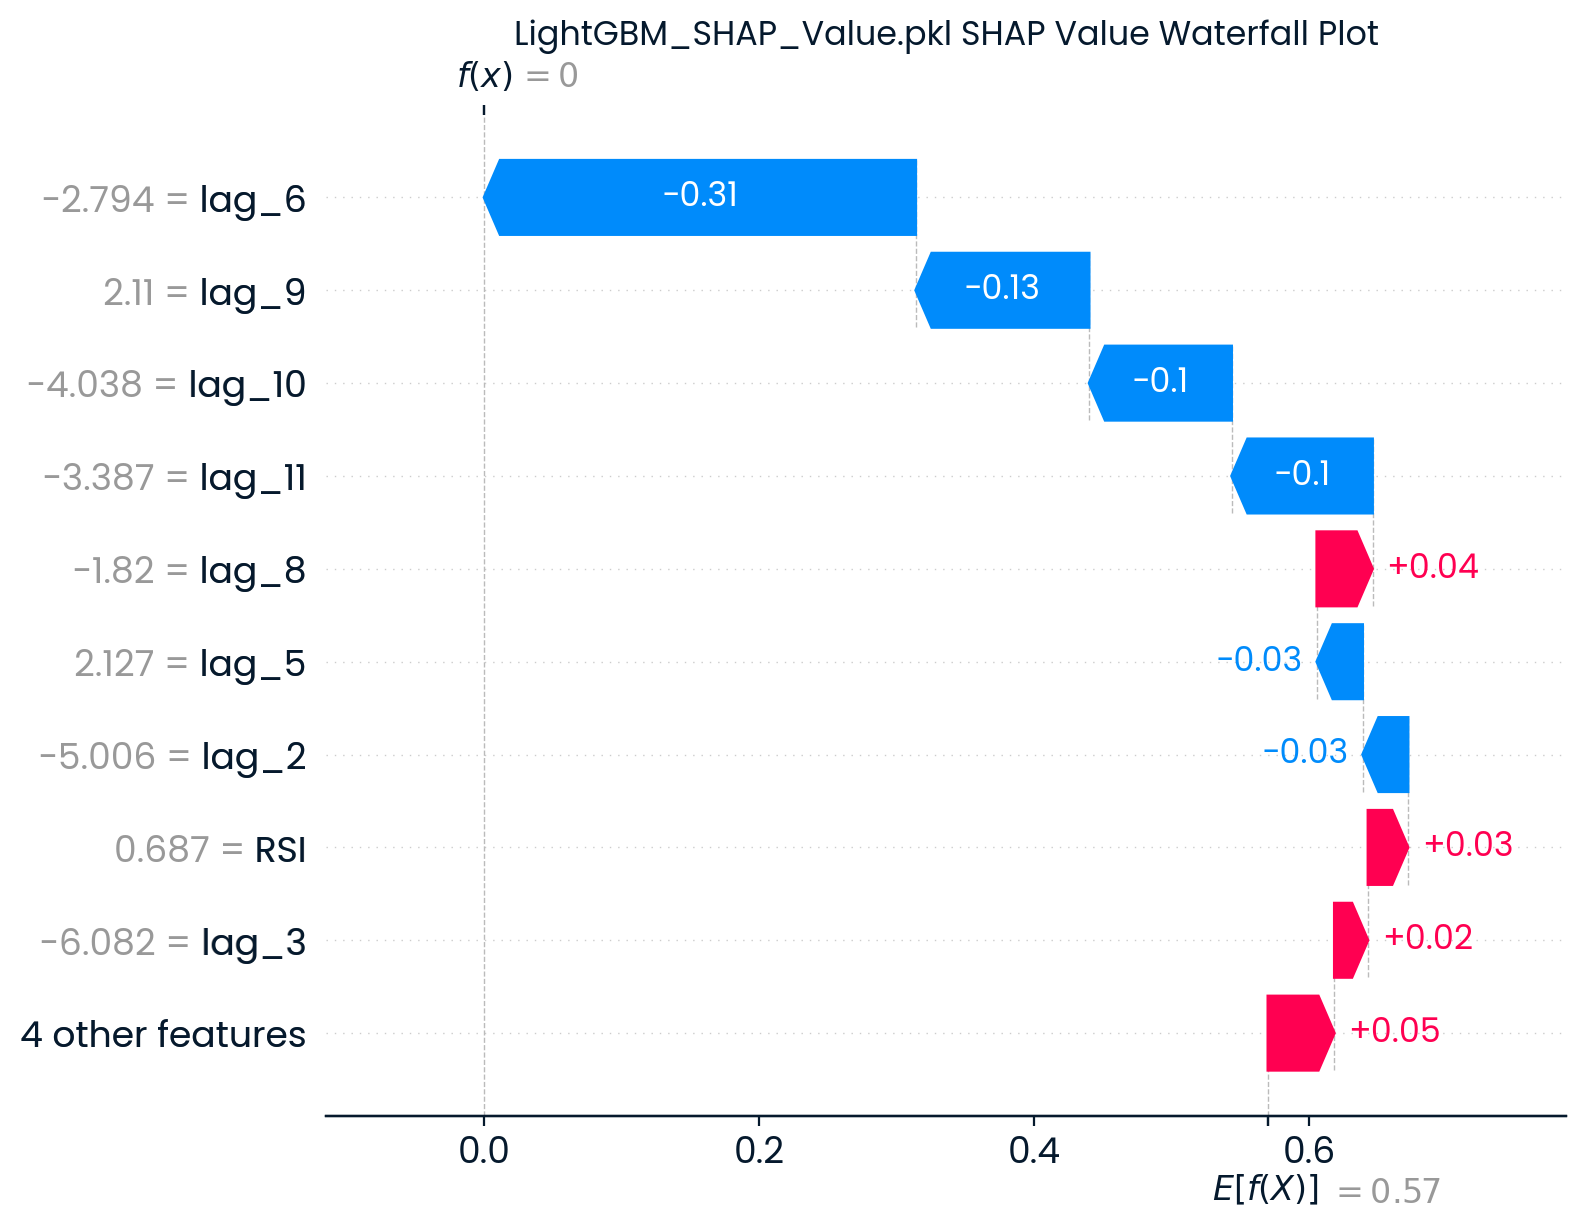

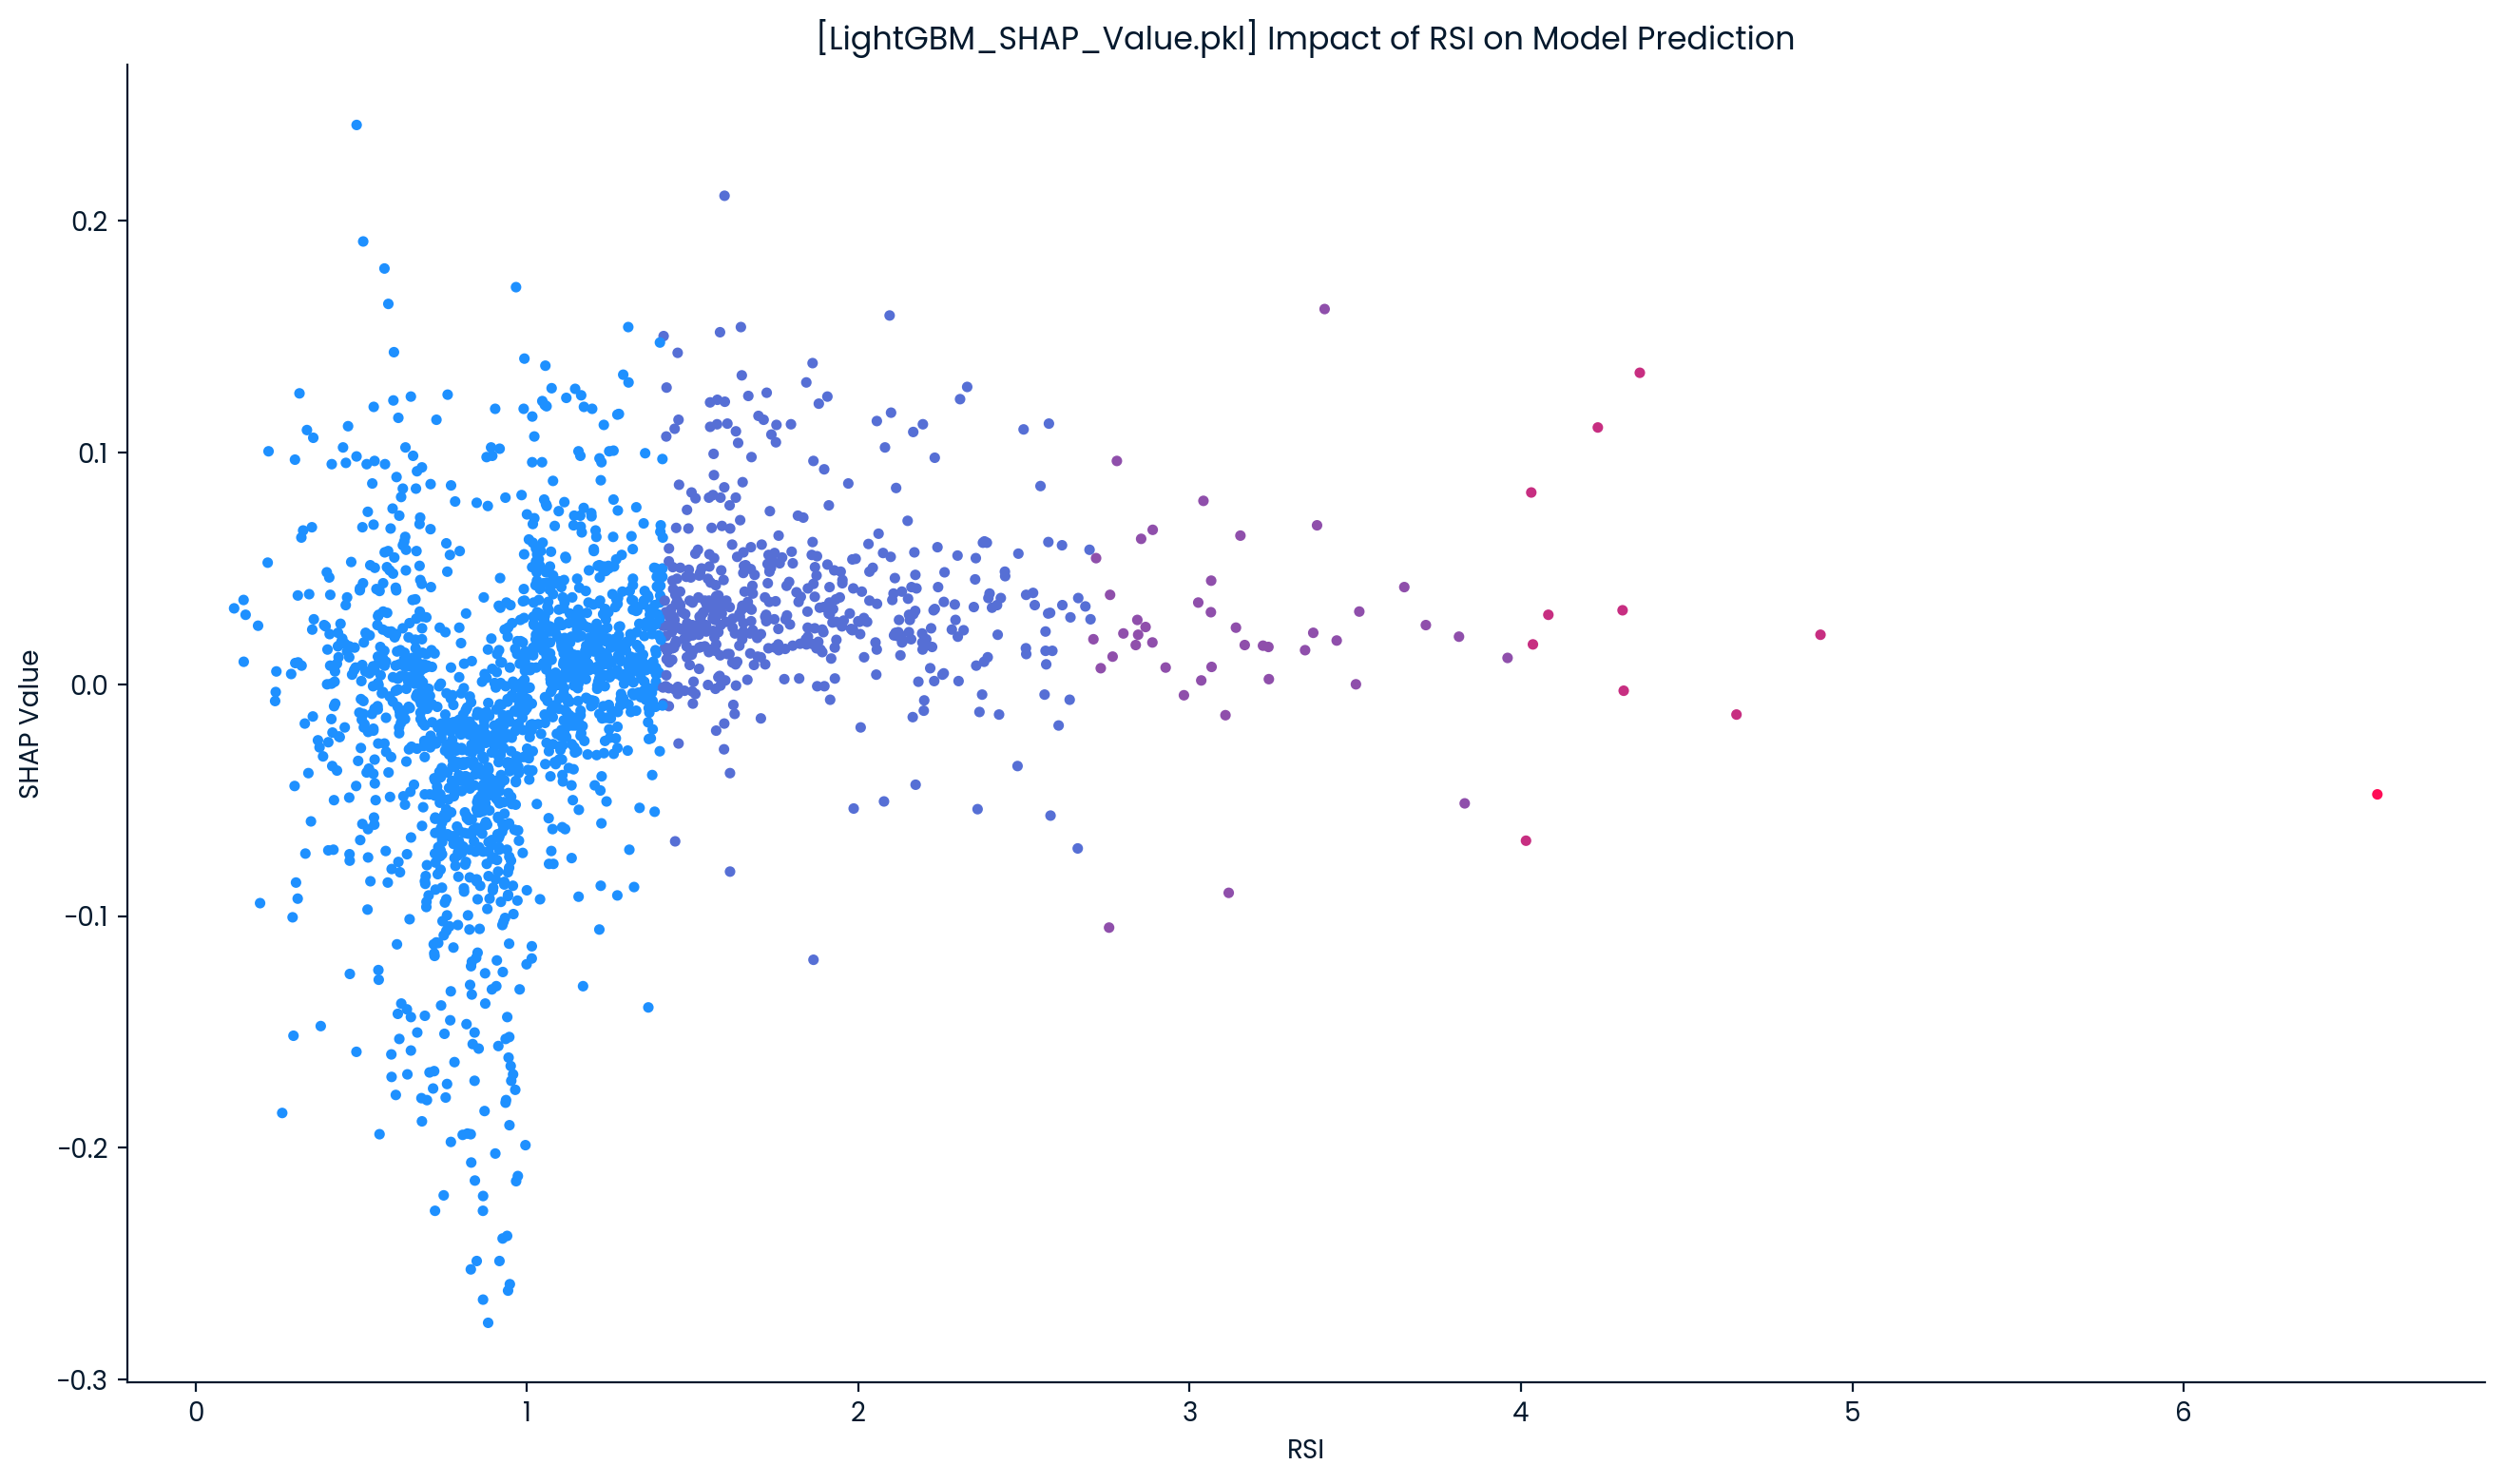

In [37]:
# LGBM SHAP PLOTS

plot_shap_summary(4)
plot_shap_waterfall(4)
plot_shap_rsi_scatter(4)

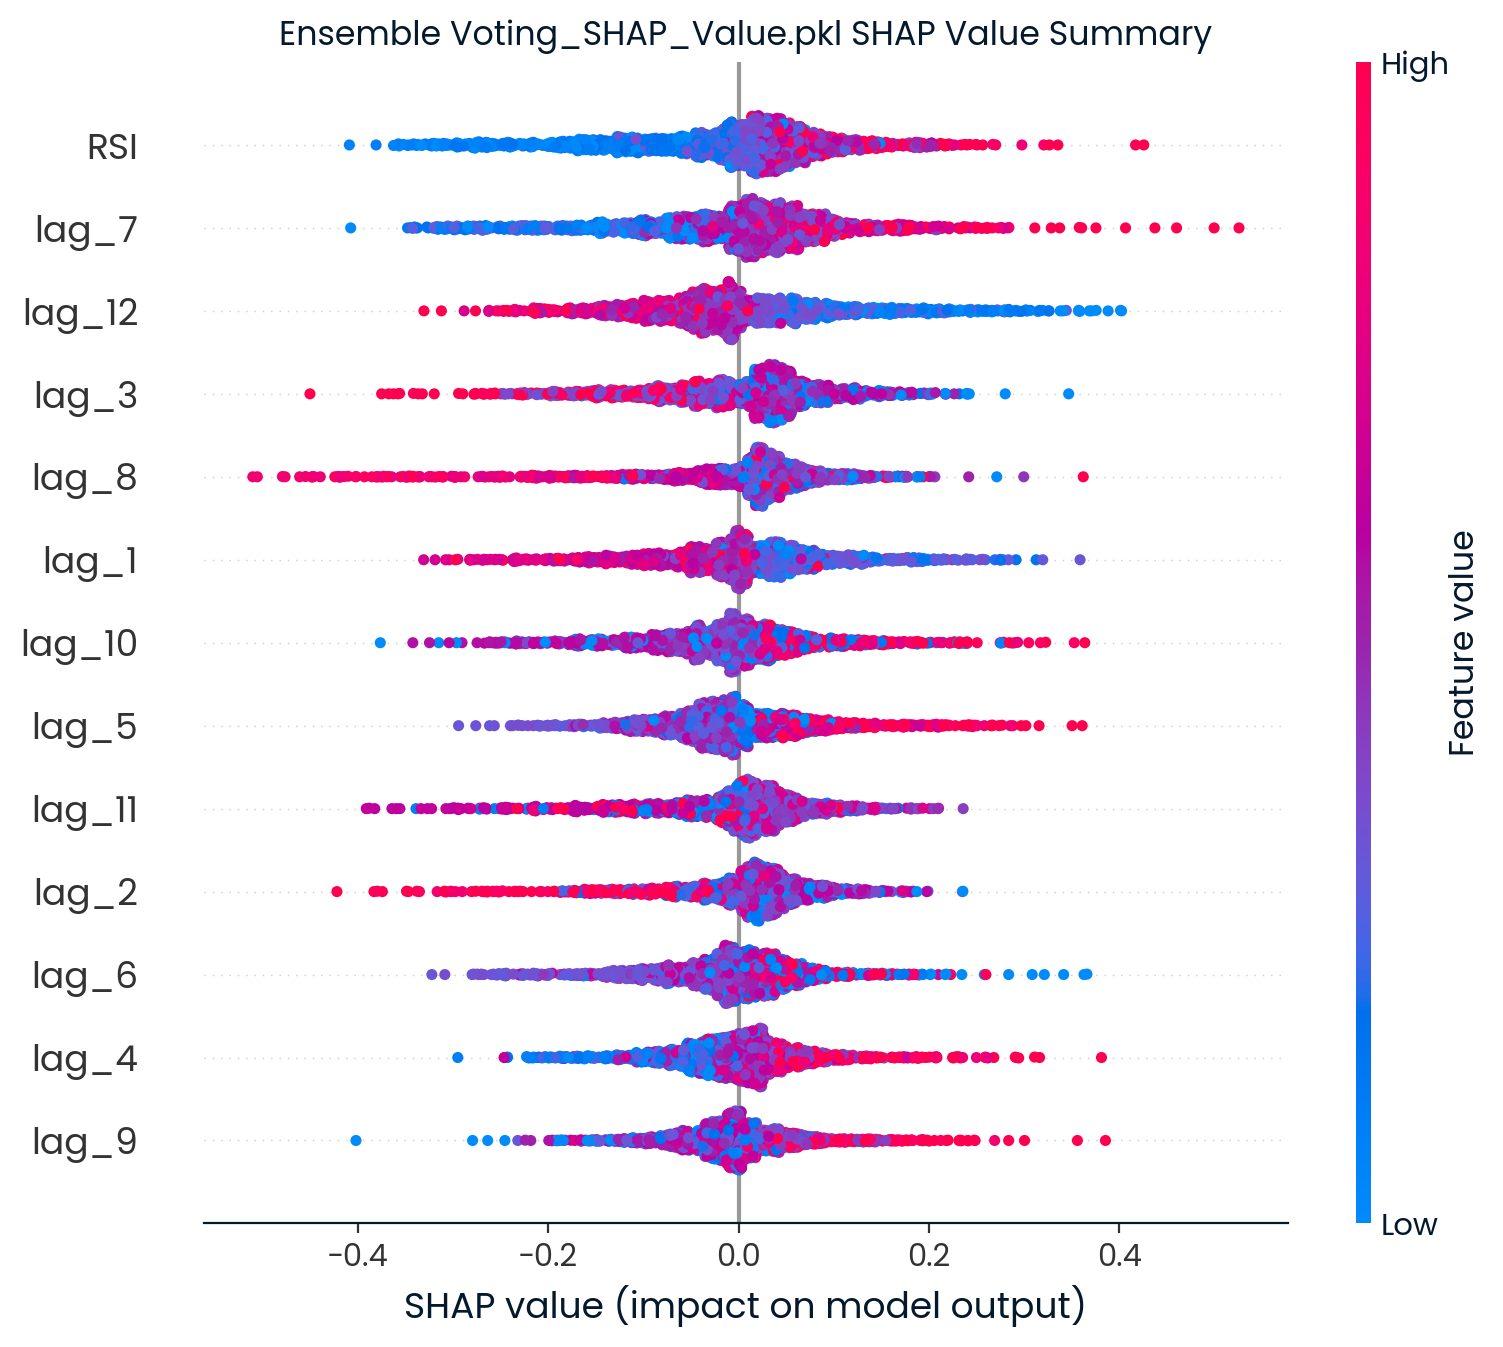

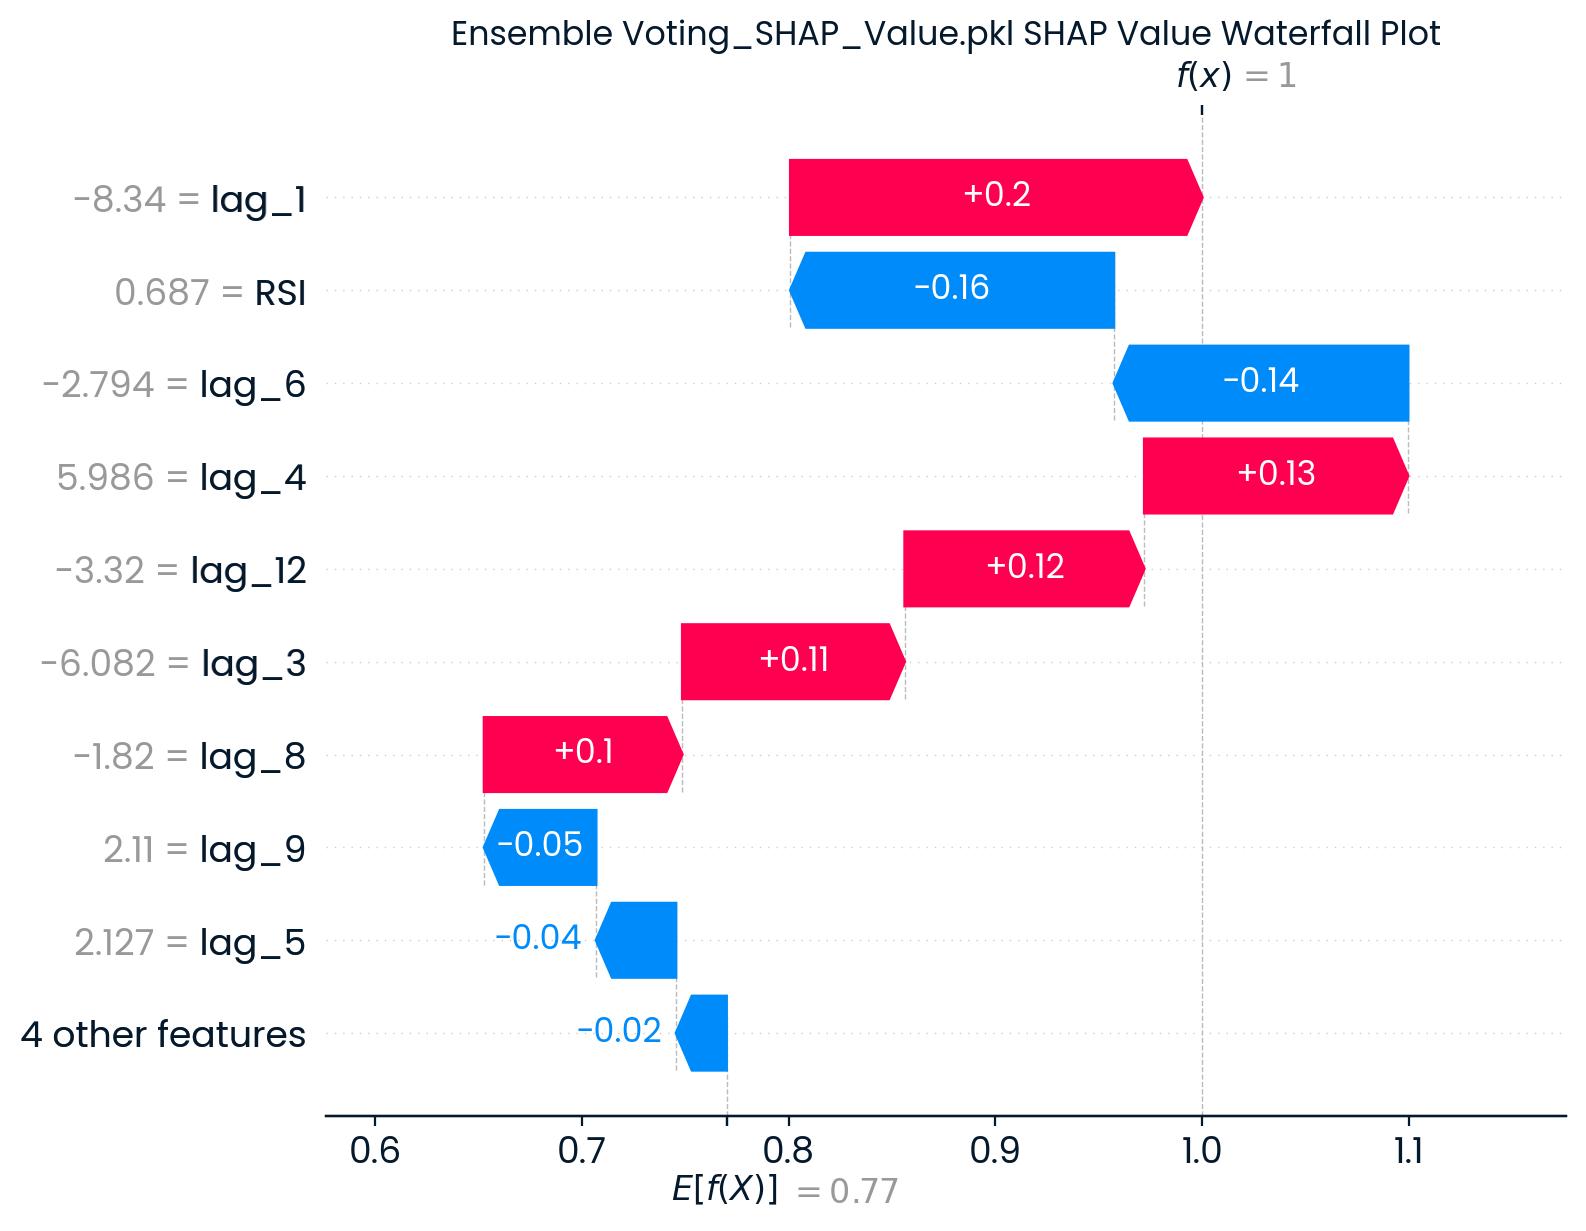

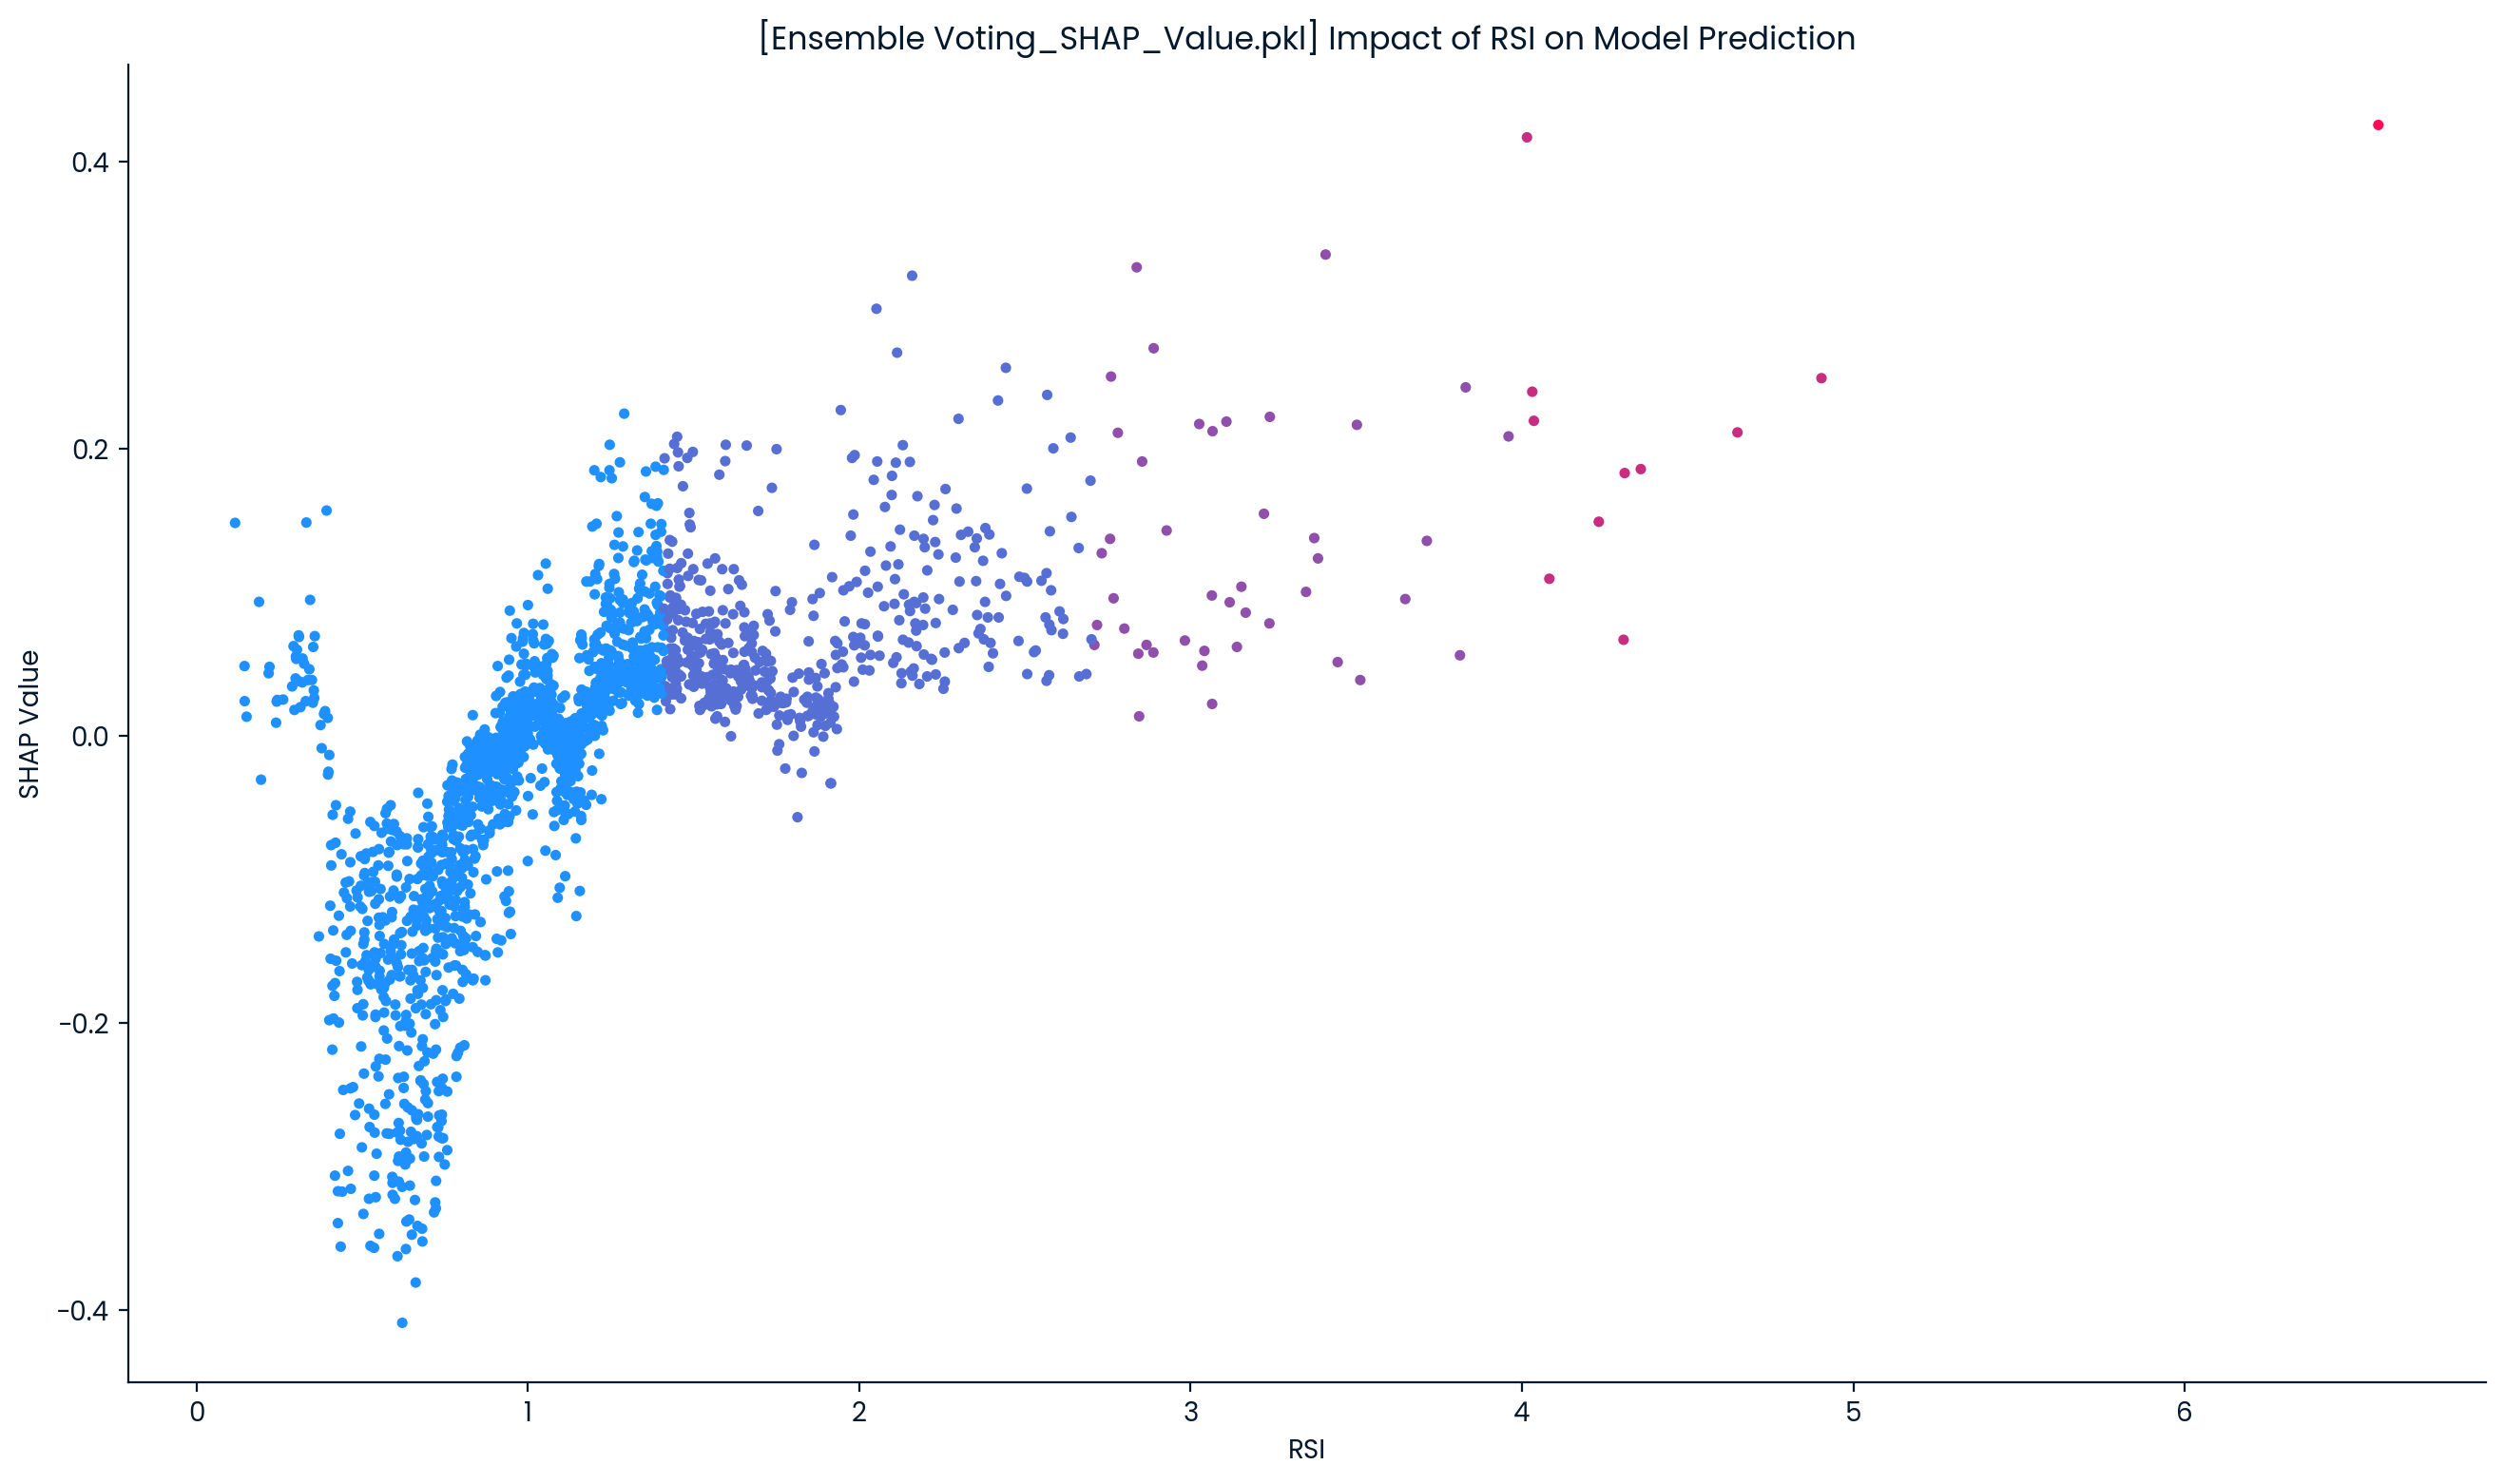

In [38]:
# E-VOTING SHAP PLOTS

plot_shap_summary(5)
plot_shap_waterfall(5)
plot_shap_rsi_scatter(5)

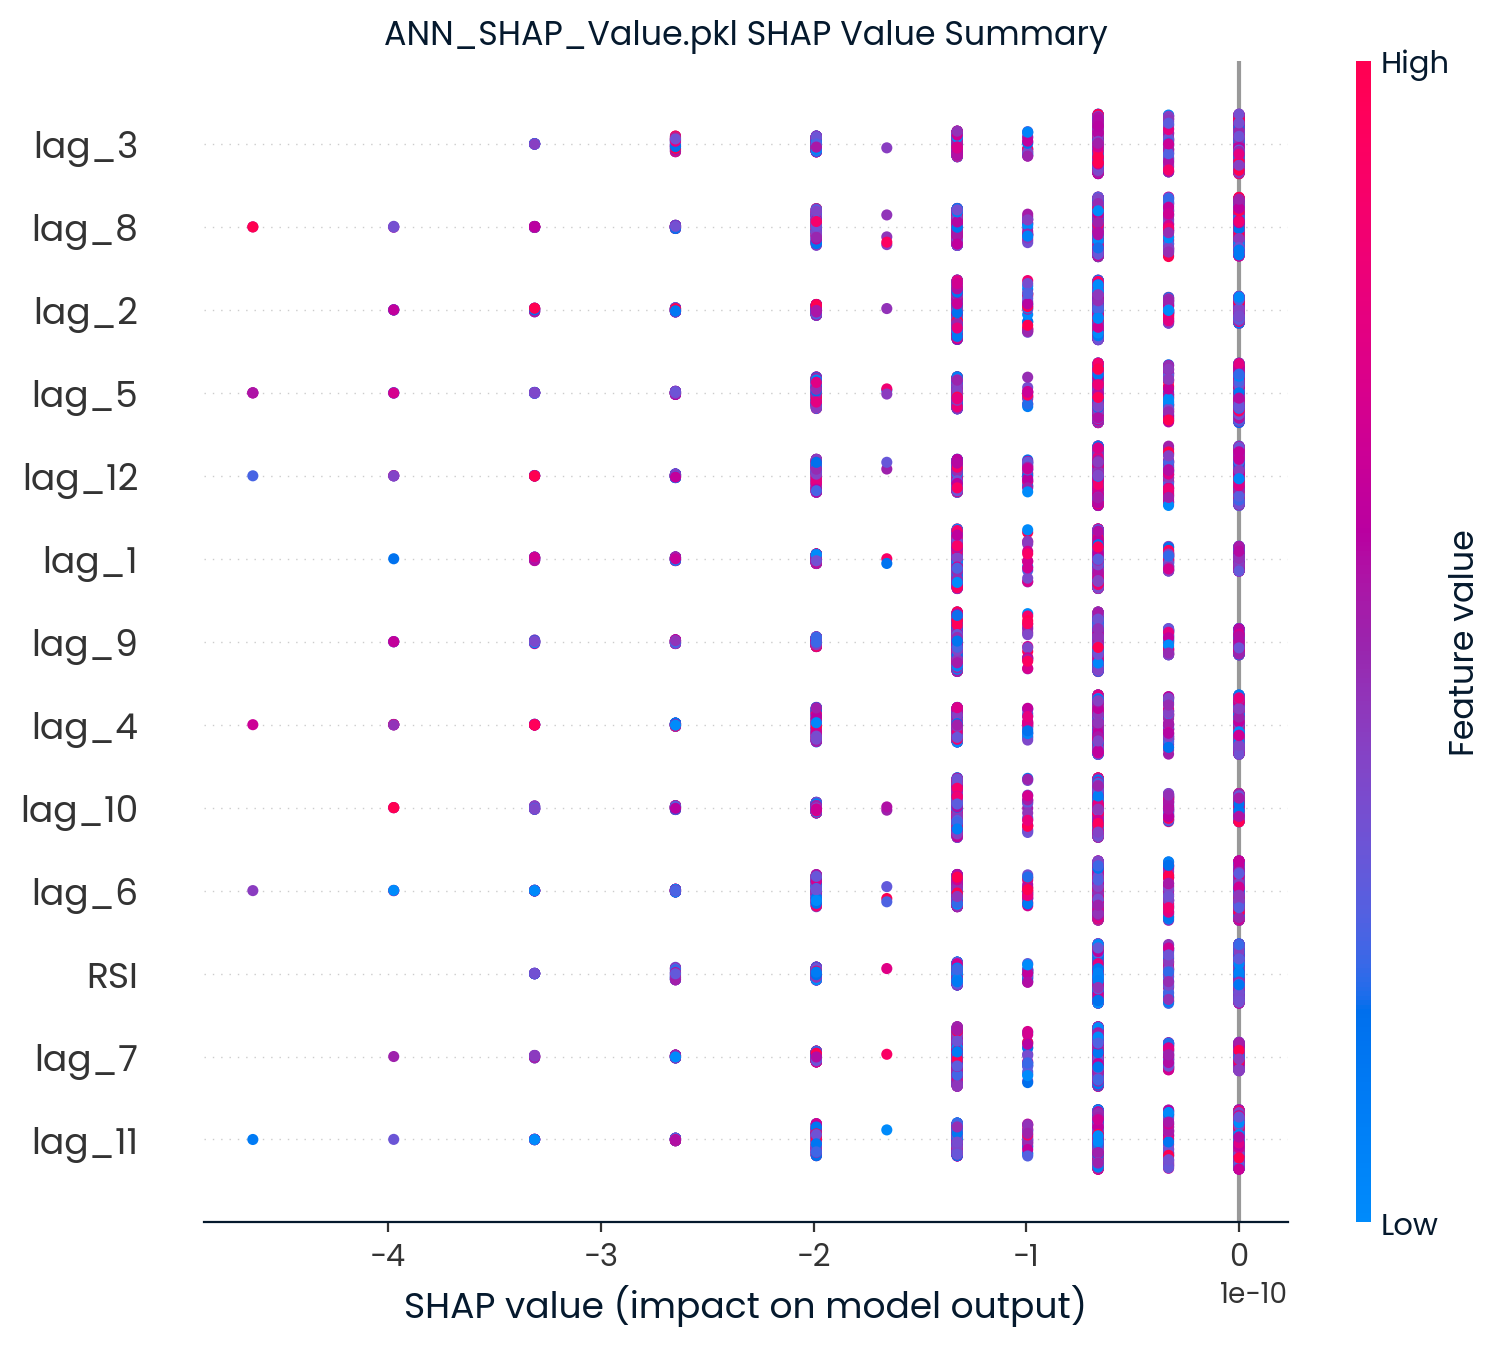

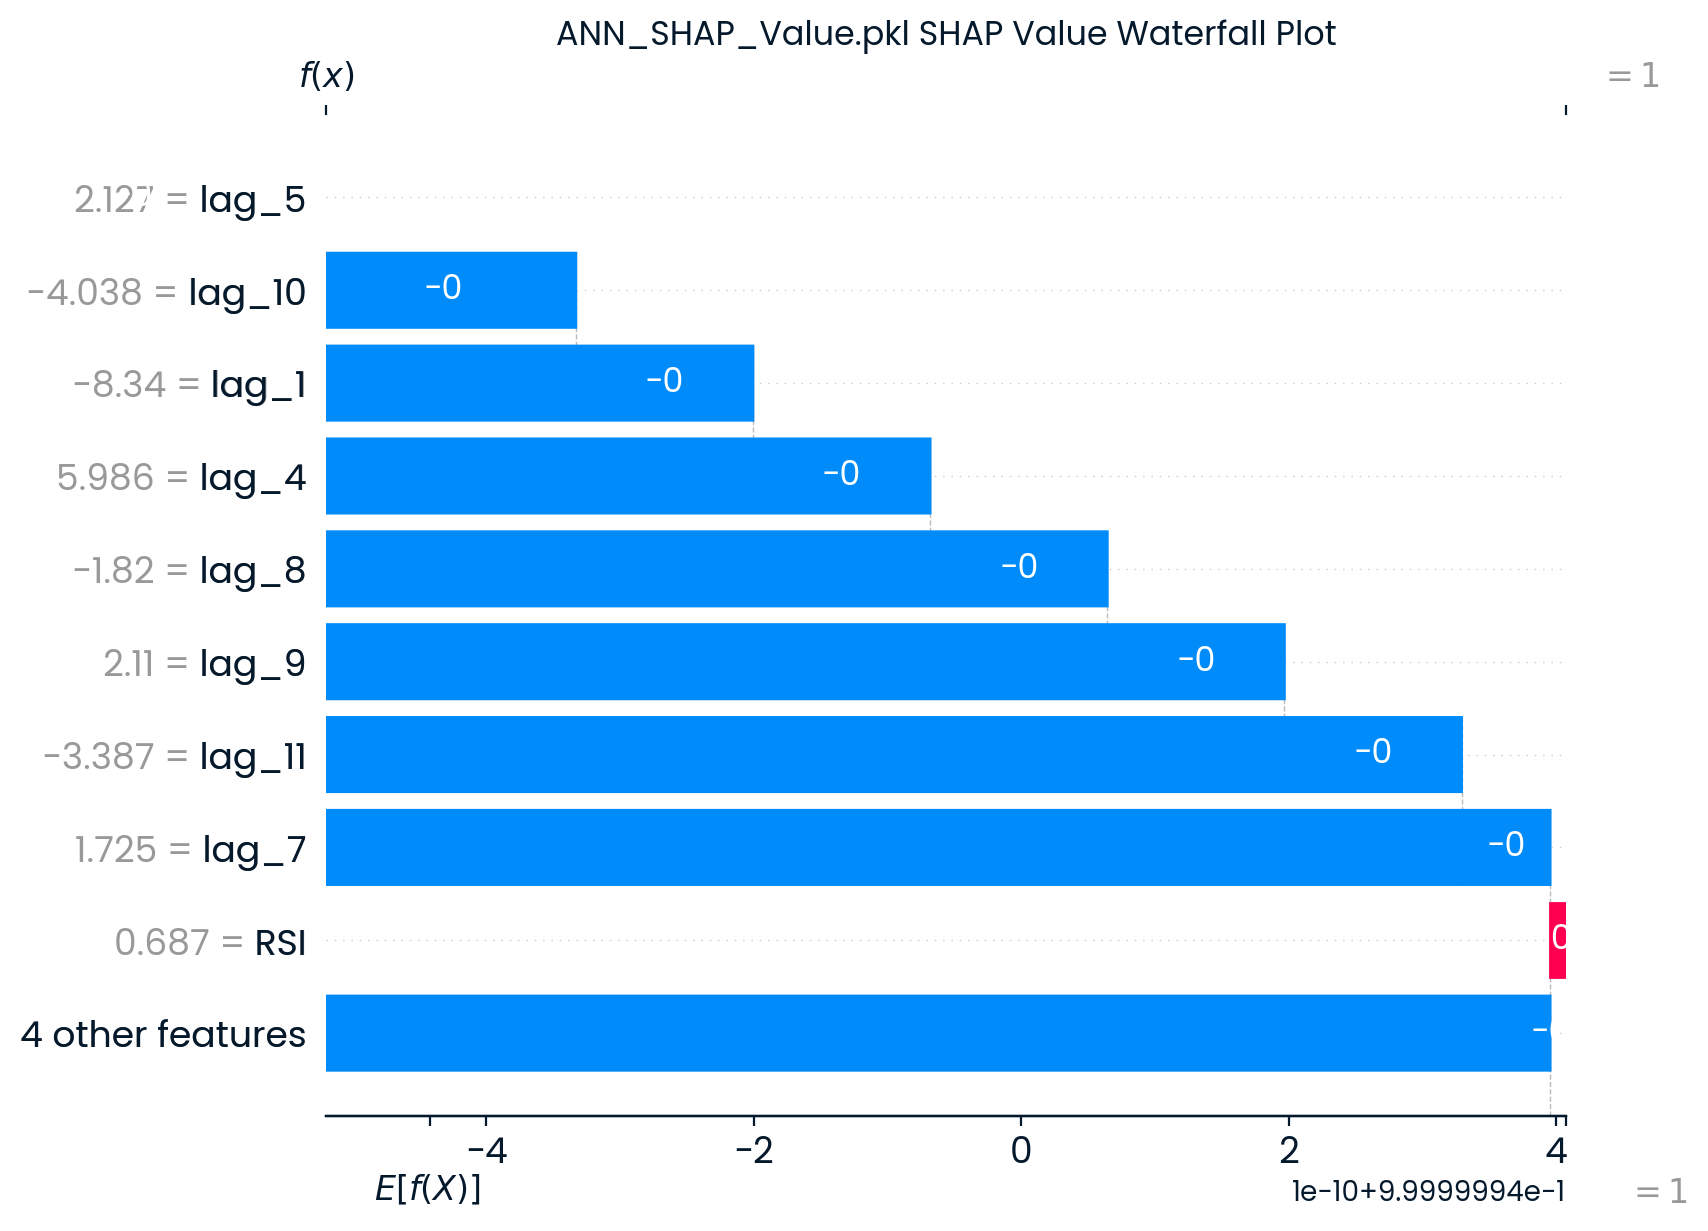

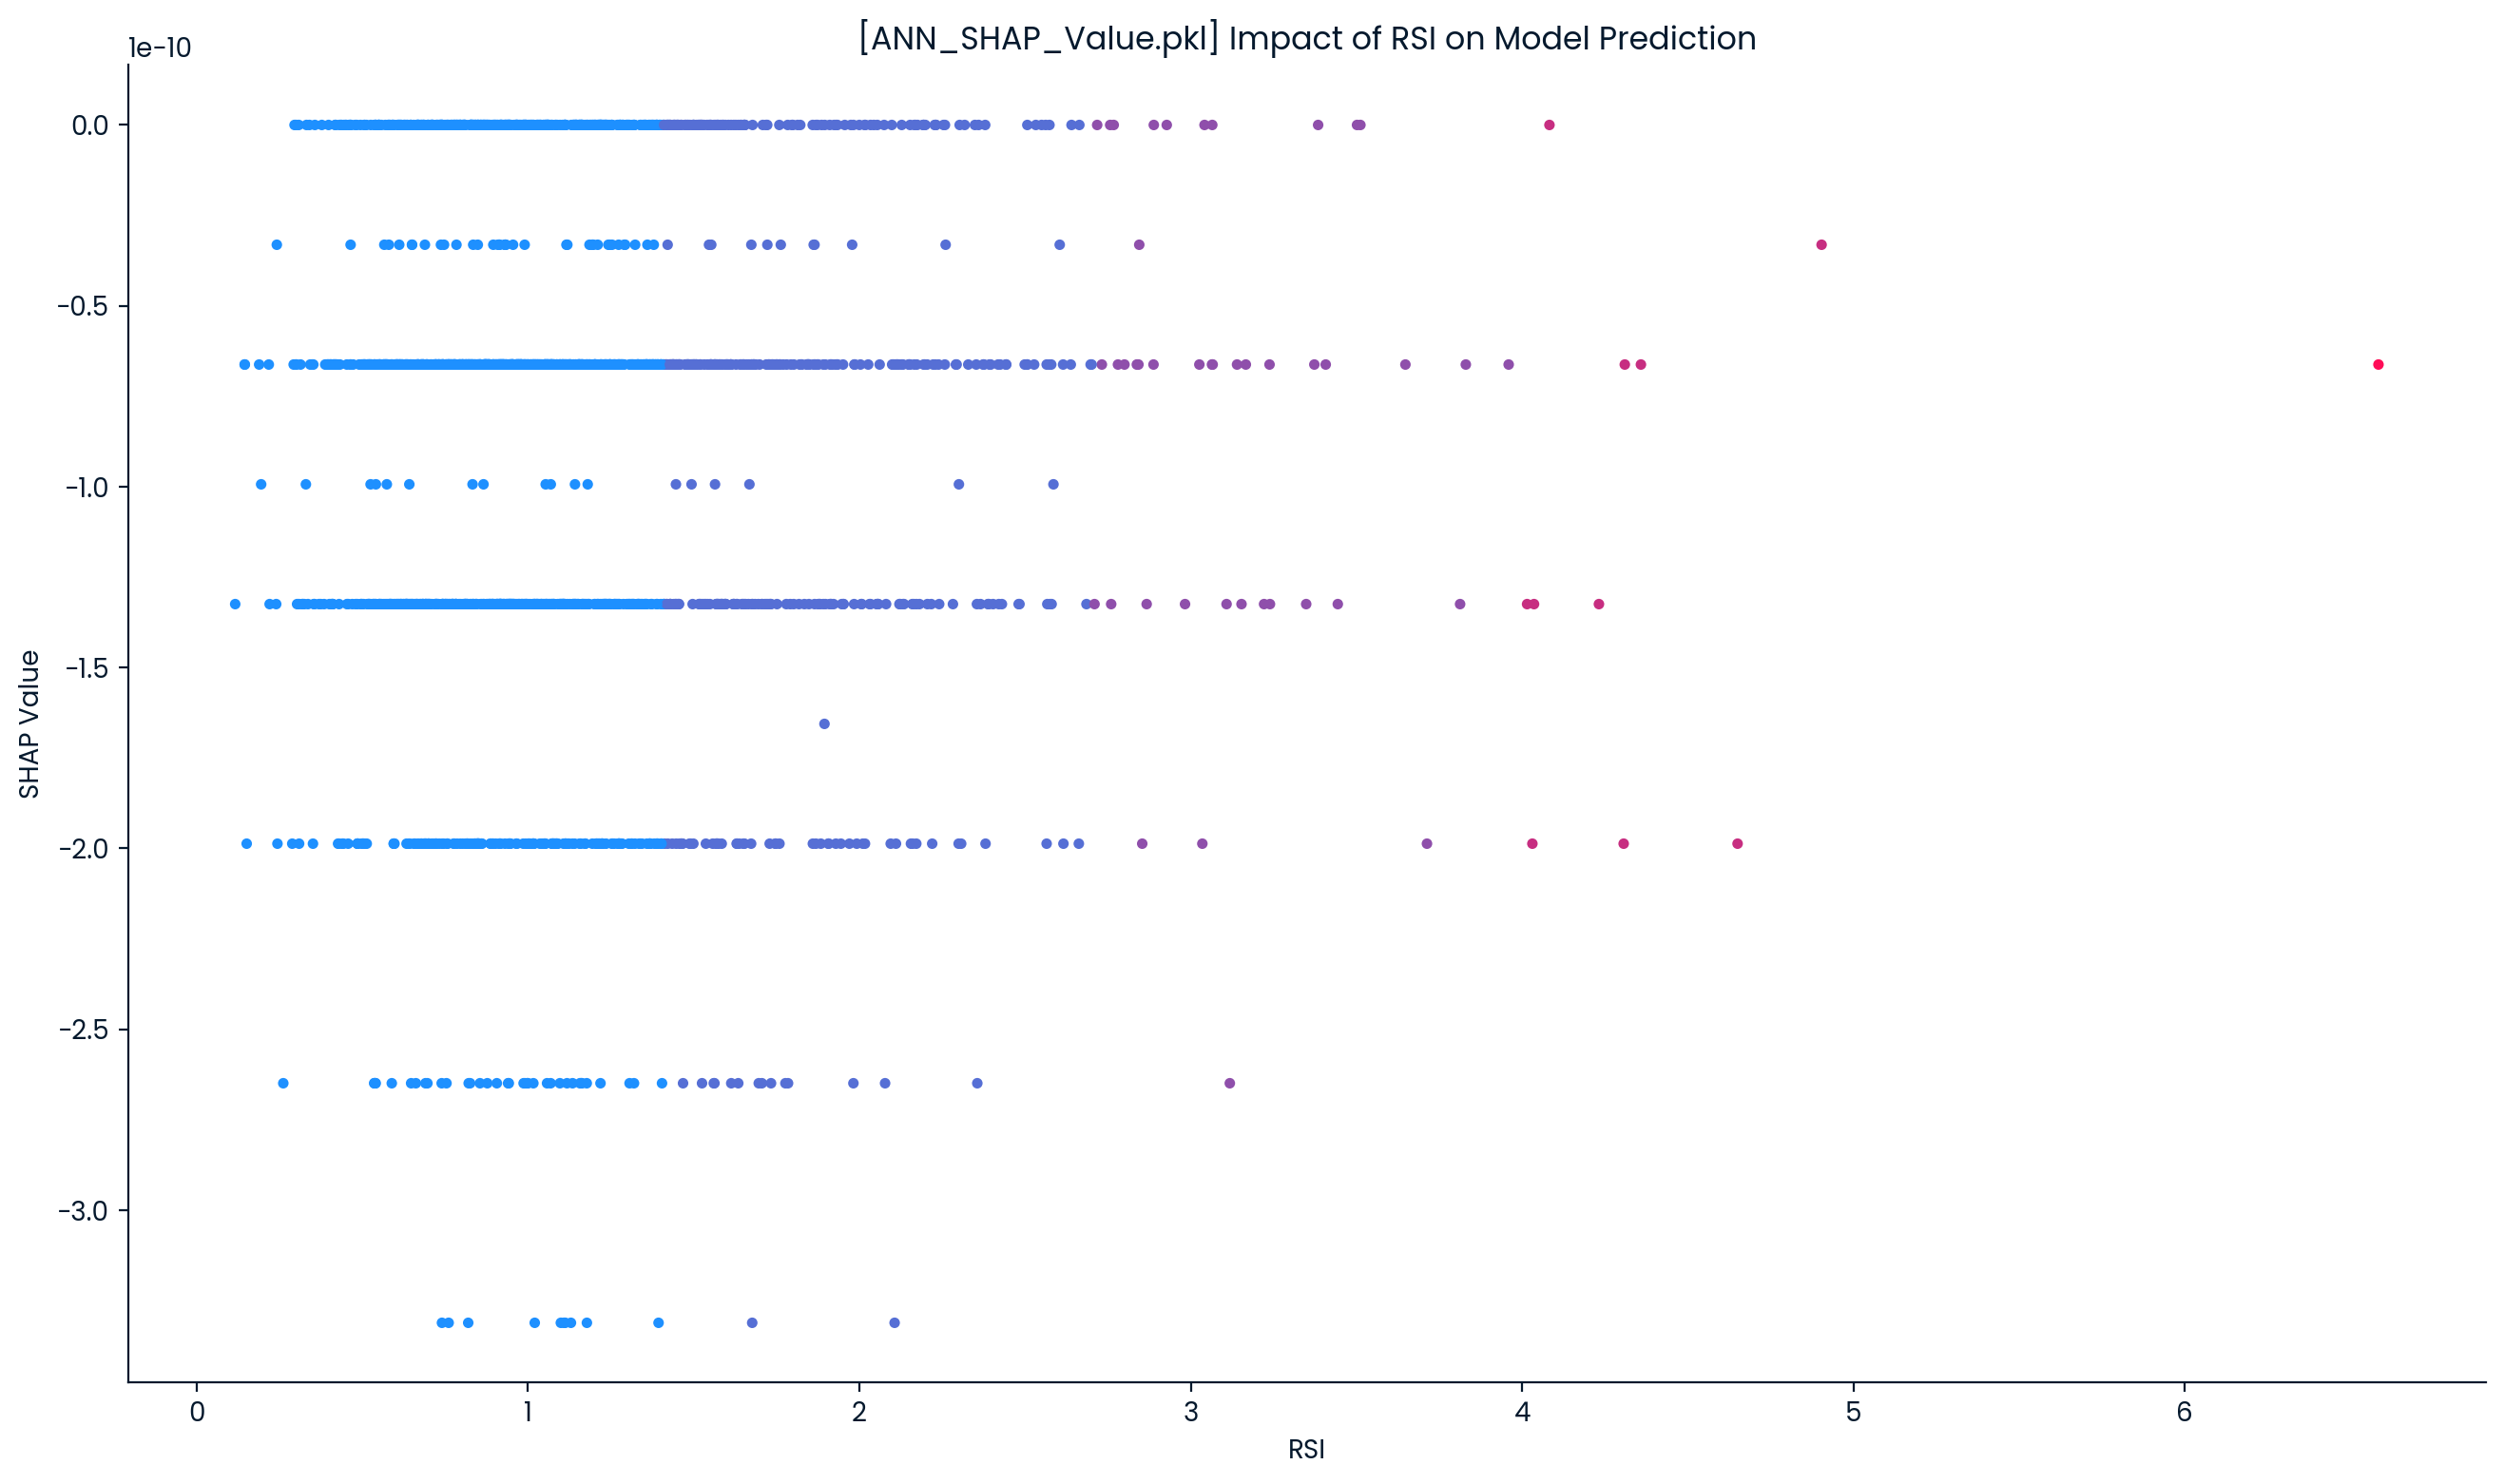

In [39]:
# ANN SHAP PLOTS

plot_shap_summary(6)
plot_shap_waterfall(6)
plot_shap_rsi_scatter(6)

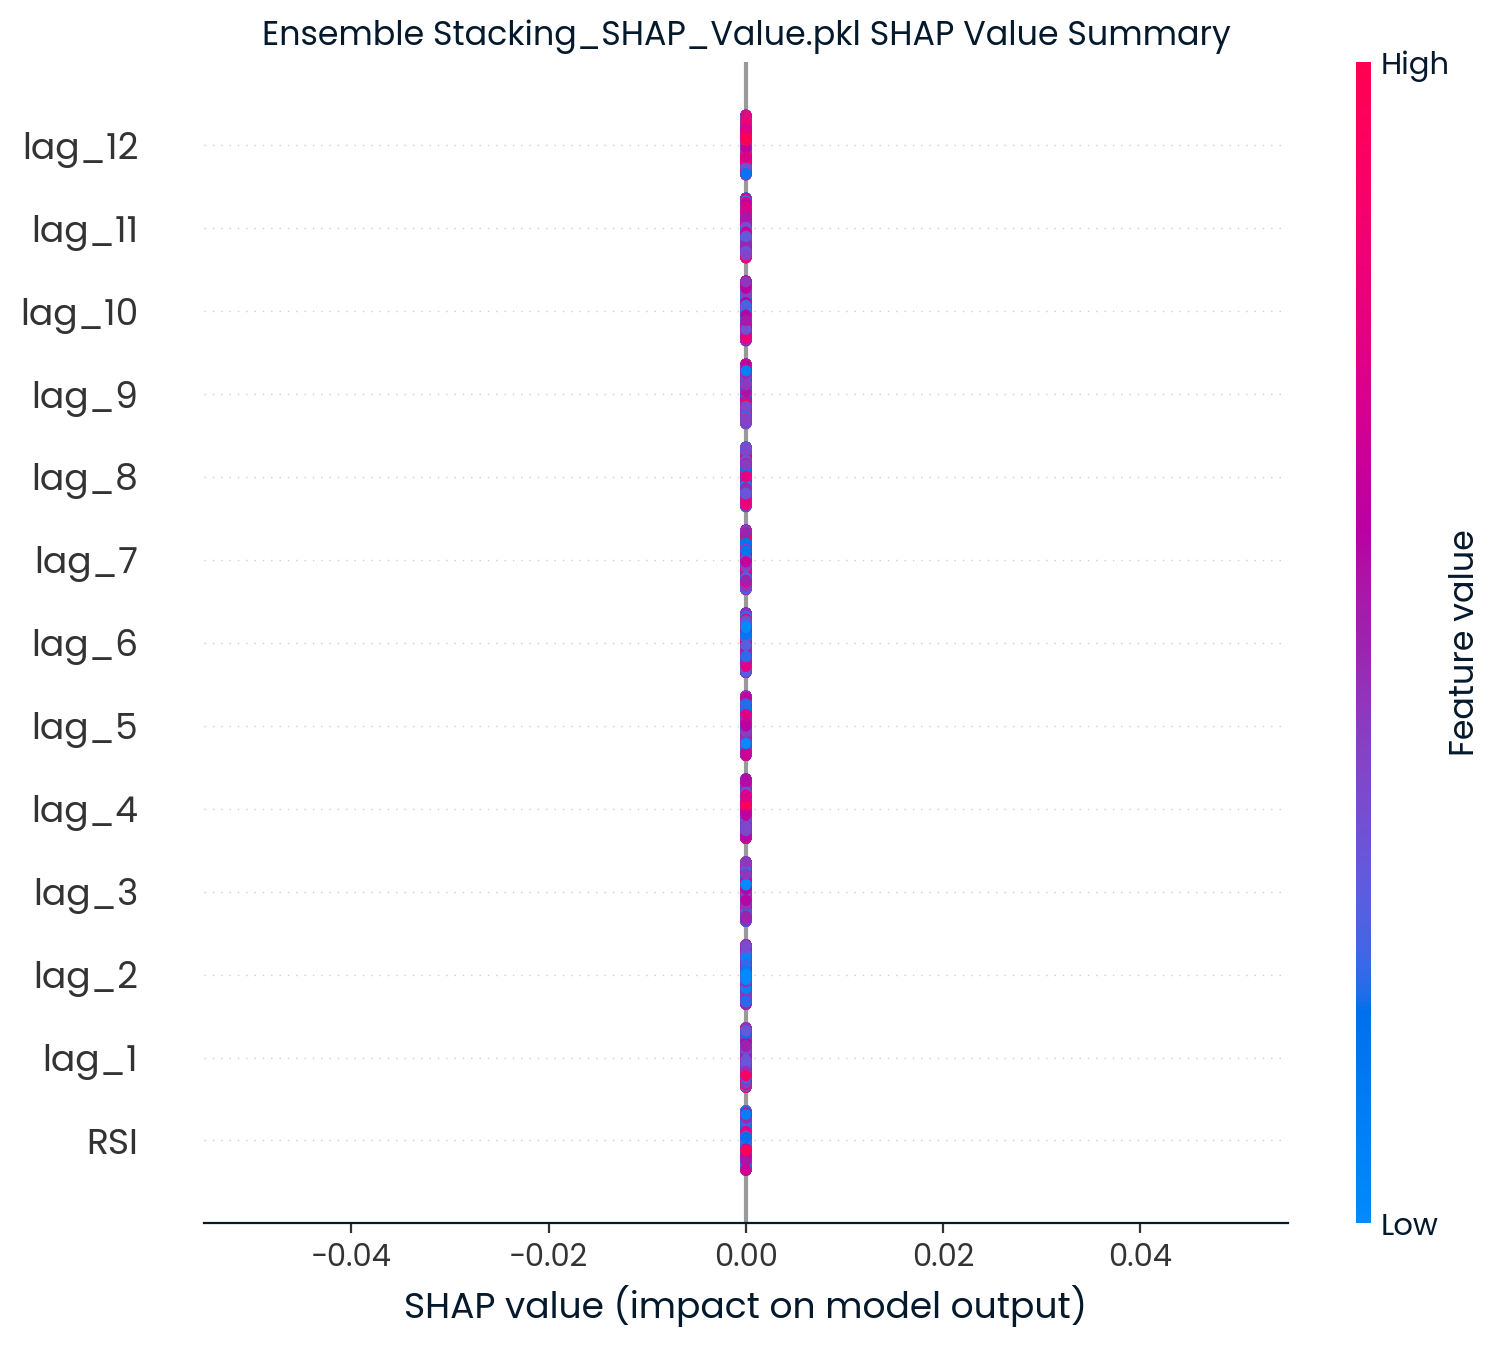

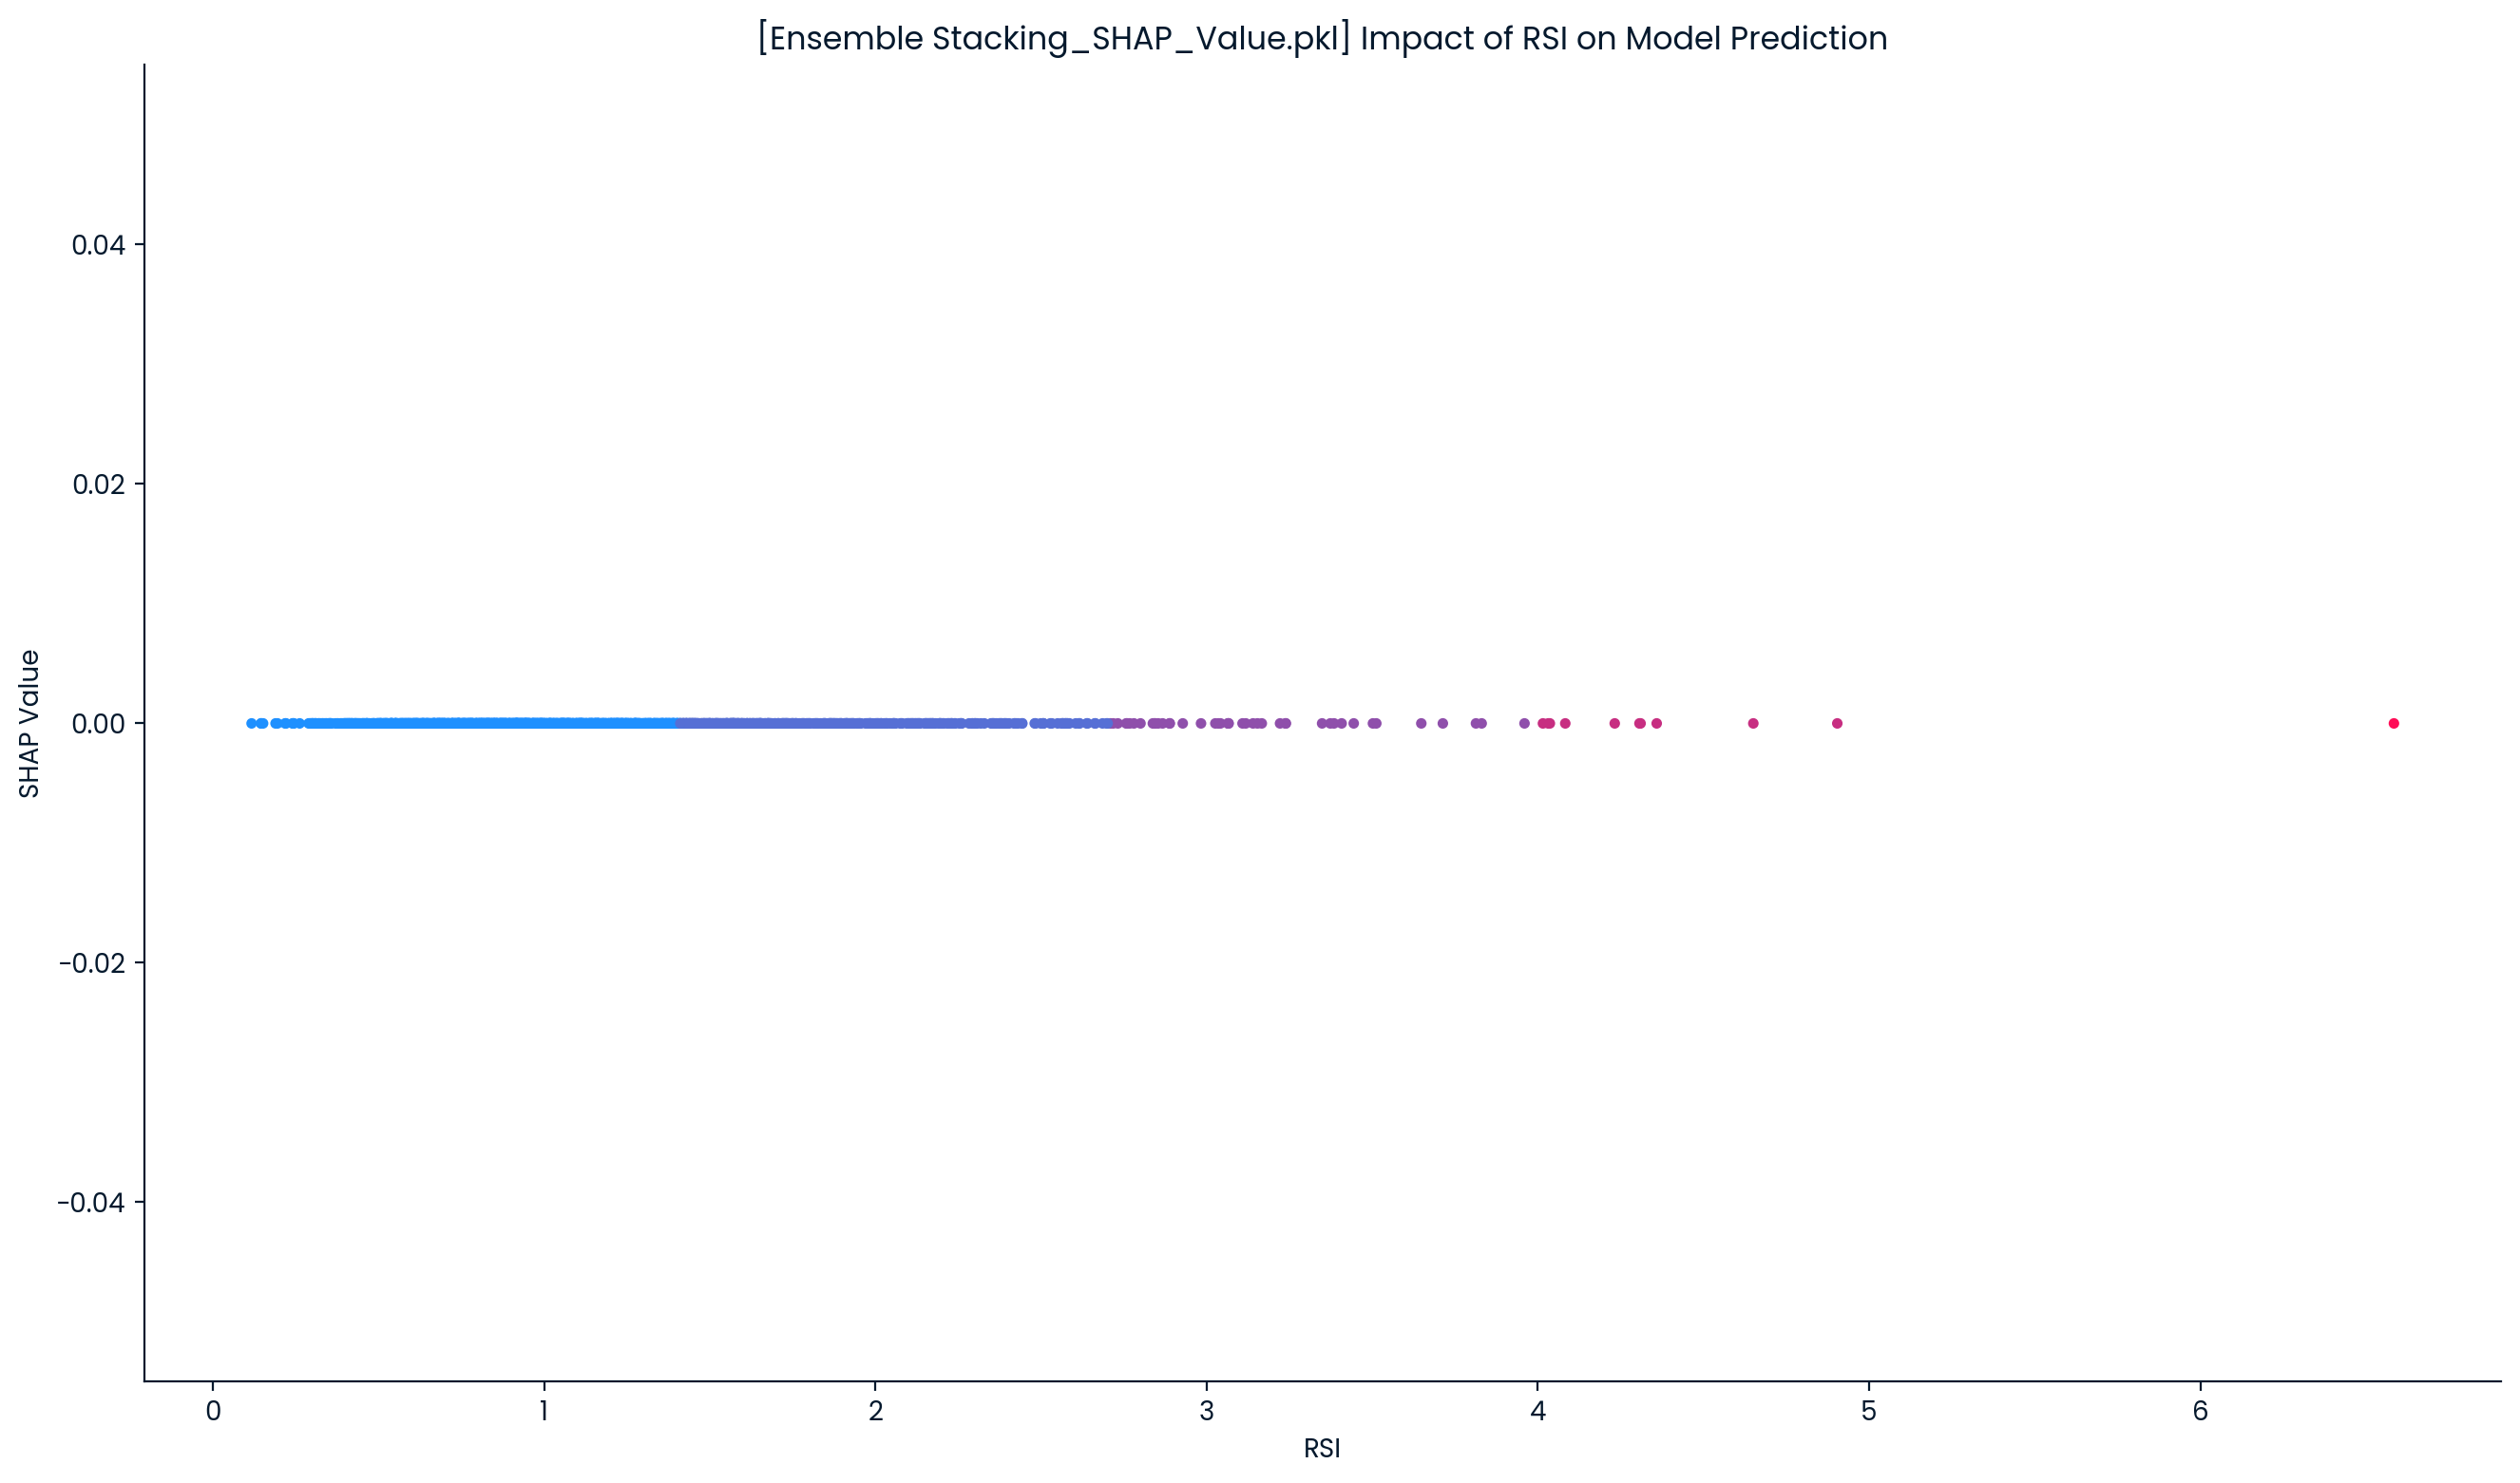

In [40]:
# E-STACKING SHAP PLOTS

plot_shap_summary(7)
plot_shap_rsi_scatter(7)

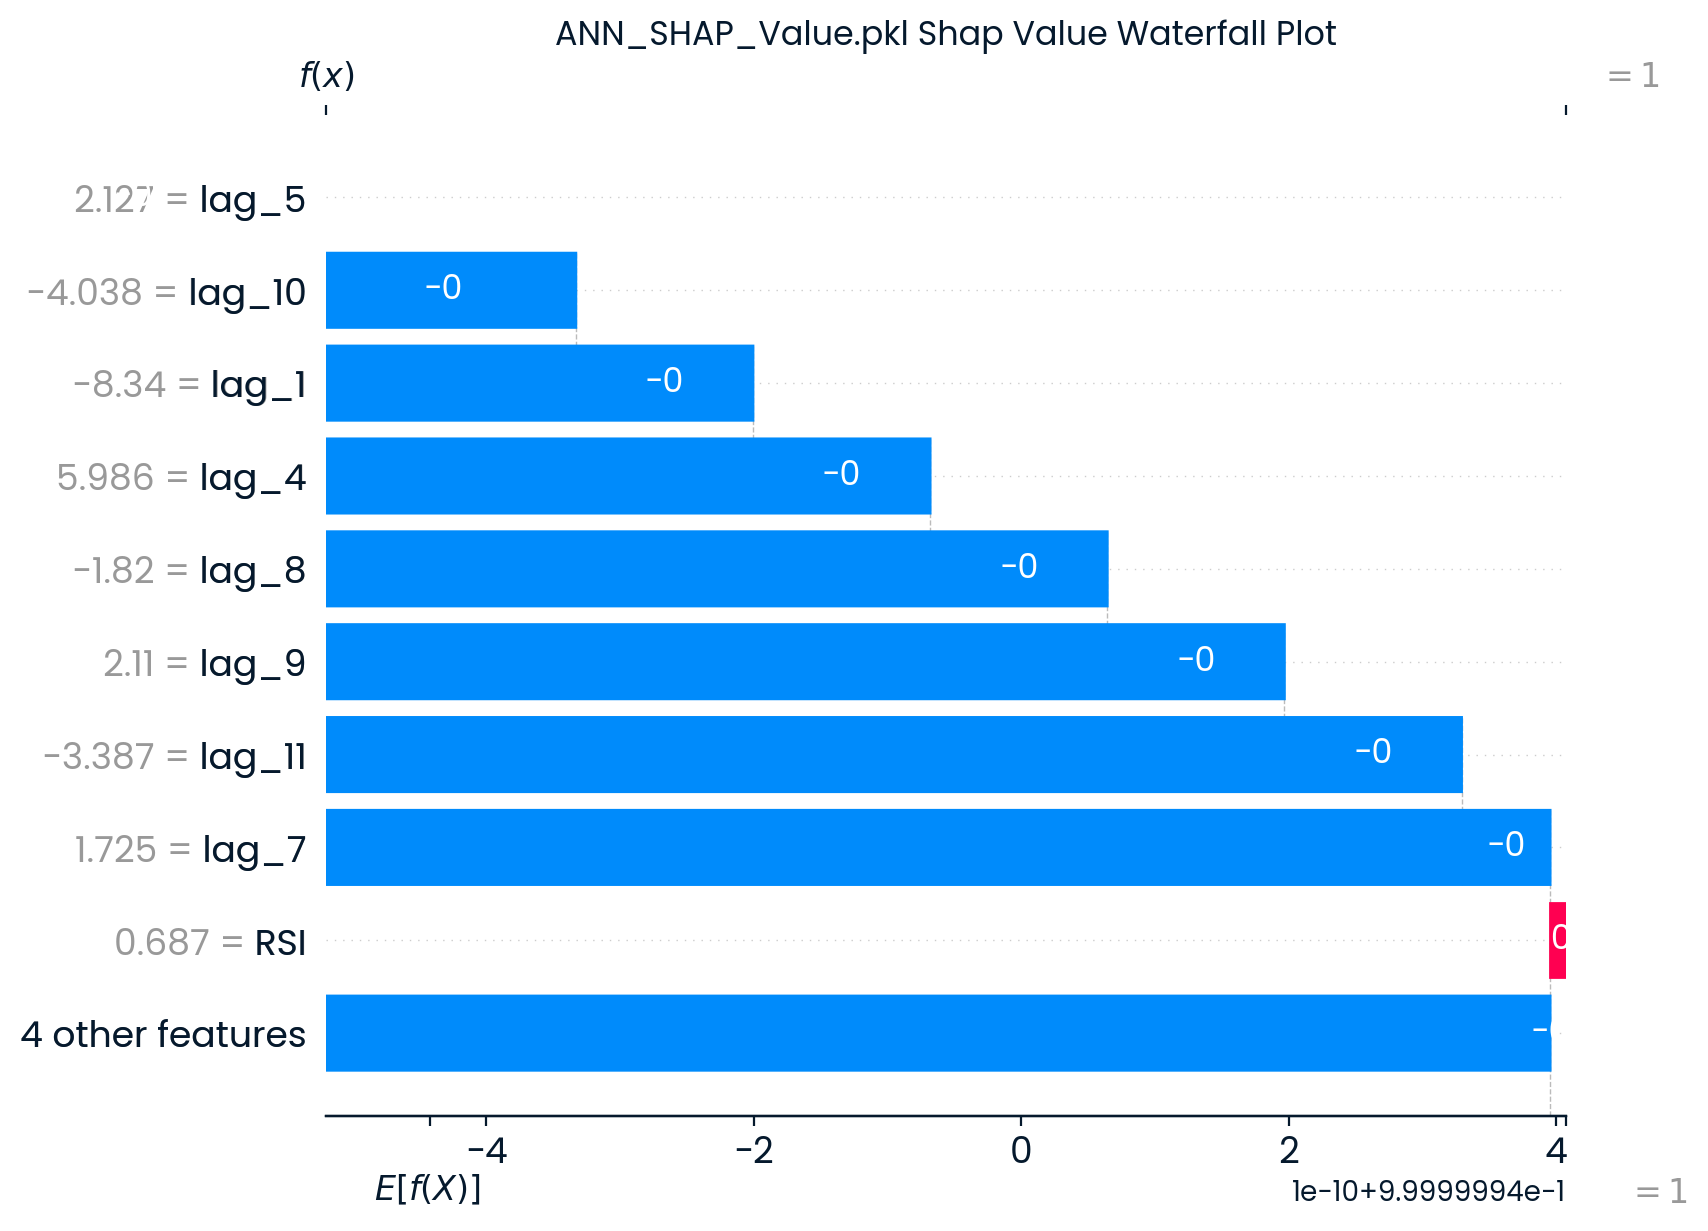

In [41]:
## ADDITIONAL PLOTS - ANN

# Create SHAP explanation object for ANN model
# shap_values_list[6] contains the SHAP values for the ANN model
# shap_values_list[6].values are the SHAP values
# shap_values_list[6].base_values[0][0] is the base value (expected value of the model output)
# shap_values_list[6].data contains the feature values
ann_shap_explanation = shap.Explanation(
    shap_values_list[6].values, 
    shap_values_list[6].base_values[0][0], 
    shap_values_list[6].data
)

# Assign feature names to the SHAP explanation object
ann_shap_explanation.feature_names = feature_columns

# Generate and display the SHAP waterfall plot for the first instance
# shap.plots.waterfall creates a waterfall plot for the SHAP values
# show=False prevents the plot from being displayed immediately
shap.plots.waterfall(ann_shap_explanation[0], show=False)

# Set the title of the plot to indicate it is a SHAP value waterfall plot for the ANN model
plt.title(f"{shap_filenames[6]} Shap Value Waterfall Plot")

# Save the figure
plt.savefig(f"graphs/{shap_filenames[6]} Shap Value Waterfall Plot - New.png")

# Display the plot
plt.show()

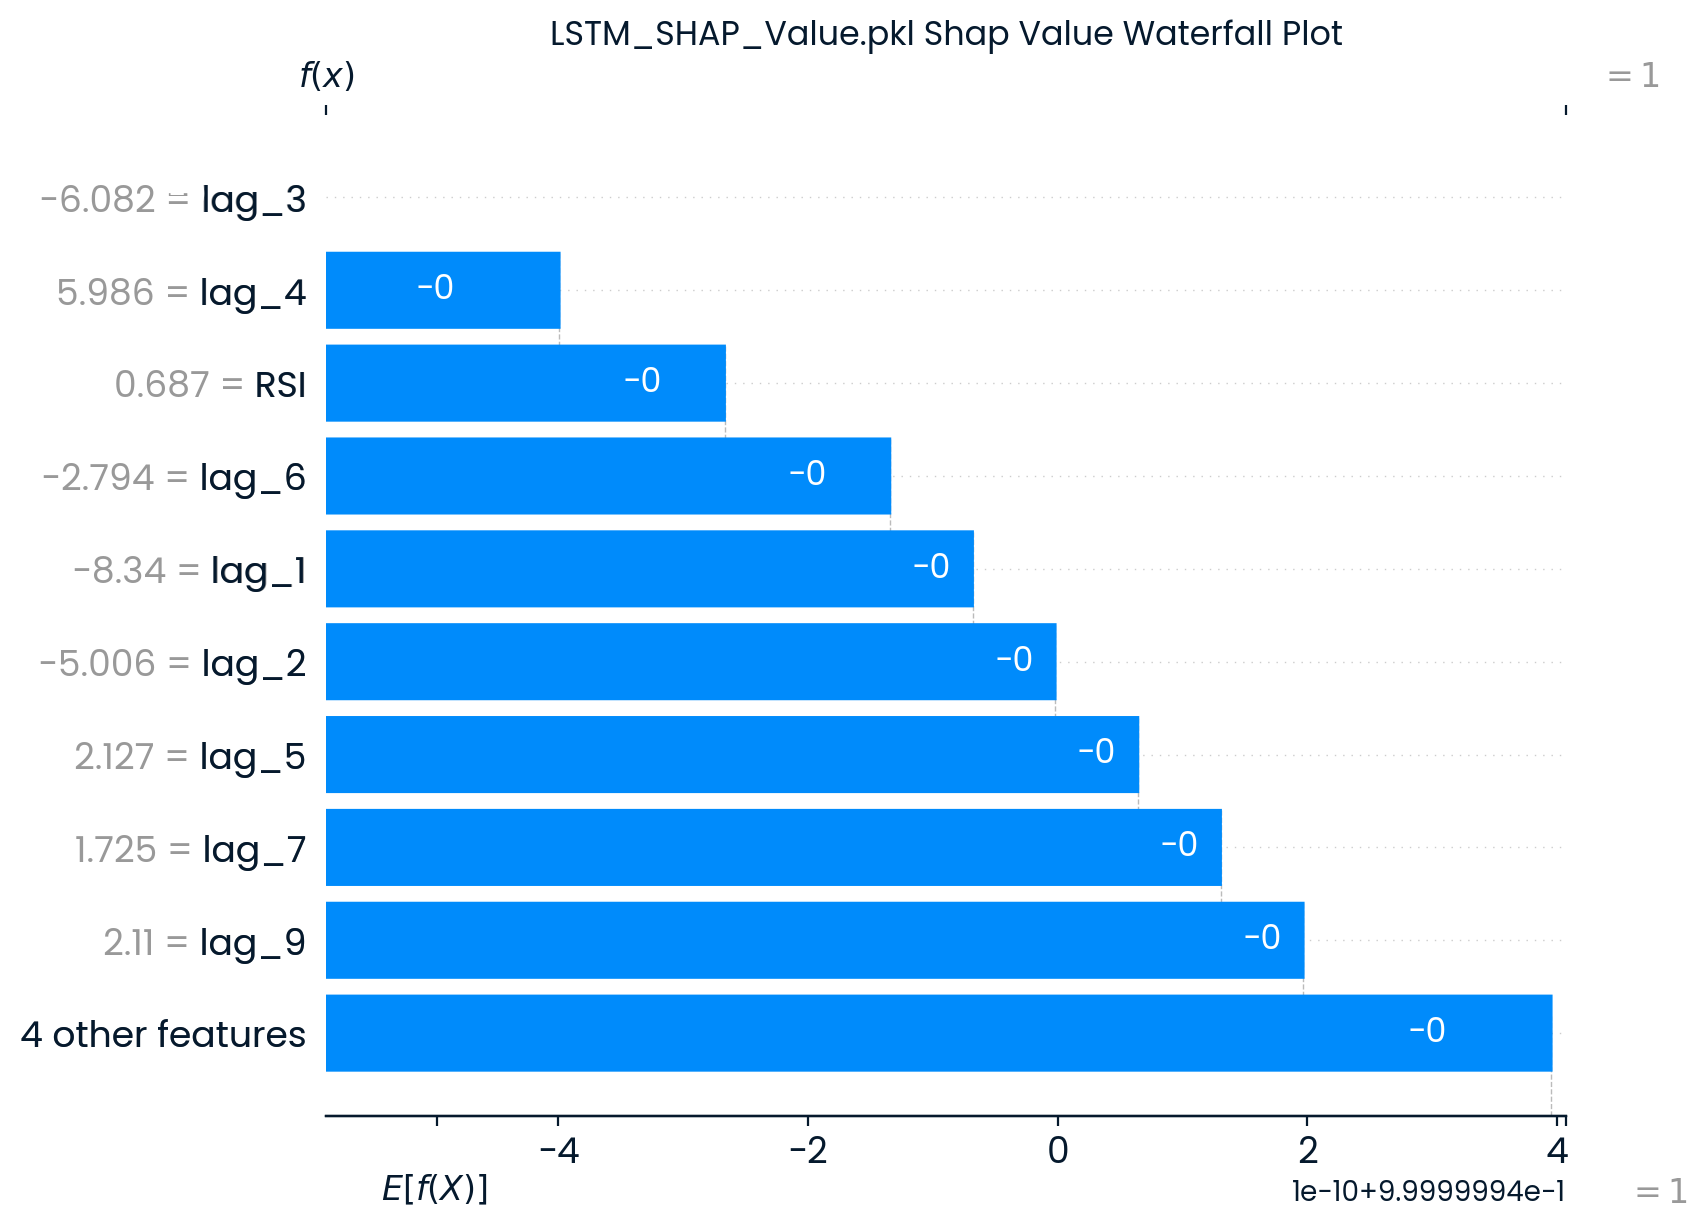

In [42]:
## ADDITIONAL PLOTS - LSTM

# Create SHAP explanation object for LSTM model
# shap_values_list[6] contains the SHAP values for the LSTM model
# shap_values_list[6].values are the SHAP values
# shap_values_list[6].base_values[0][0] is the base value (expected value of the model output)
# shap_values_list[6].data contains the feature values
LSTM_shap_explanation = shap.Explanation(
    shap_values_list[1].values, 
    shap_values_list[1].base_values[0][0], 
    shap_values_list[1].data
)

# Assign feature names to the SHAP explanation object
LSTM_shap_explanation.feature_names = feature_columns

# Generate and display the SHAP waterfall plot for the first instance
# shap.plots.waterfall creates a waterfall plot for the SHAP values
# show=False prevents the plot from being displayed immediately
shap.plots.waterfall(LSTM_shap_explanation[0], show=False)

# Set the title of the plot to indicate it is a SHAP value waterfall plot for the ANN model
plt.title(f"{shap_filenames[1]} Shap Value Waterfall Plot")

# Save the figure
plt.savefig(f"graphs/{shap_filenames[1]} Shap Value Waterfall Plot - New.png")

# Display the plot
plt.show()